In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import lregression
import naivebayes
#import main
import Data_preprocess as preprocess
import k_fold_crossv as kfold
from sklearn.linear_model import LogisticRegression
plt.rcParams.update({'figure.max_open_warning': 0})

## Step 1: Data Preprocessing

### 1.1 Importing Data_preprocess.py to filter the invalidated data and clean the data set

In [88]:
content1= pd.read_csv(**preprocess.weather_data_config).dropna()

In [3]:
content2=pd.read_csv(**preprocess.adult_data_config).dropna()

In [4]:
content1

1   2        3        4        5        6        7        8        9   \
0     1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..  ..      ...      ...      ...      ...      ...      ...      ...   
346   1   0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1   0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1   0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1   0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1   0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

          10  ...       26       27       28       29       30       31  \
0    0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1   -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2    0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3    0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4   -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   
..       ...  ...      ...      ...      ...      ...      ...      ...   
346 -0.04622  ... -0.04202  0.83479  0.00123  1.00000  0.12815  0.86660   
347  0.01606  ...  0.01361  0.93522  0.04925  0.93159  0.08168  0.94066   
348  0.02446  ...  0.03193  0.92489  0.02542  0.92120  0.02242  0.92459   
349  0.00110  ... -0.02099  0.89147 -0.07760  0.82983 -0.17238  0.96022   
350 -0.09139  ... -0.15114  0.81147 -0.04822  0.78207 -0.00703  0.75747   

          32       33       34  35  
0   -0.54487  0.18641 -0.45300   1  
1   -0.06288 -0.13738 -0.02447   0  
2   -0.24180  0.56045 -0.38238   1  
3    1.00000 -0.32382  1.00000   0  
4   -0.59573 -0.04608 -0.65697   1  
..       ...      ...      ...  ..  
346 -0.10714  0.90546 -0.04307   1  
347 -0.00035  0.91483  0.04712   1  
348  0.00442  0.92697 -0.00577   1  
349 -0.03757  0.87403 -0.16243   1  
350 -0.06678  0.85764 -0.06151   1  

[351 rows x 35 columns]

In [7]:
content2

age          workclass  fnlwgt    education  educationnum  \
0       39          State-gov   77516    Bachelors            13   
1       50   Self-emp-not-inc   83311    Bachelors            13   
2       38            Private  215646      HS-grad             9   
3       53            Private  234721         11th             7   
4       28            Private  338409    Bachelors            13   
...    ...                ...     ...          ...           ...   
32556   27            Private  257302   Assoc-acdm            12   
32557   40            Private  154374      HS-grad             9   
32558   58            Private  151910      HS-grad             9   
32559   22            Private  201490      HS-grad             9   
32560   52       Self-emp-inc  287927      HS-grad             9   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capitalgain  capitalloss  hoursperweek   nativecountry  salary  
0         Male         2174            0            40   United-States       0  
1         Male            0            0            13   United-States       0  
2         Male            0            0            40   United-States       0  
3         Male            0            0            40   United-States       0  
4       Female            0            0            40            Cuba       0  
...        ...          ...          ...           ...             ...     ...  
32556   Female            0            0            38   United-States       0  
32557     Male            0            0            40   United-States       1  
32558   Female            0            0            40   United-States       0  
32559     Male            0            0            20   United-States       0  
32560   Female        15024            0            40   United-States       1  

[30162 rows x 15 columns]

In [8]:
negative1,positive1=preprocess.data_analysis(content1)

In [9]:
negative2,positive2=preprocess.data_analysis2(content2)

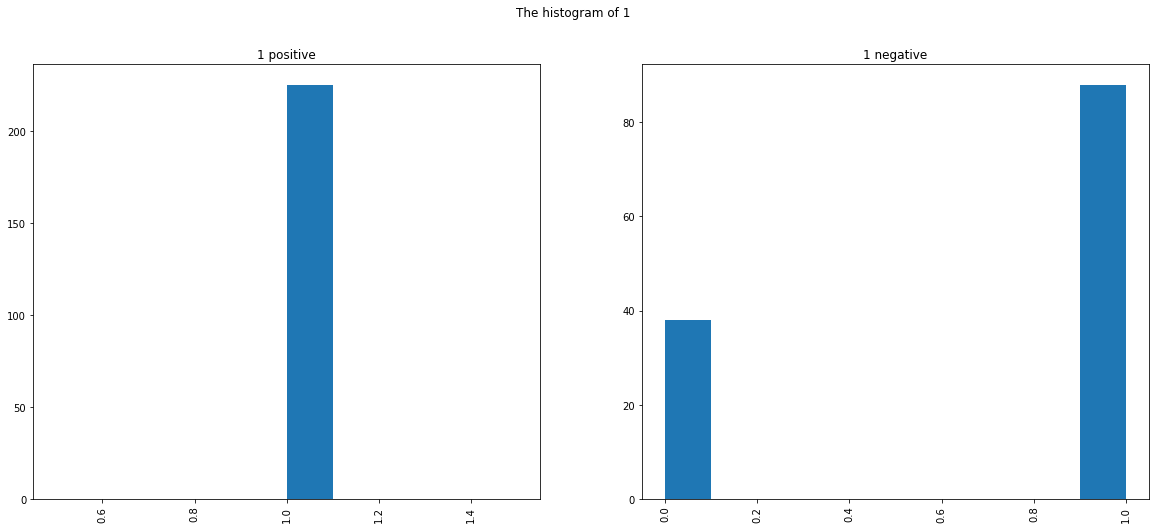

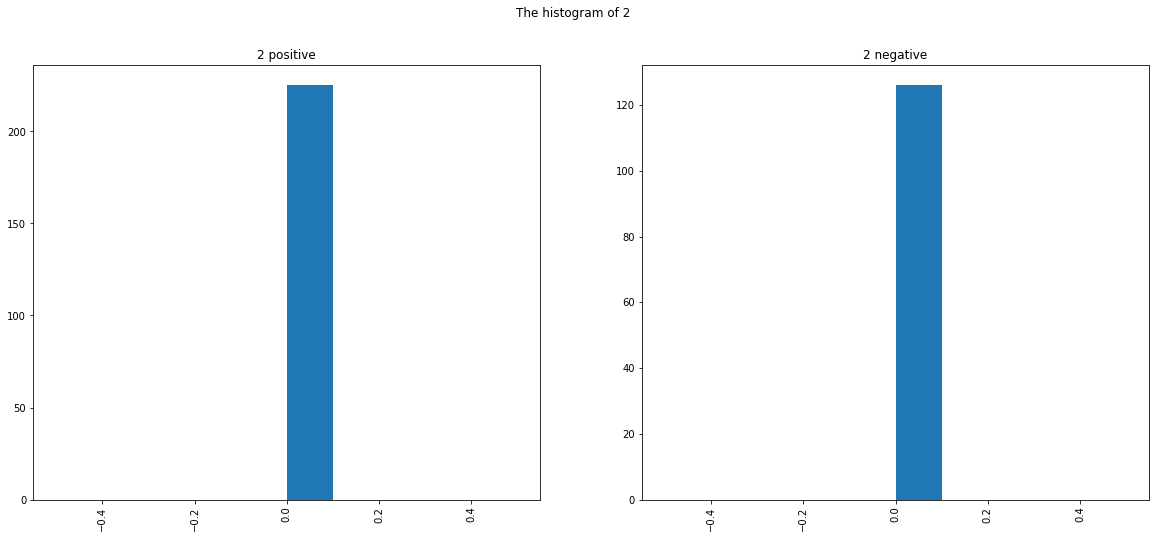

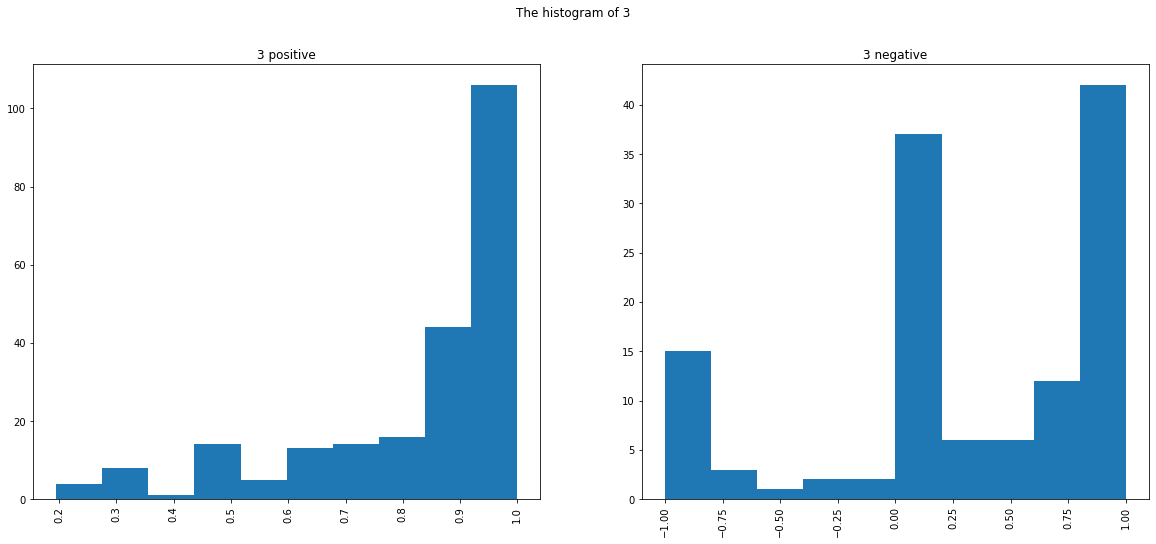

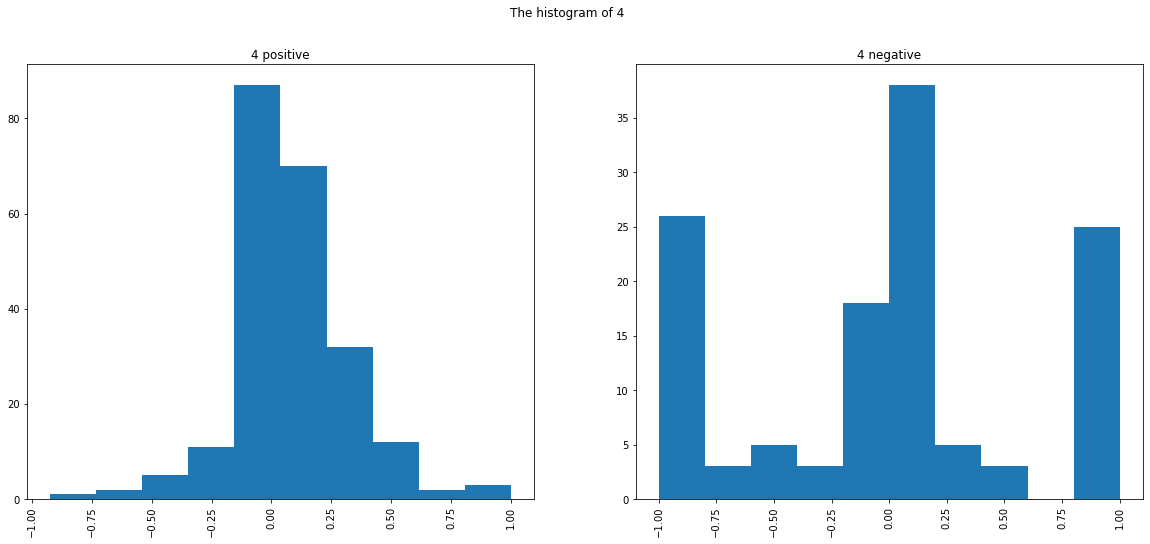

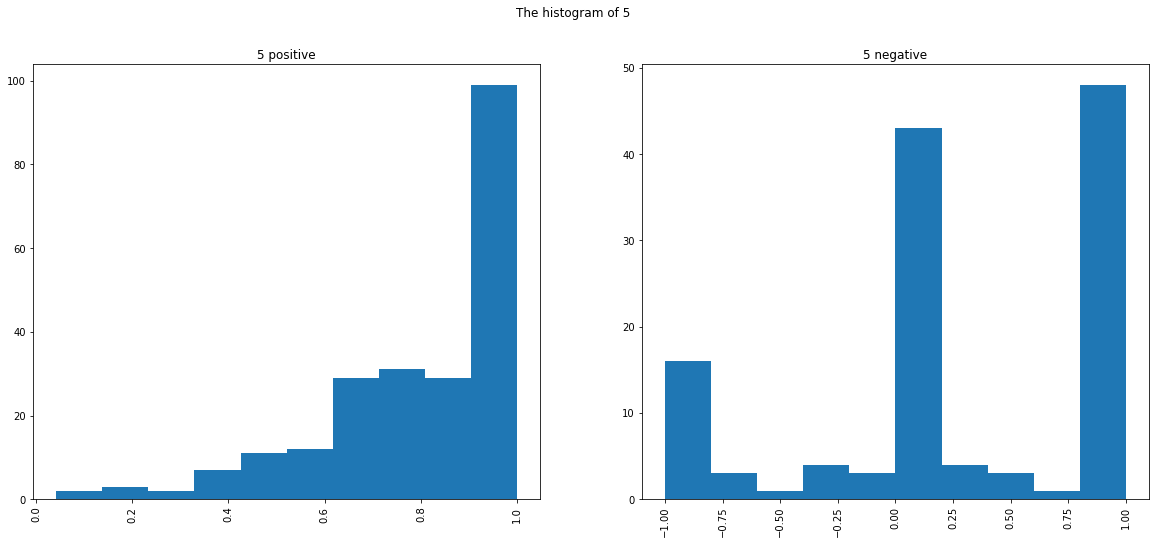

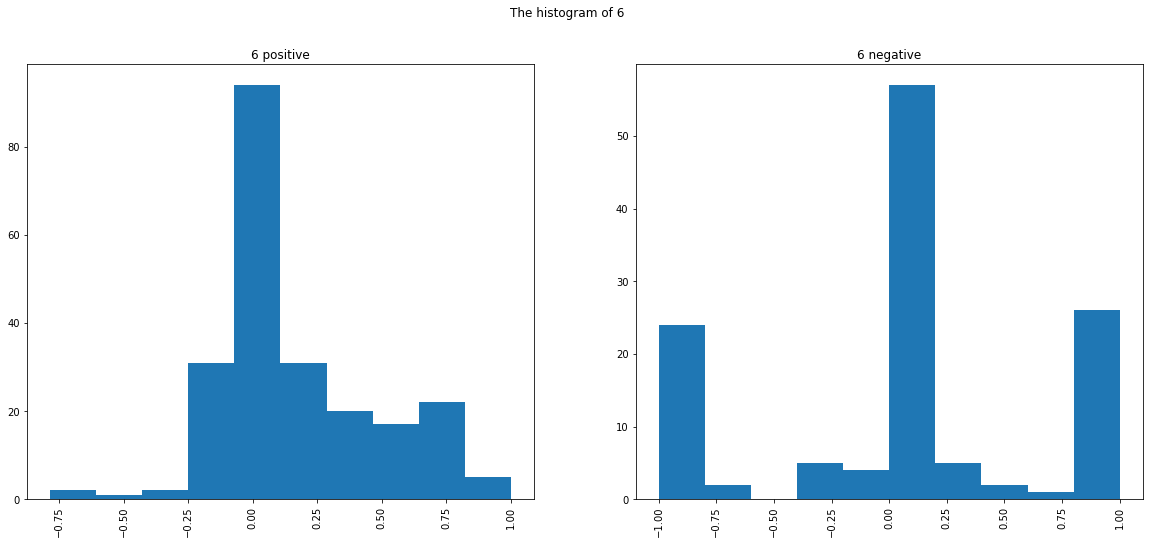

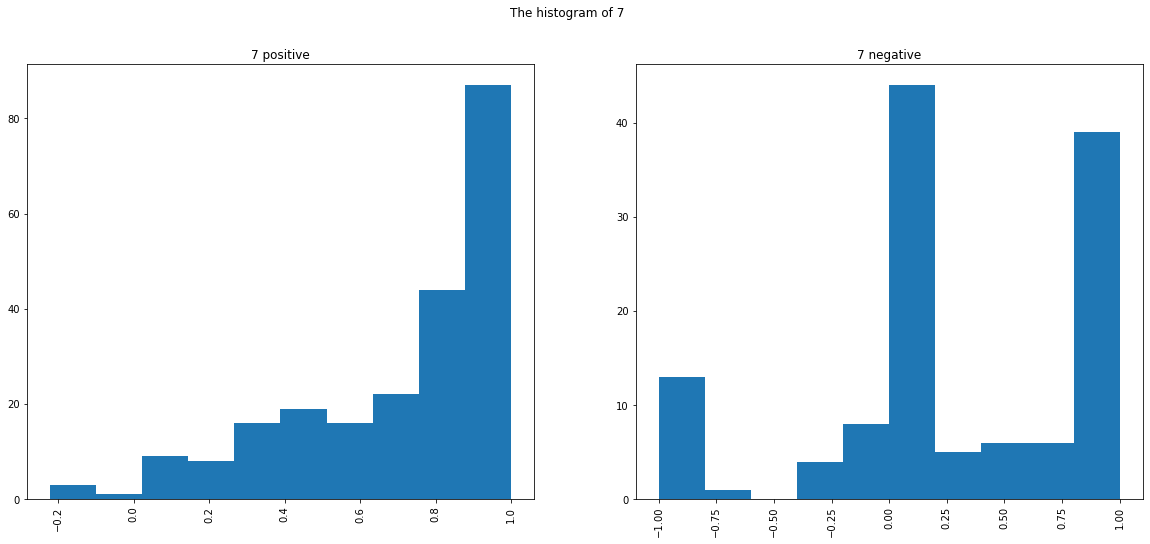

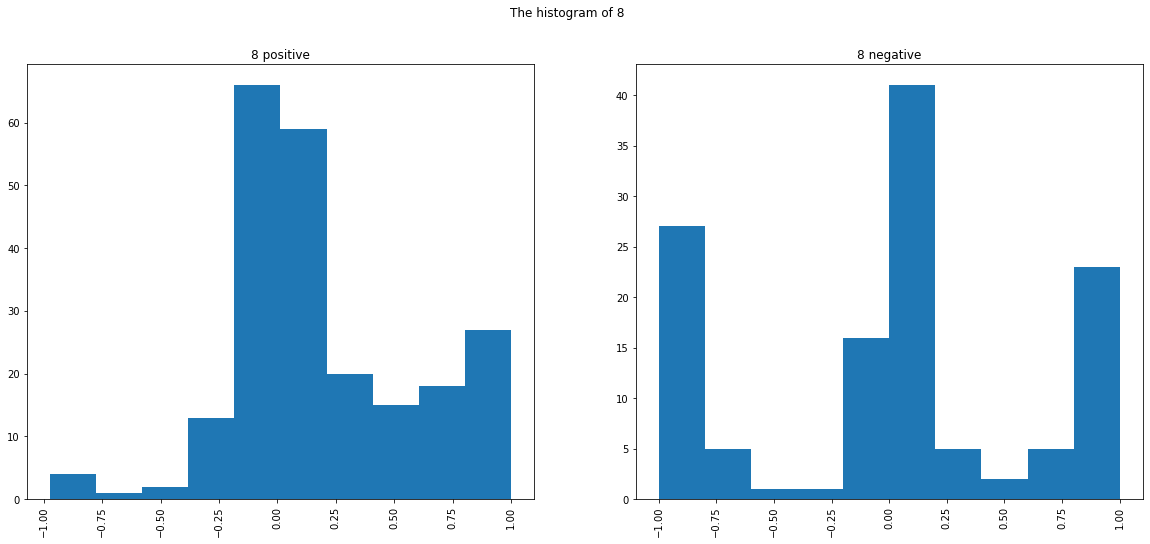

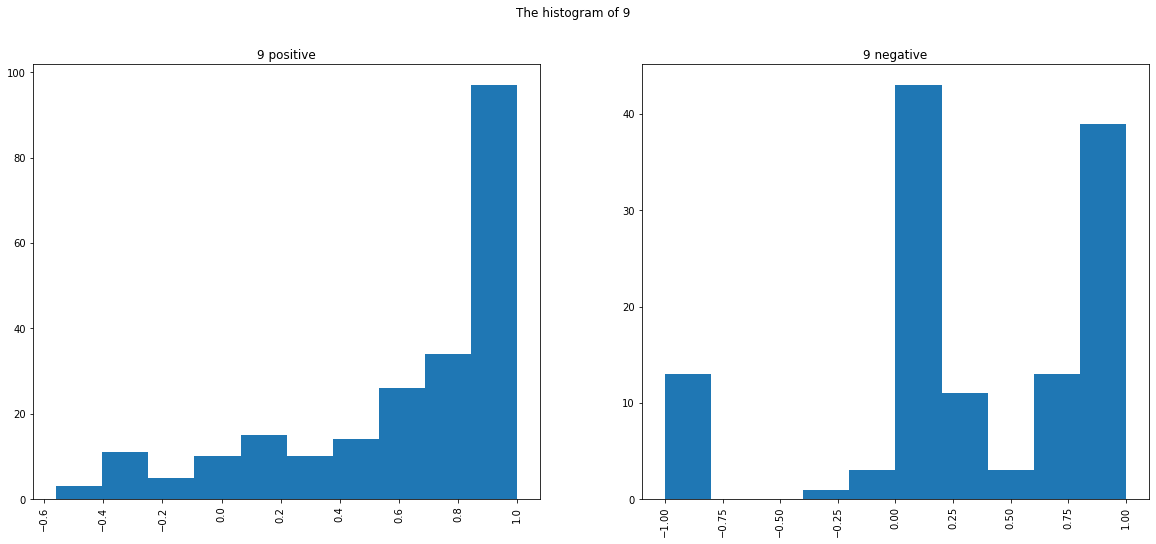

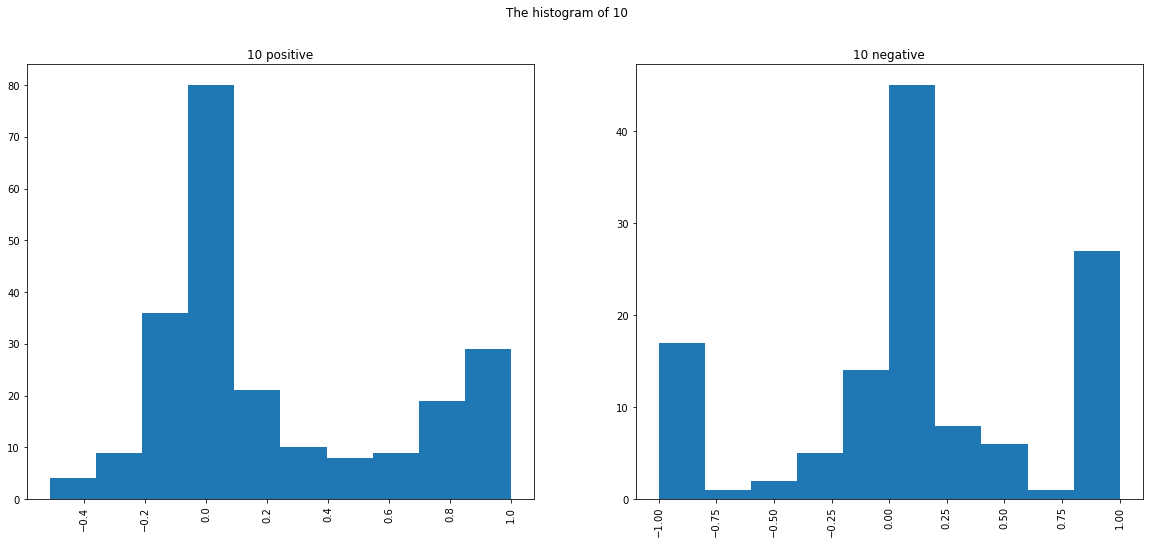

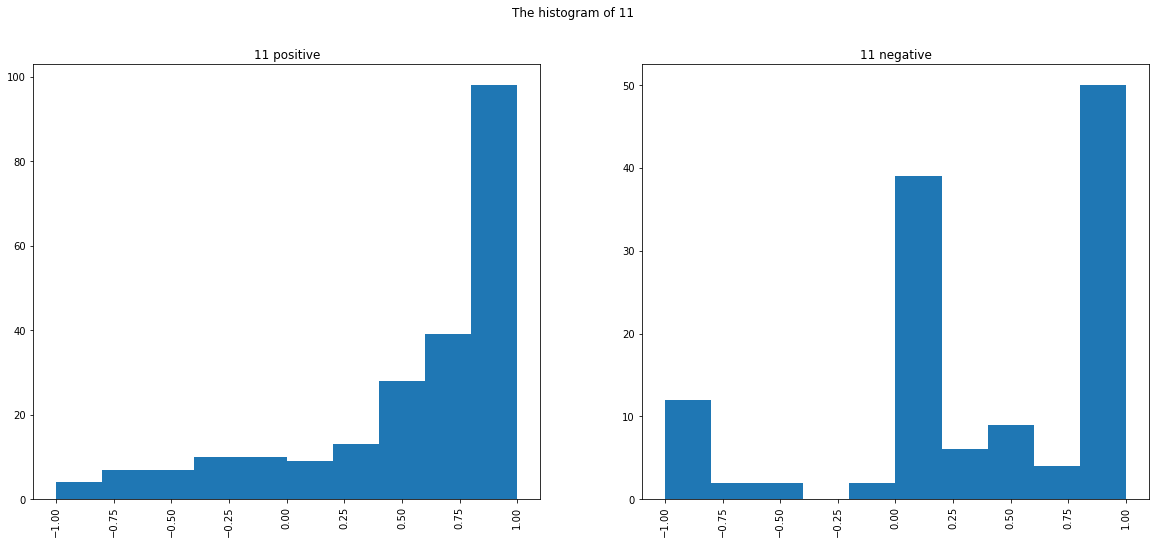

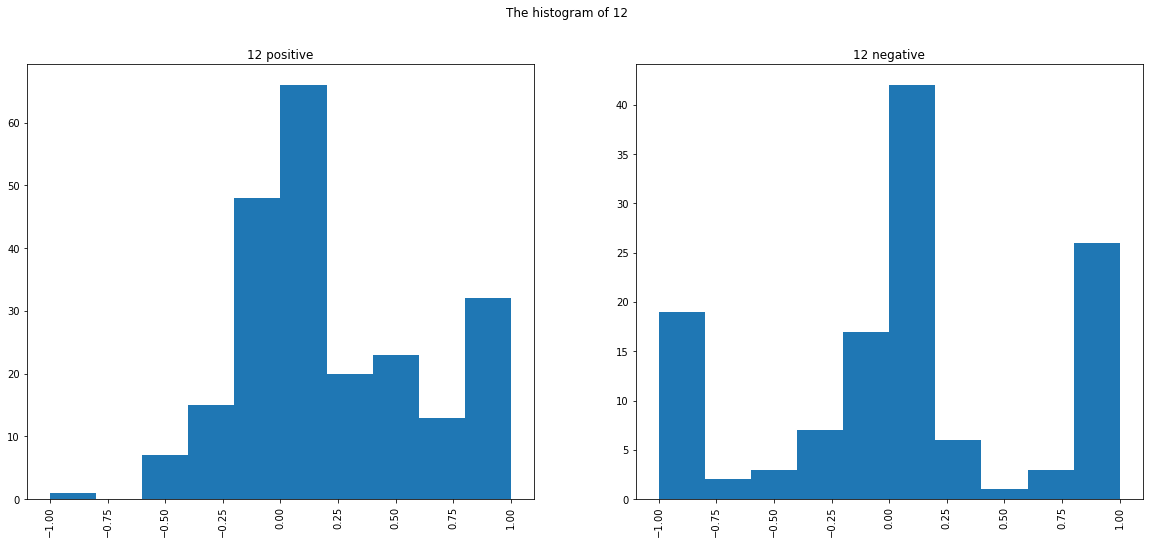

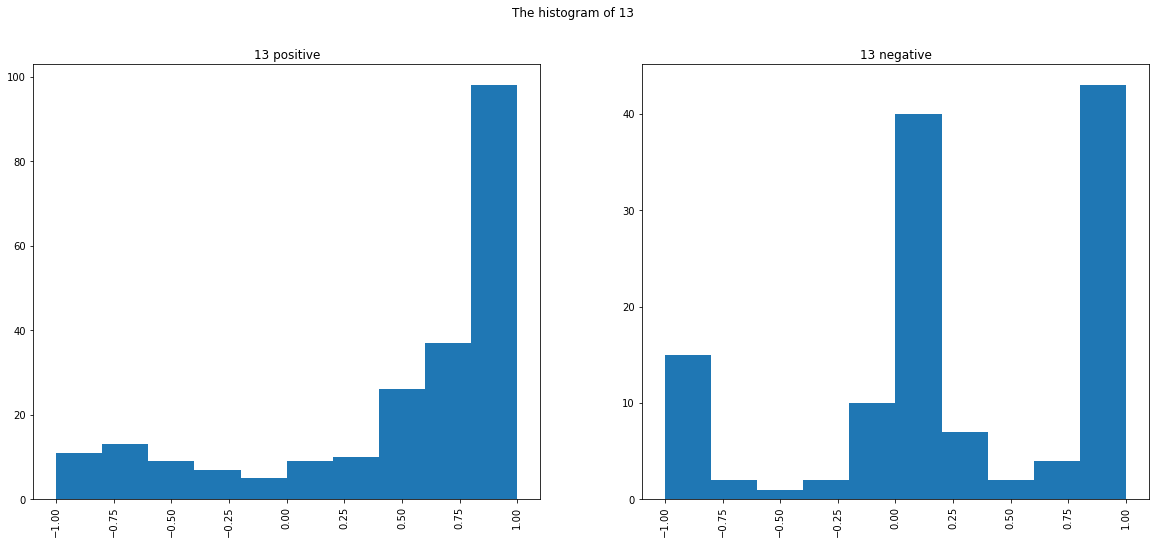

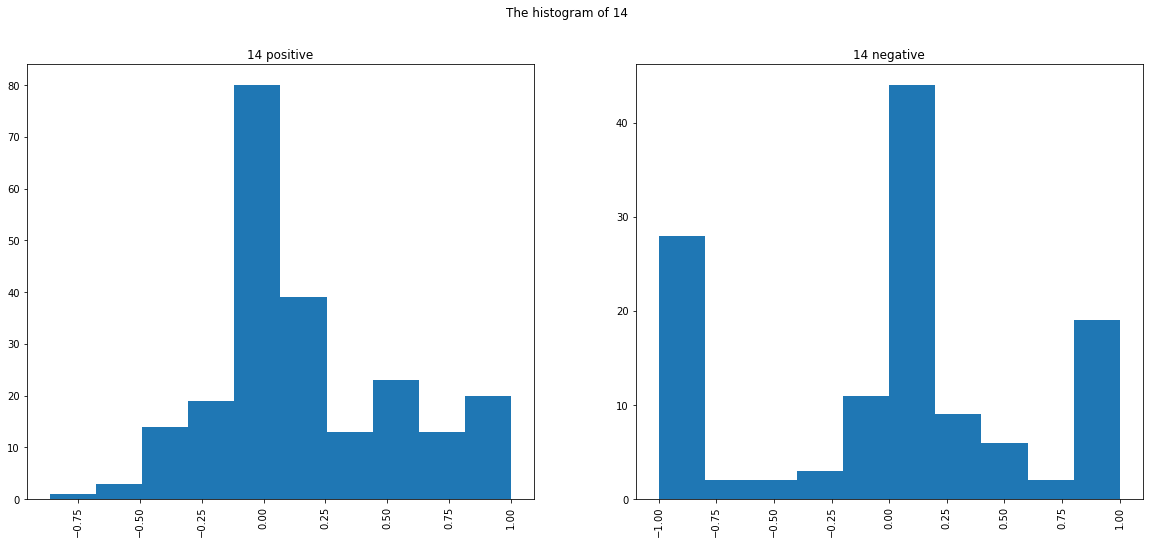

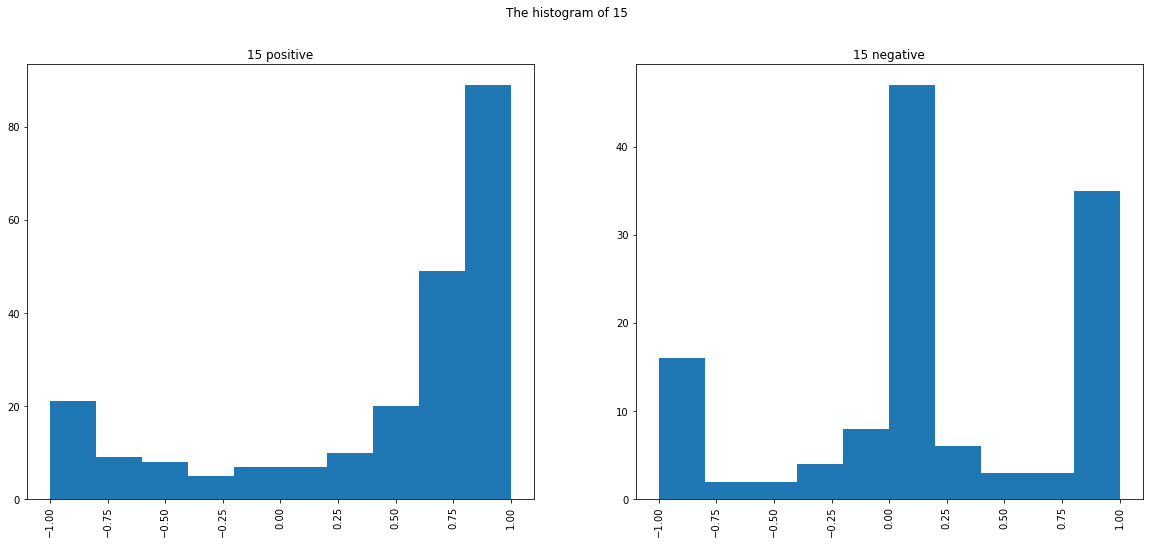

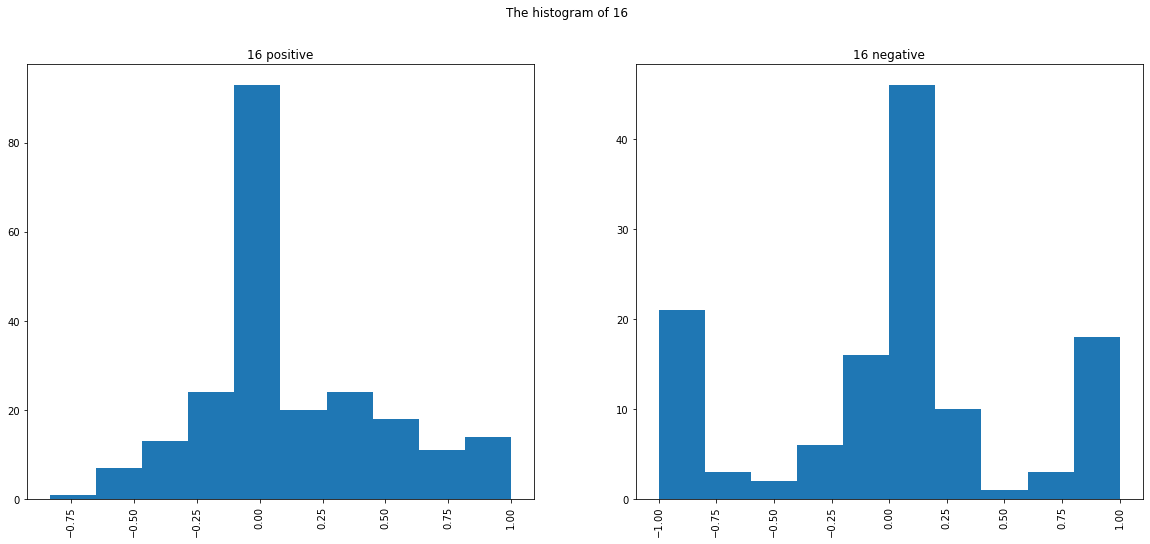

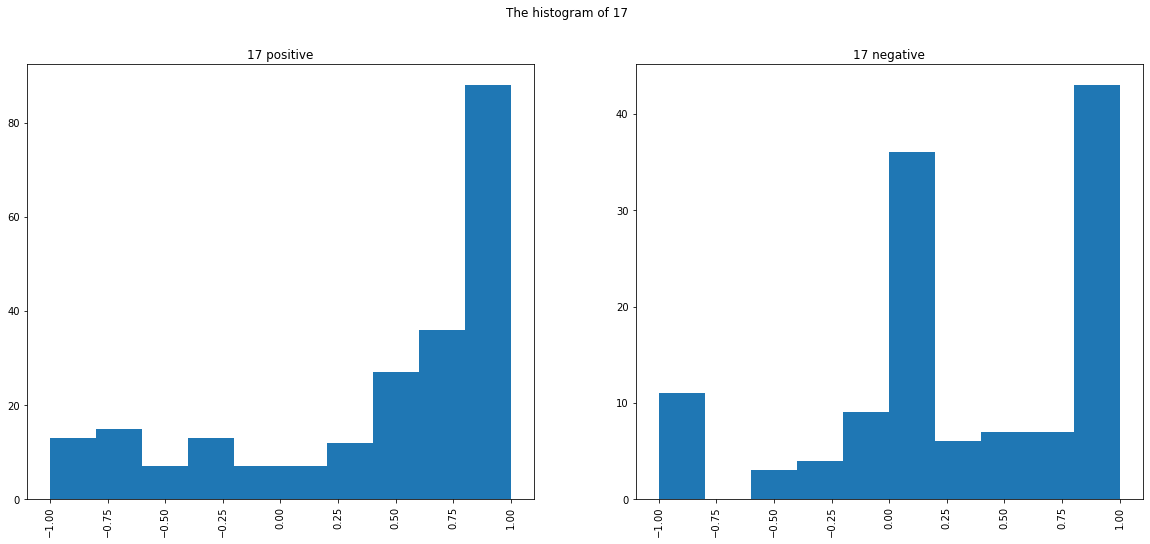

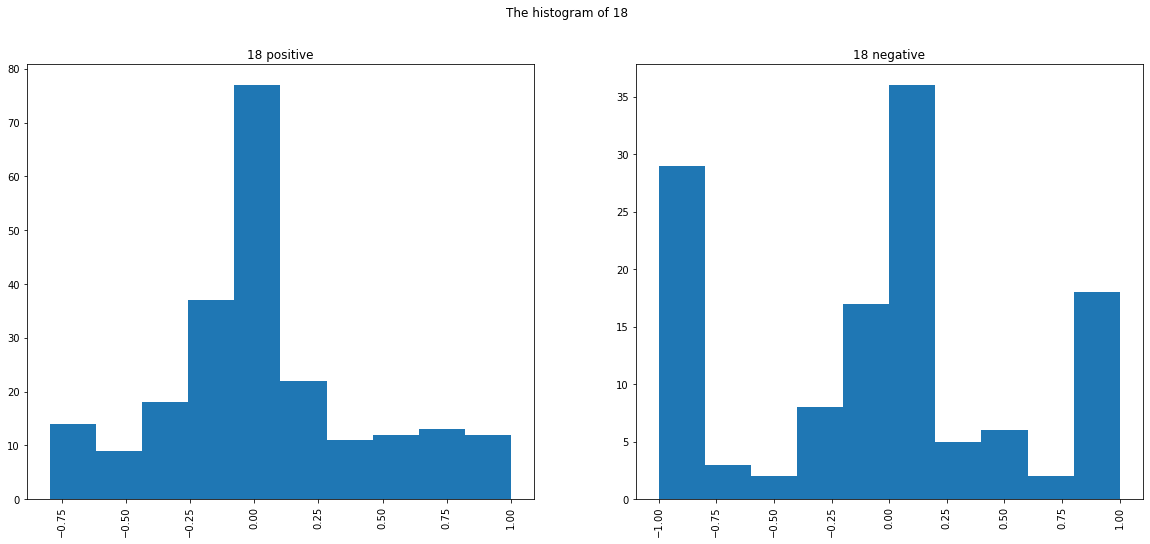

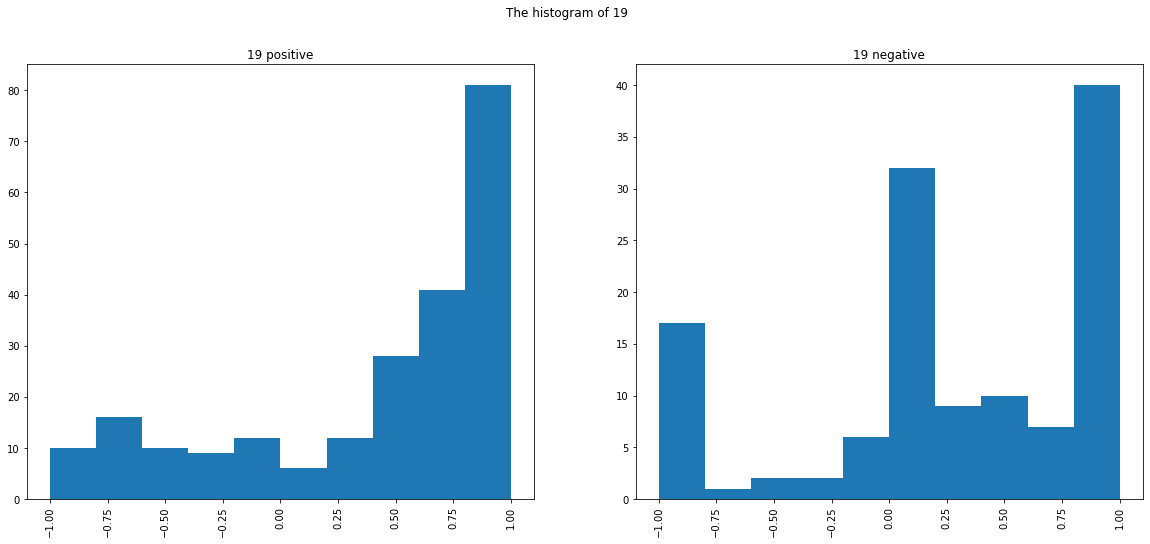

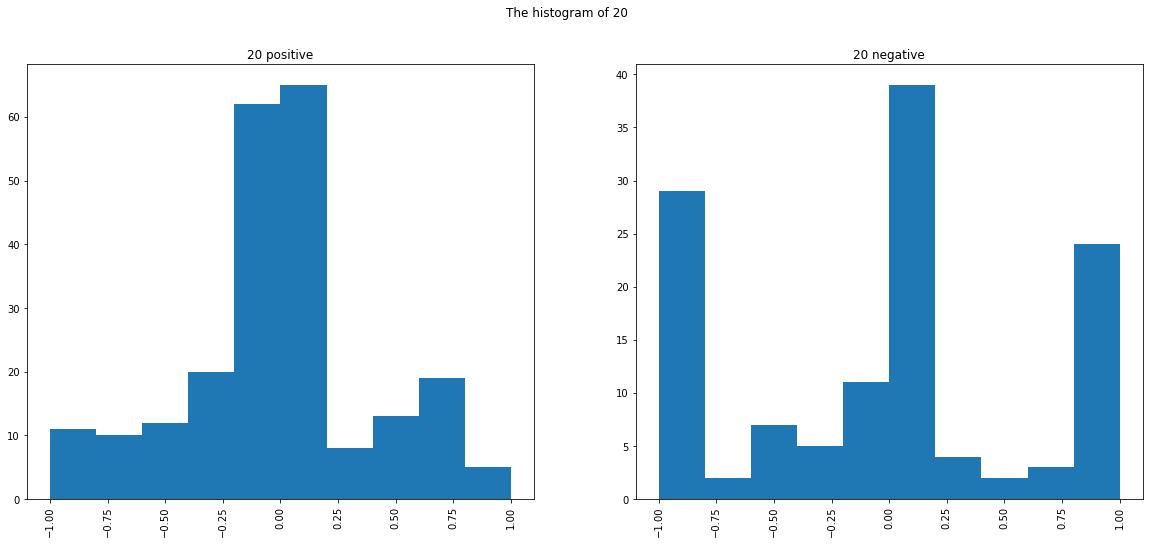

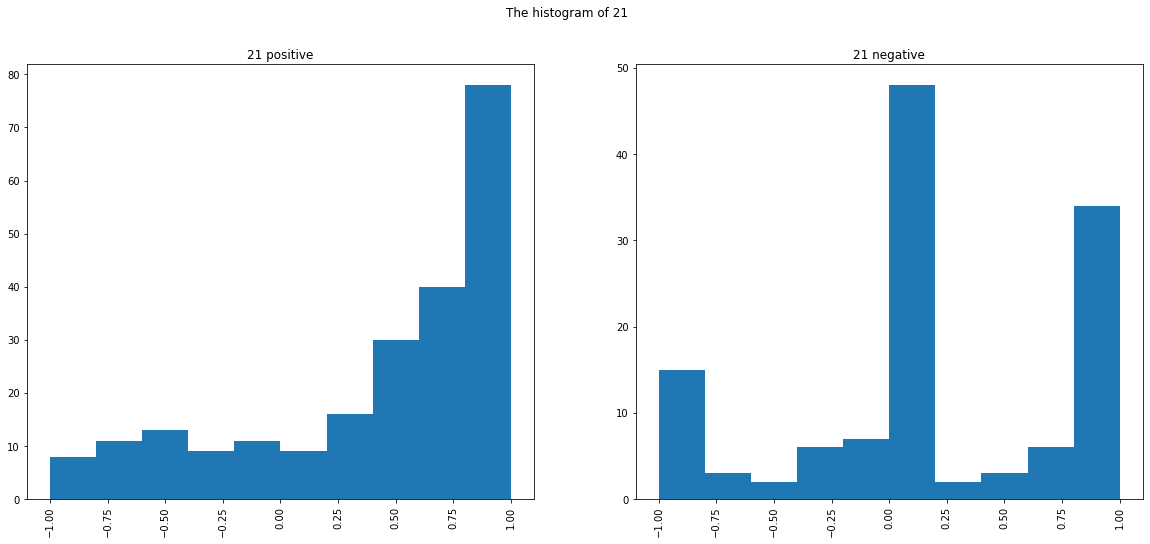

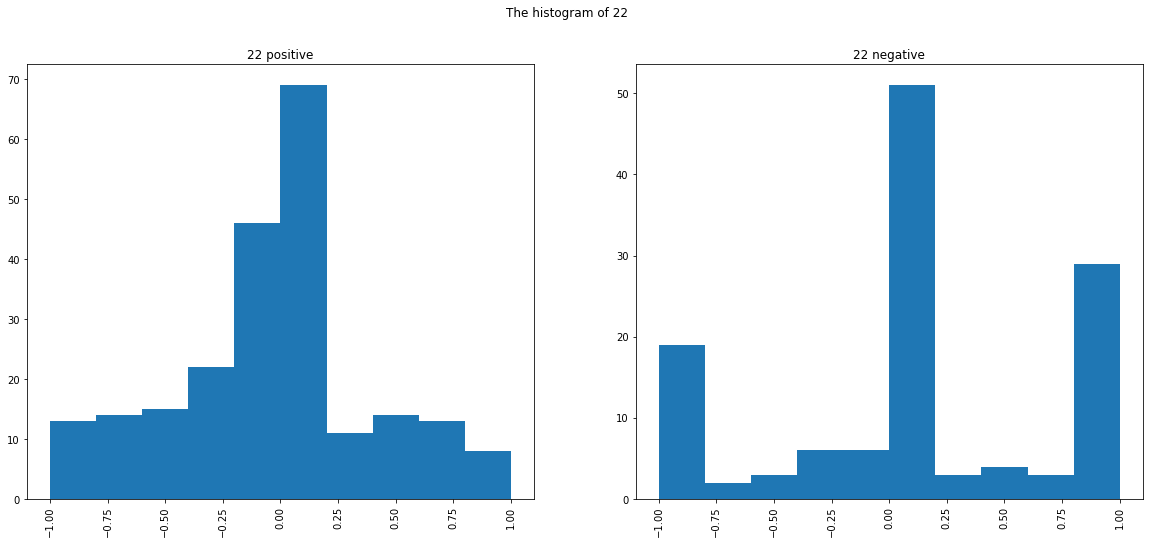

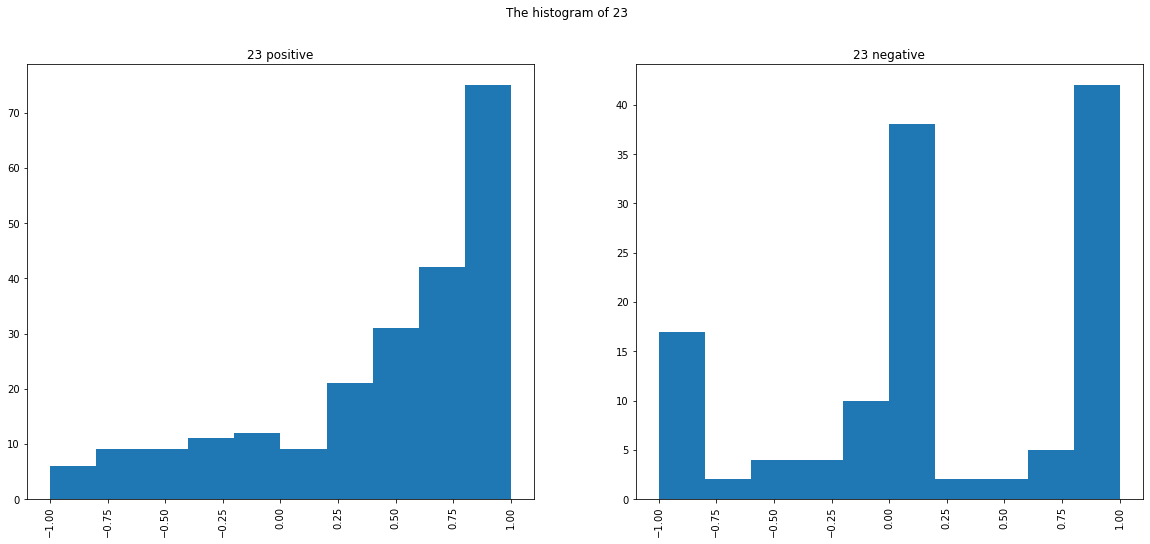

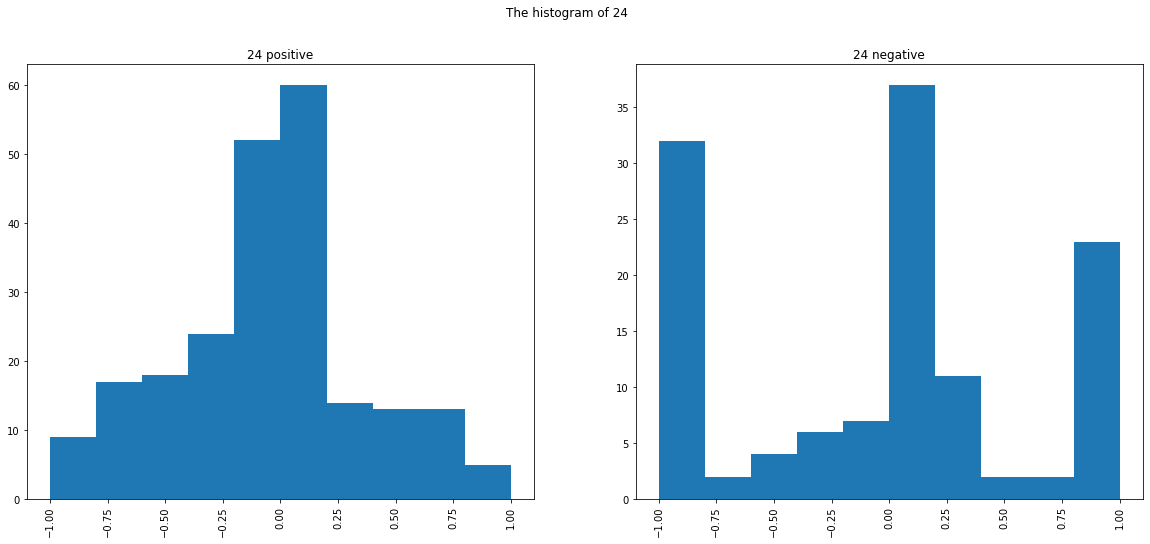

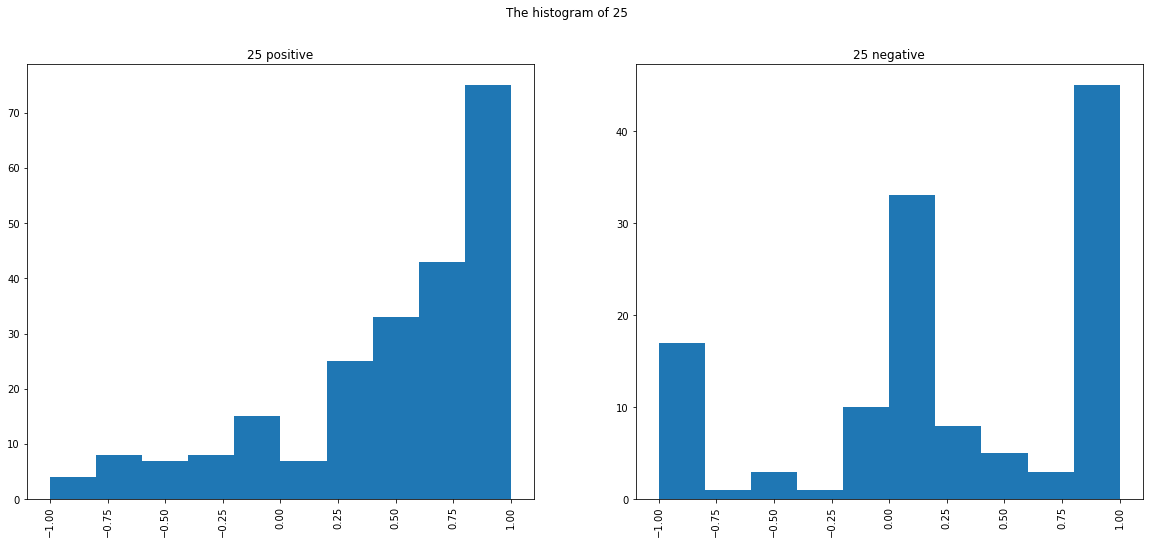

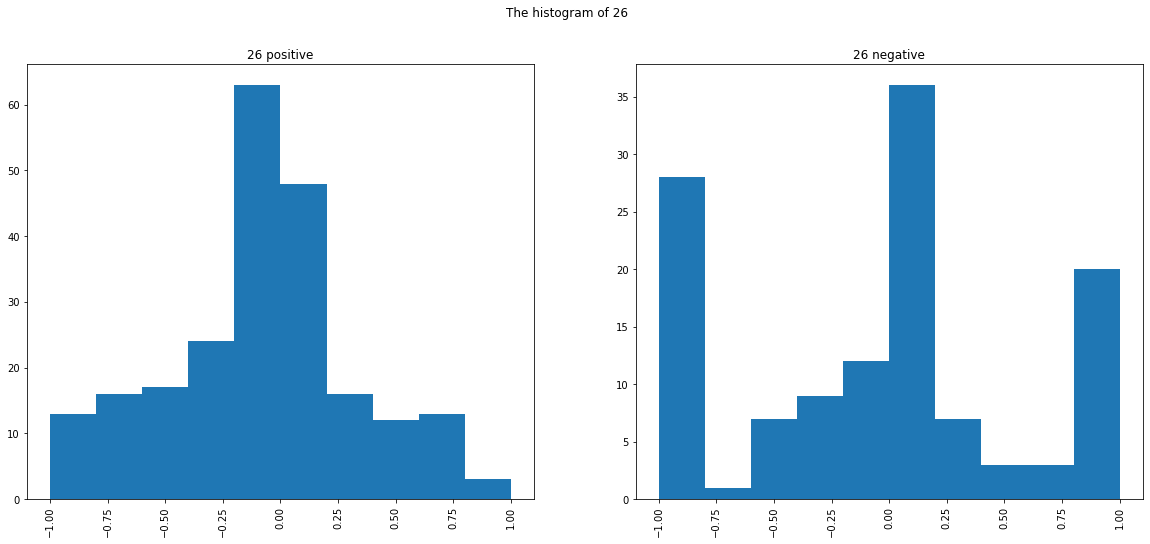

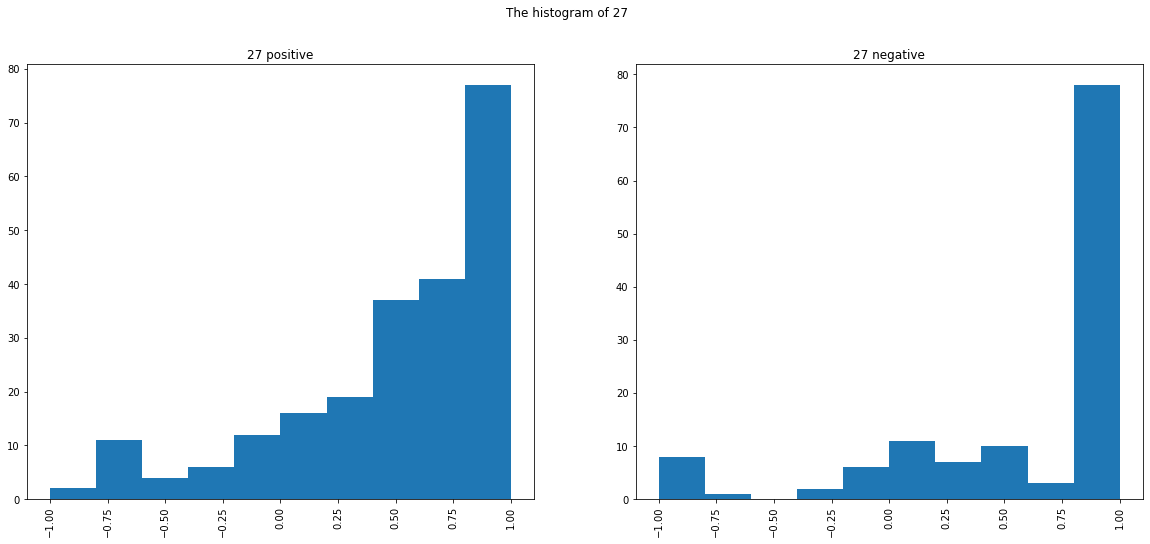

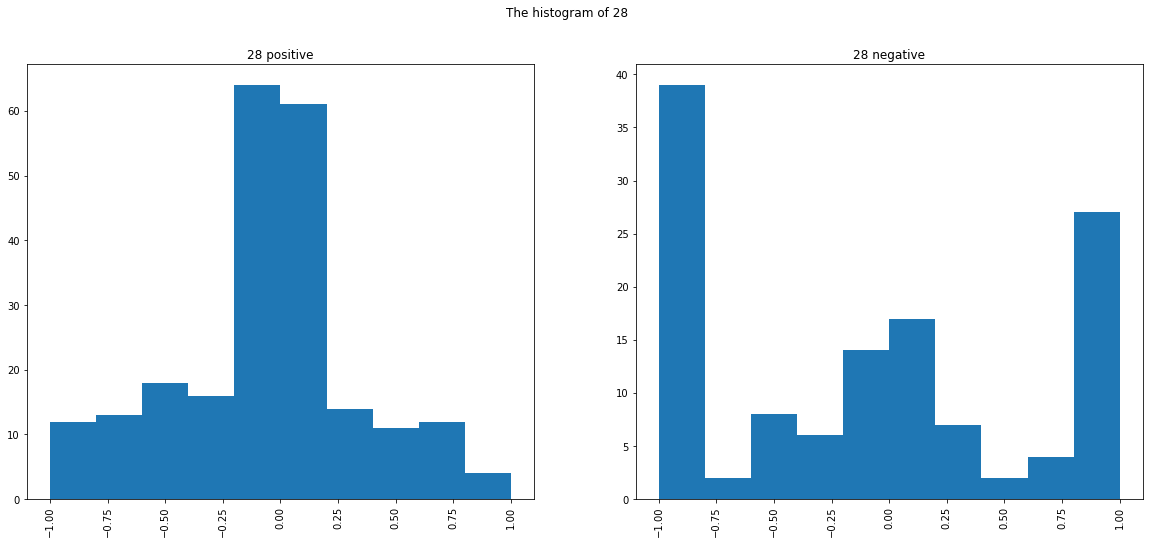

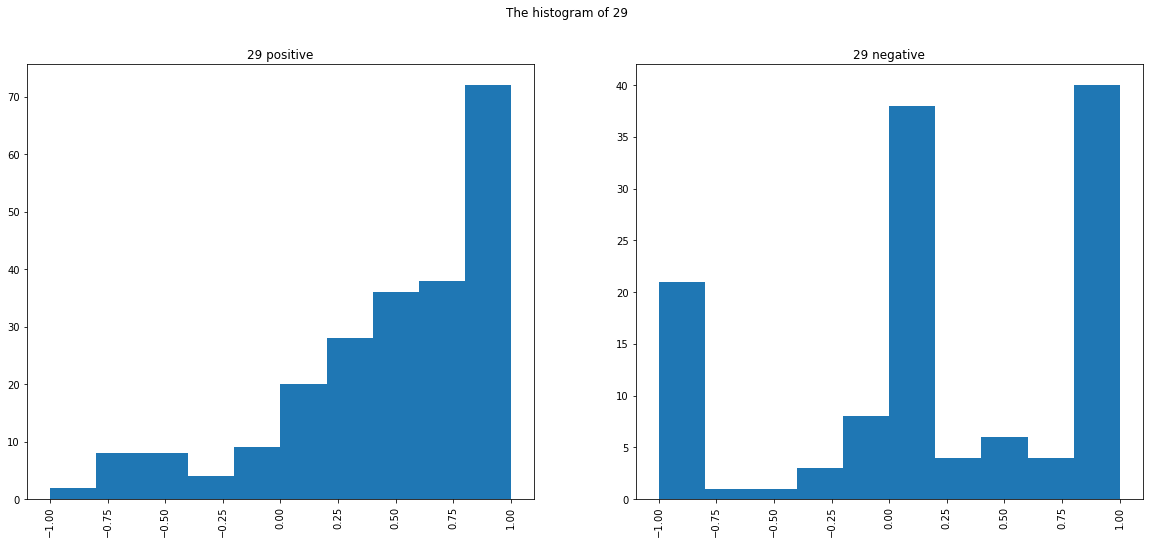

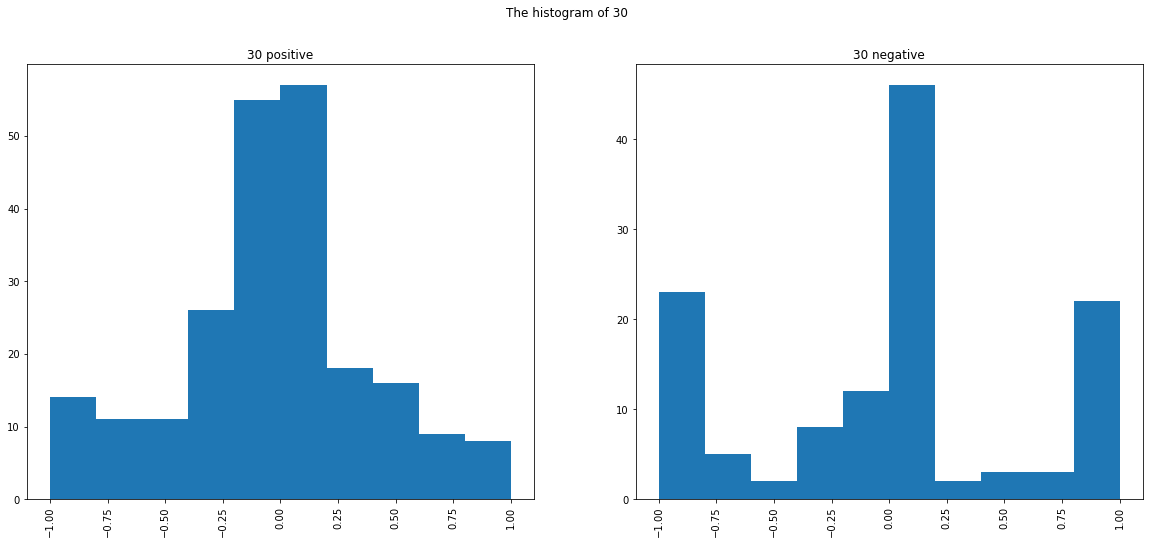

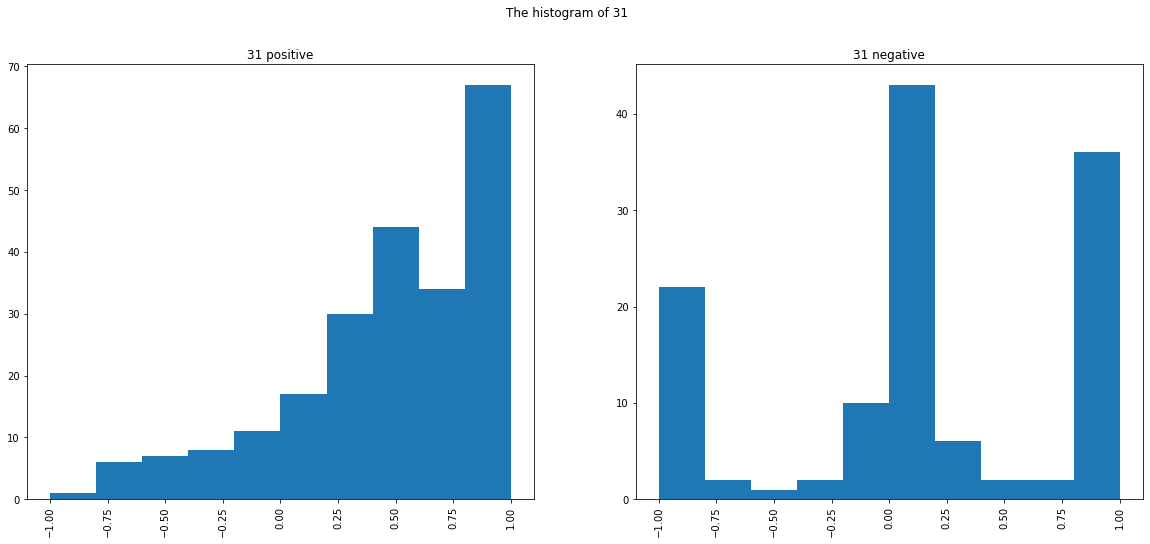

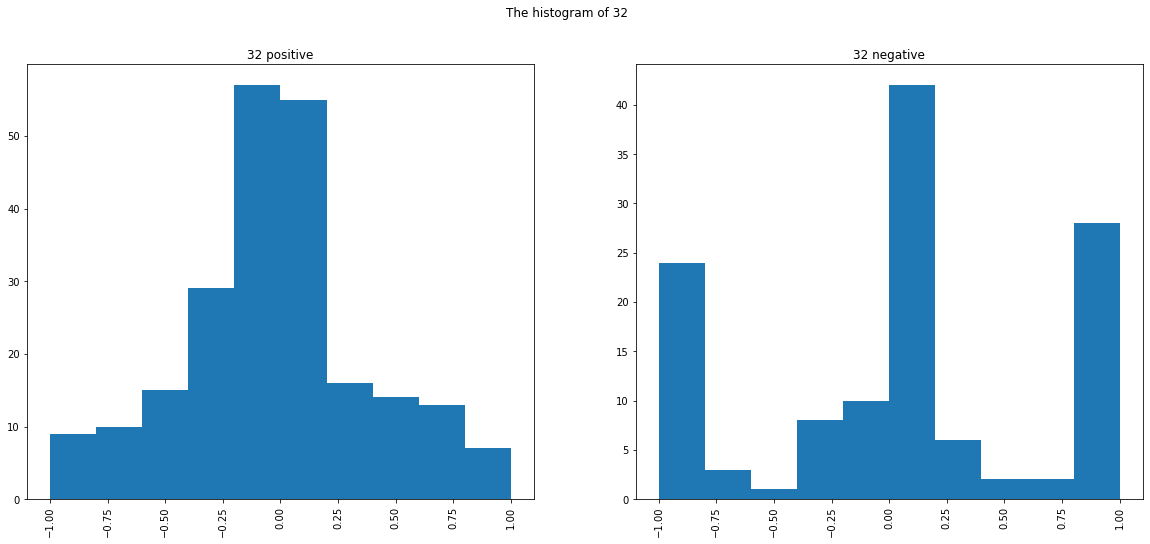

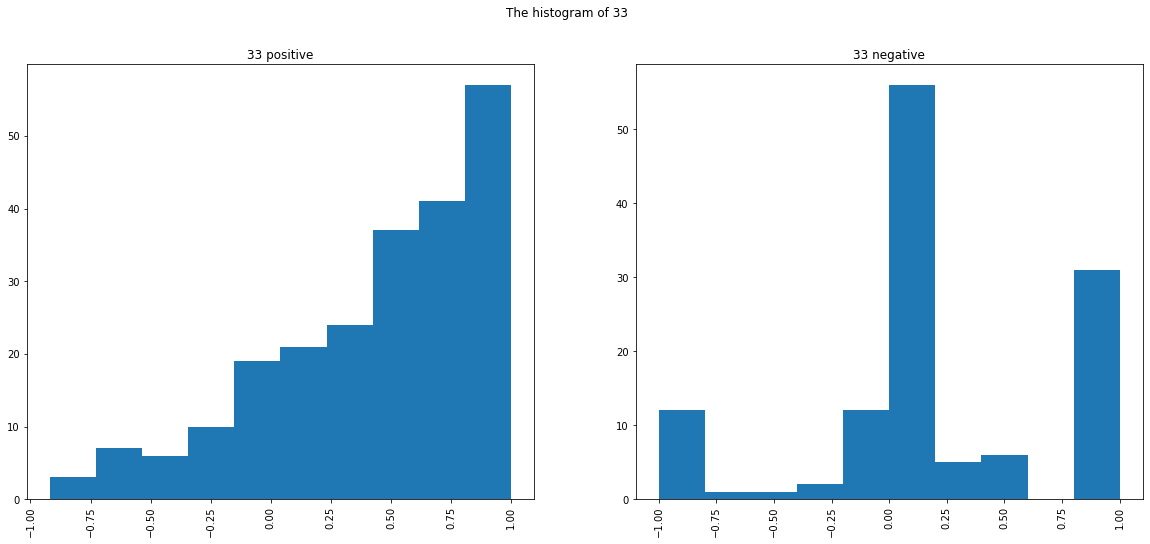

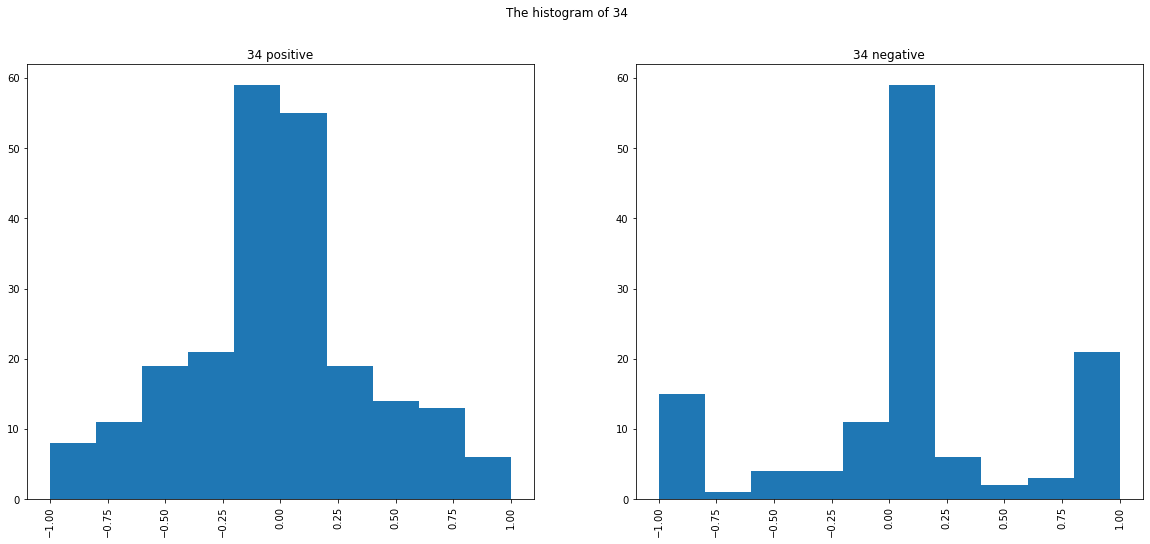

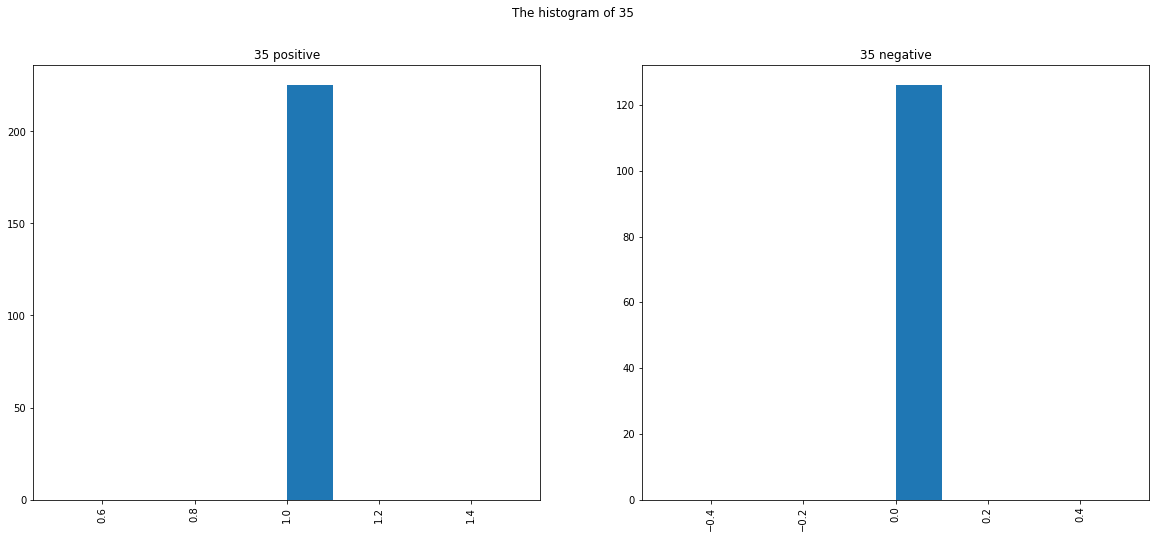

In [10]:
preprocess.draw_hist(content1, positive1,negative1)

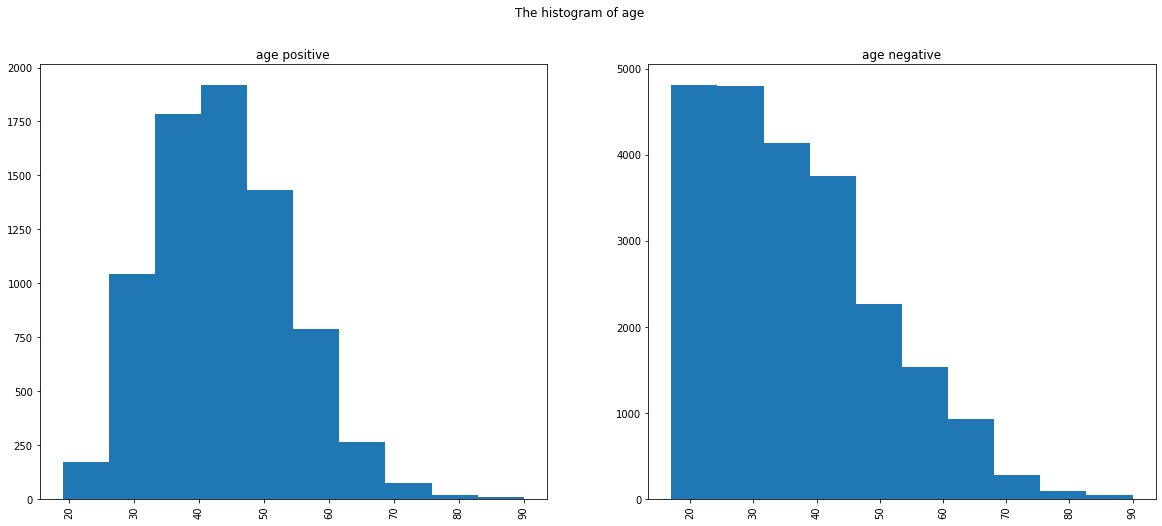

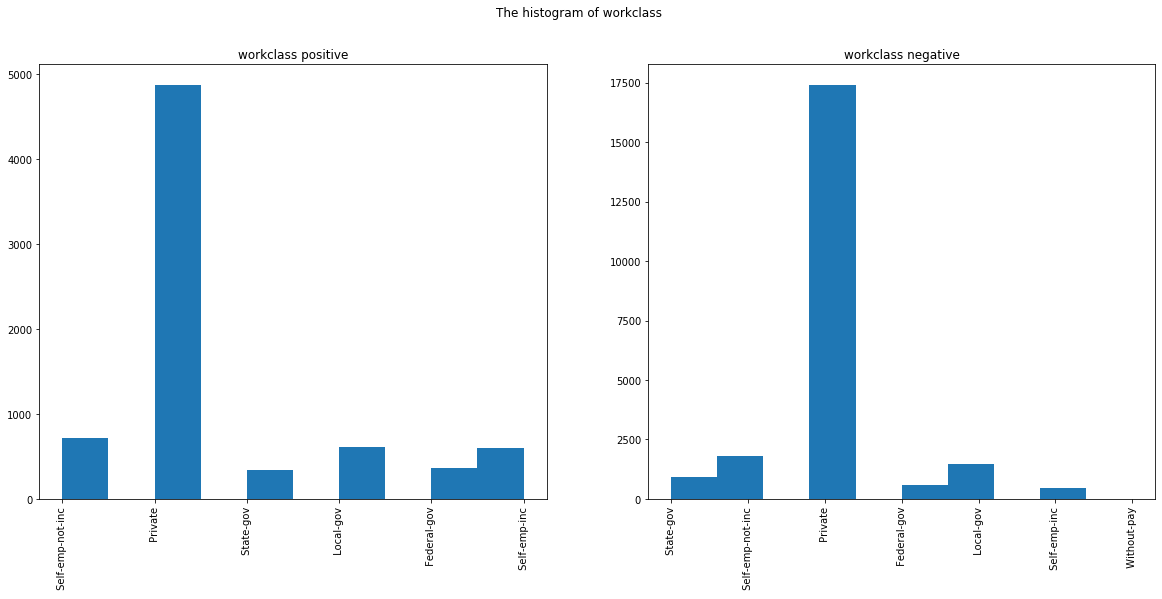

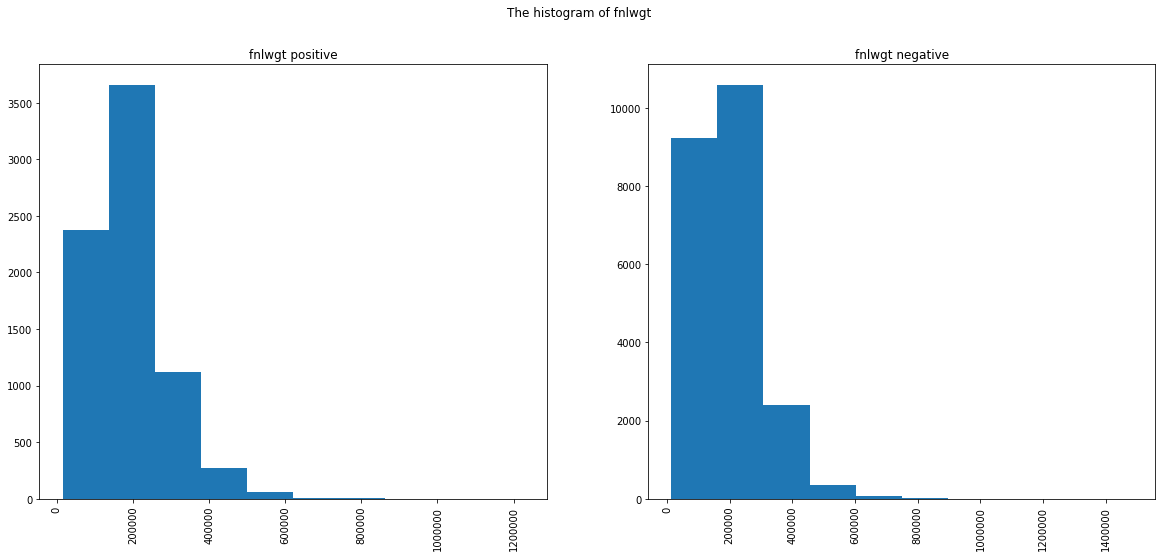

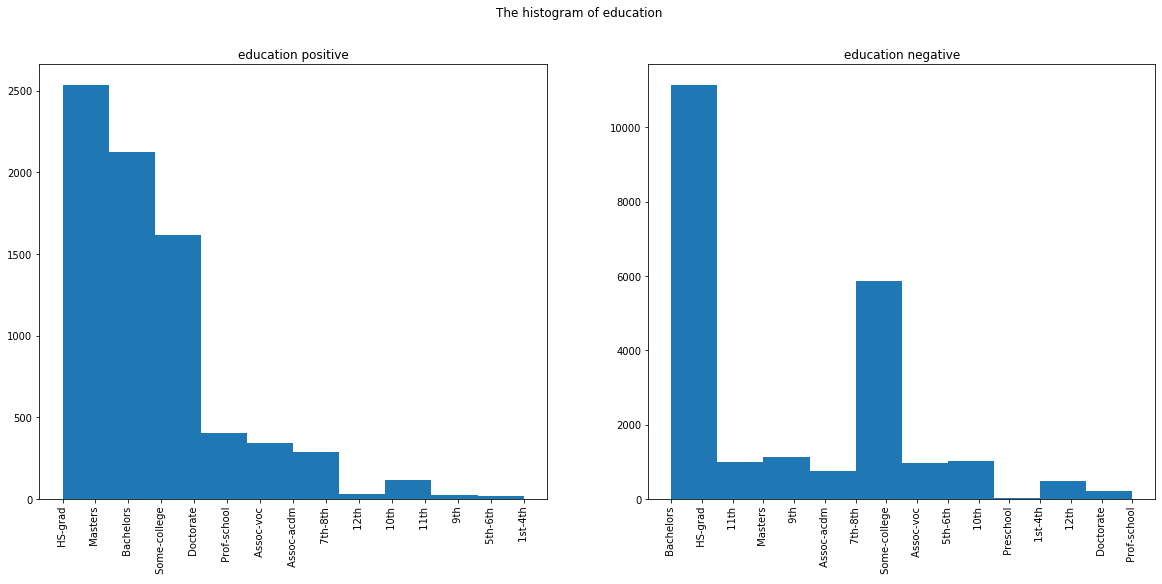

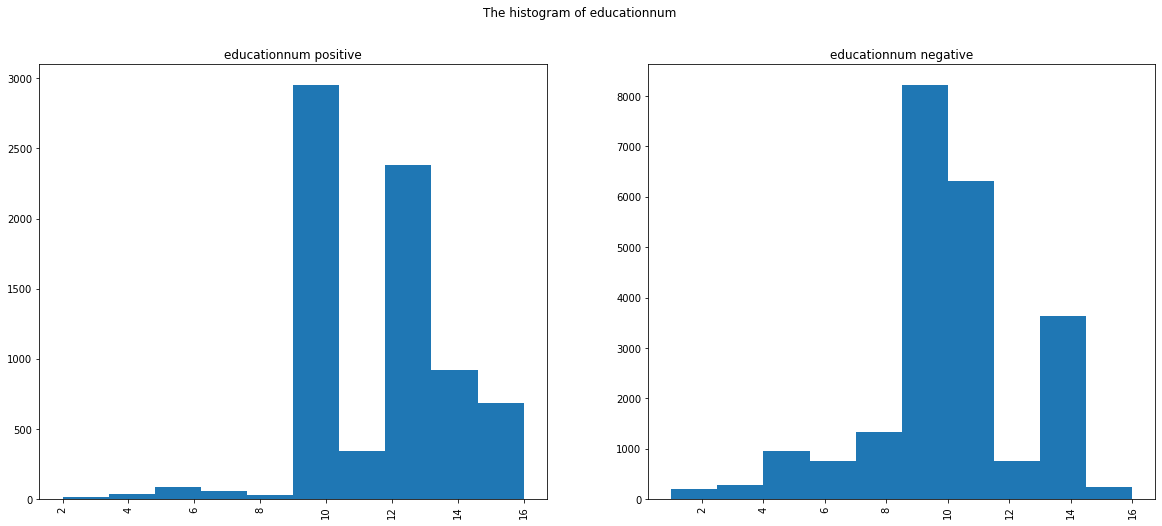

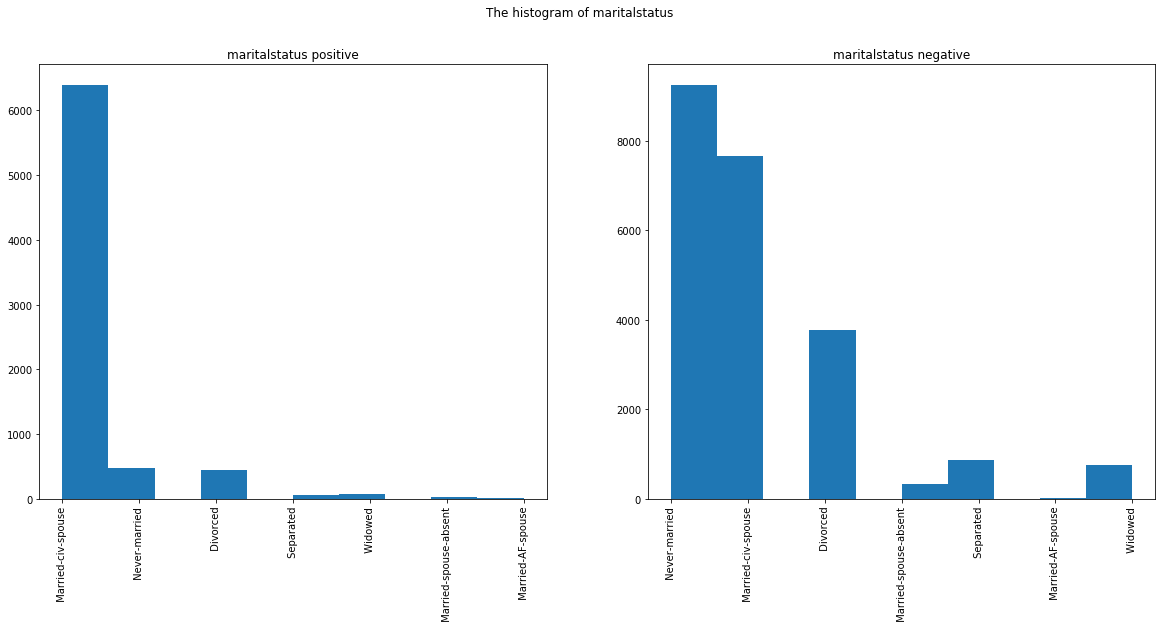

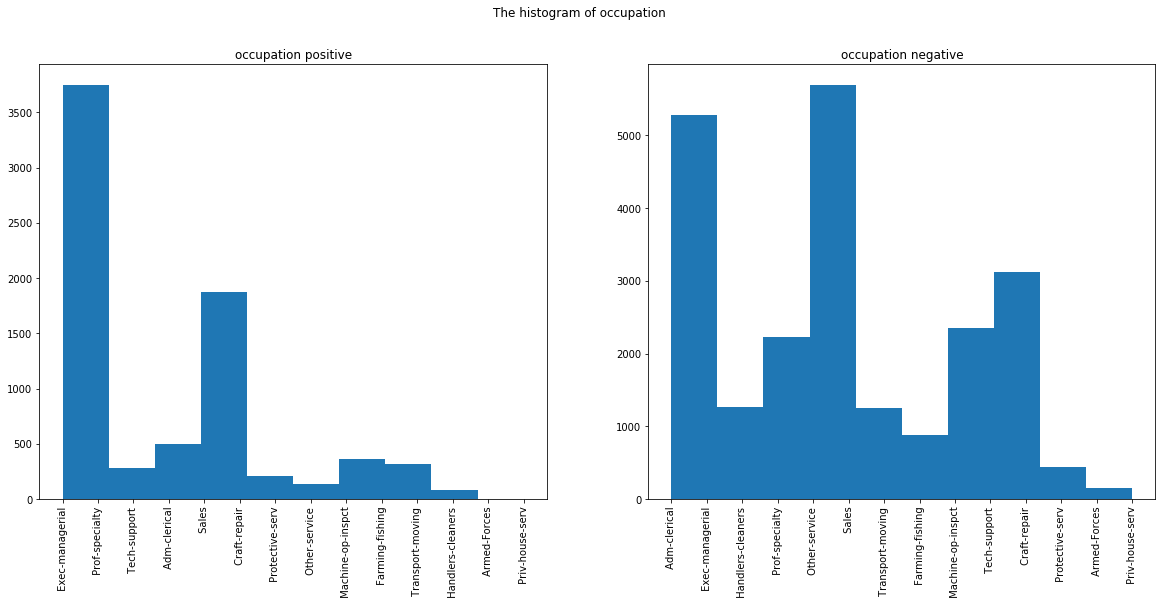

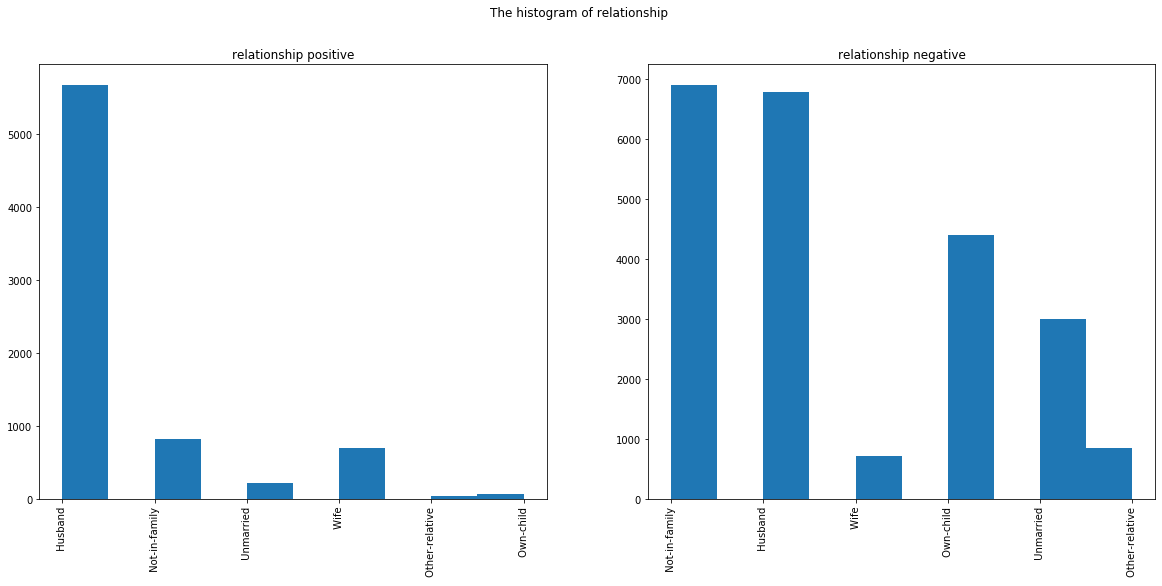

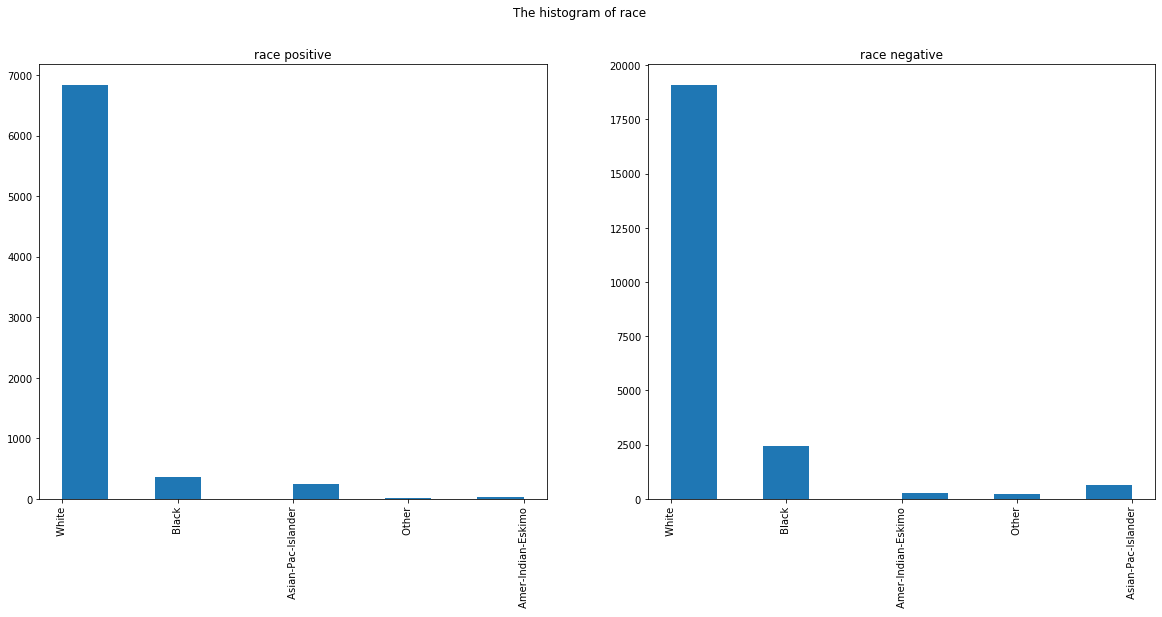

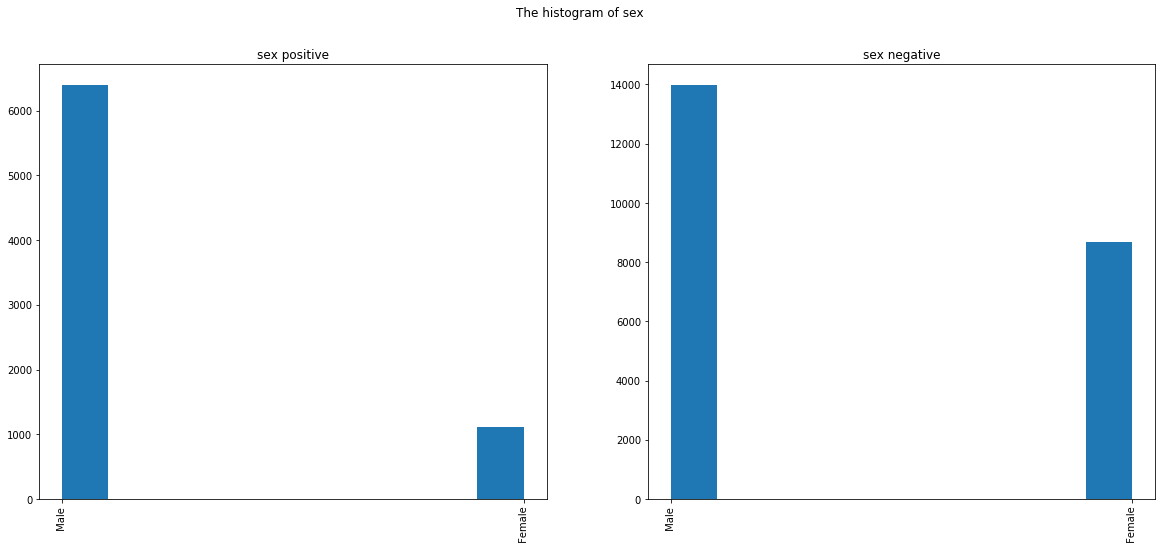

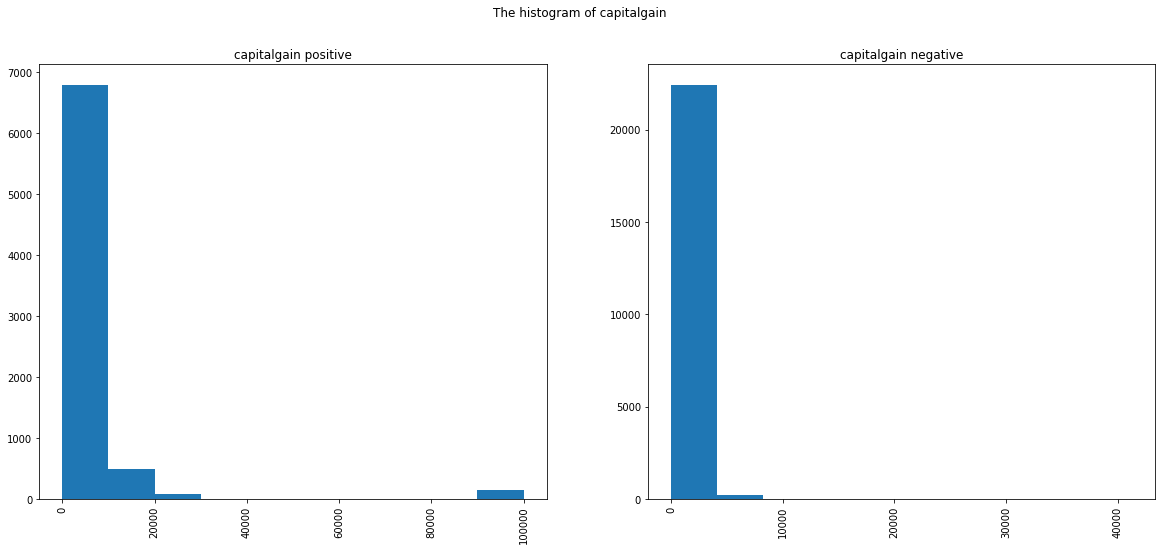

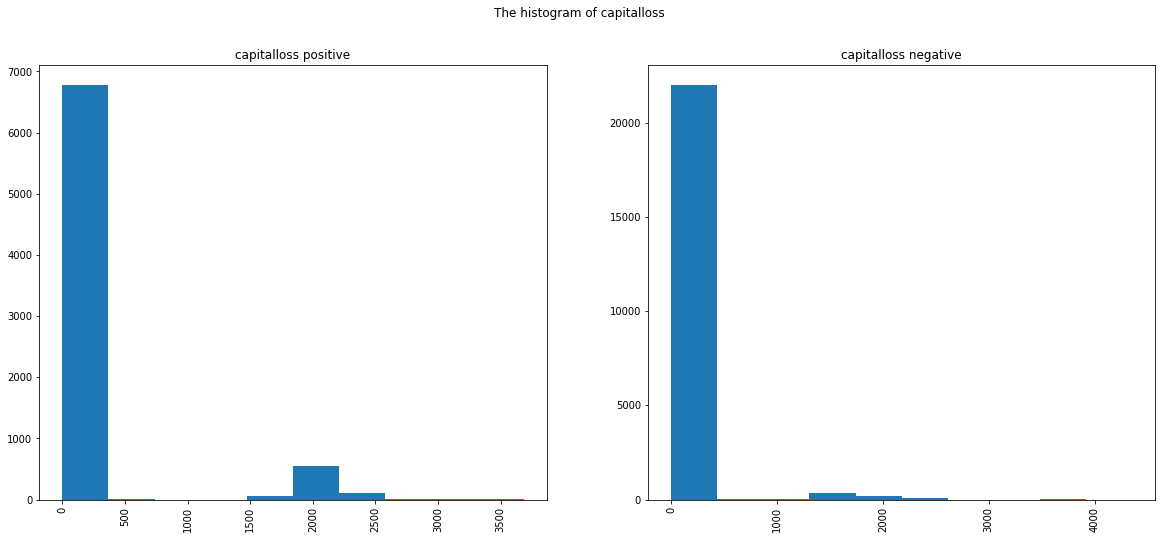

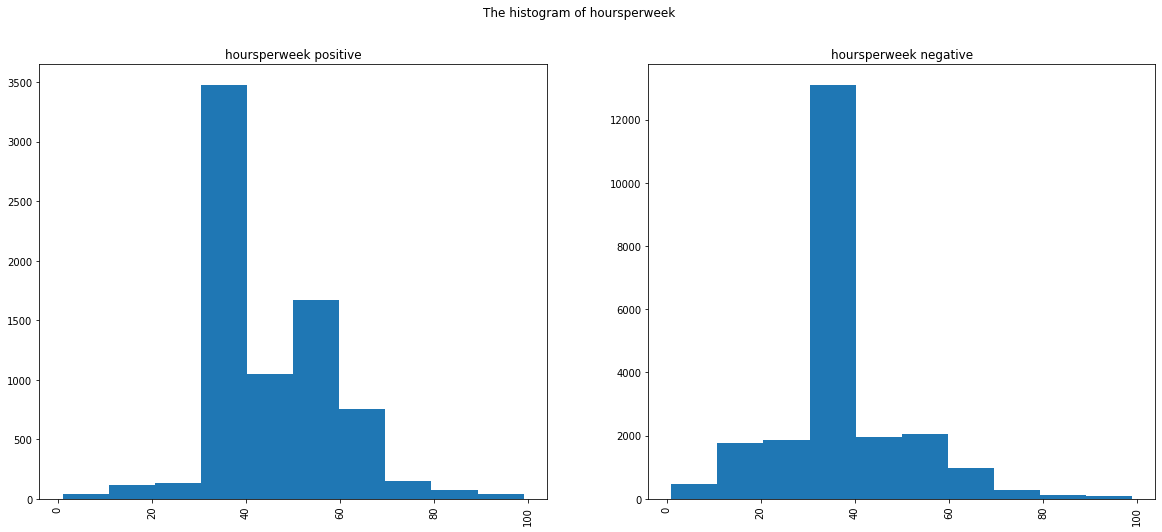

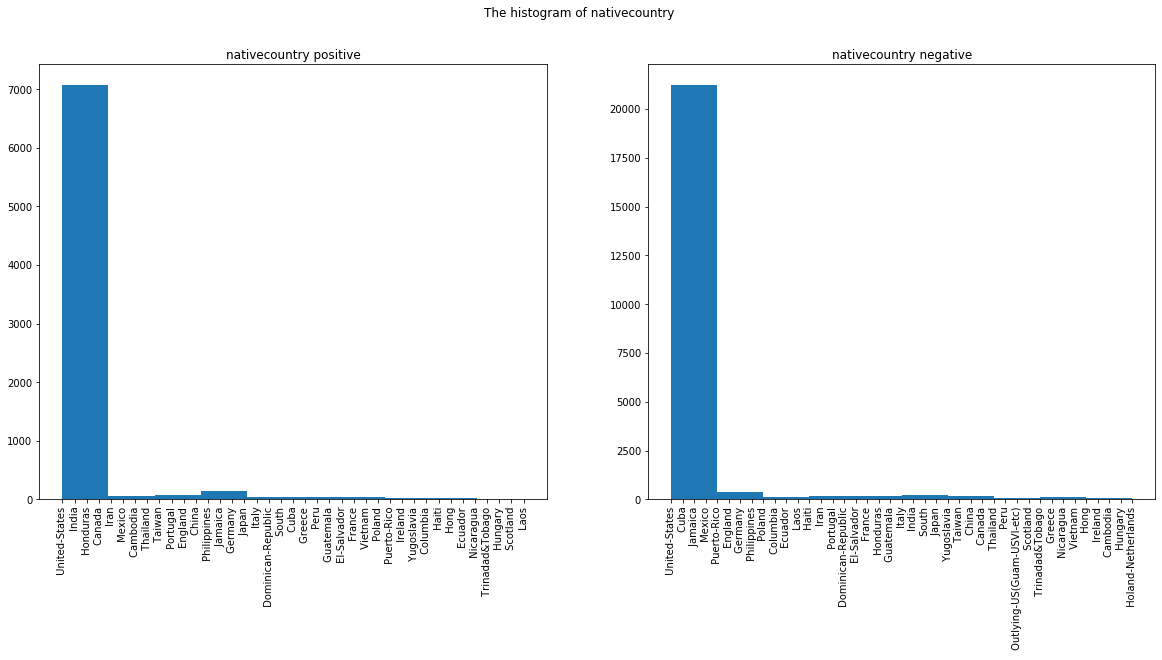

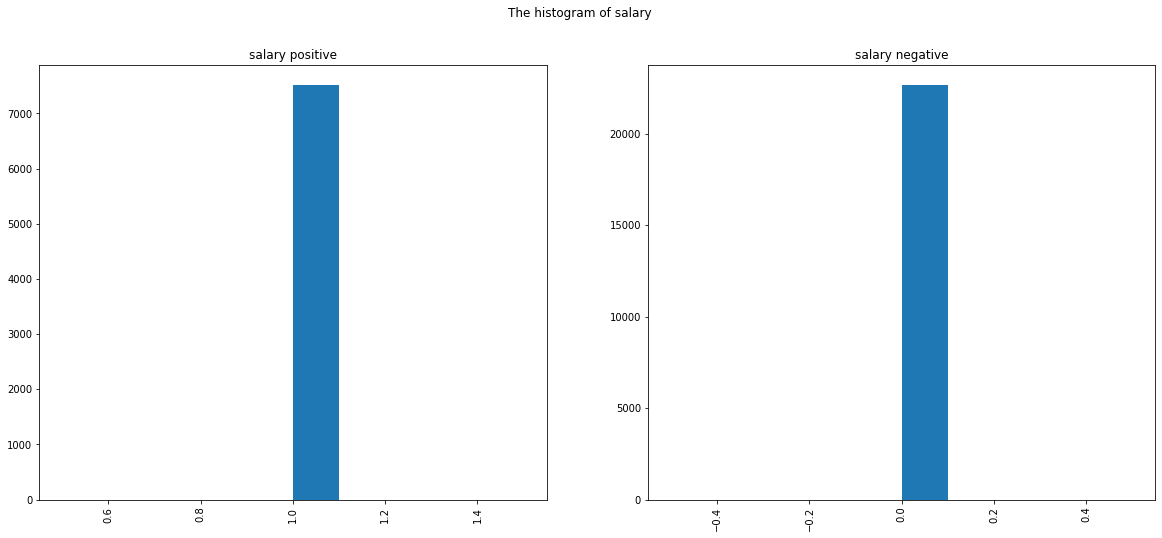

In [11]:
preprocess.draw_hist(content2,positive2,negative2)

In [114]:
workc=pd.get_dummies(content2.workclass,drop_first=True)
educ=pd.get_dummies(content2.education,drop_first=True)
marital_st=pd.get_dummies(content2.maritalstatus,drop_first=True)
occup=pd.get_dummies(content2.occupation,drop_first=True)
relationship=pd.get_dummies(content2.relationship,drop_first=True)
race=pd.get_dummies(content2.race,drop_first=True)
sex=pd.get_dummies(content2.sex,drop_first=True)
native_country=pd.get_dummies(content2.nativecountry,drop_first=True)

In [115]:
content_new = pd.DataFrame()

In [116]:
for key in workc.keys():
    content_new[key] = workc[key]
for key1 in educ.keys():
    content_new[key1]= educ[key1]
for key2 in marital_st.keys():
    content_new[key2]= marital_st[key2]
for key3 in occup.keys():
    content_new[key3]=occup[key3]
for key4 in relationship.keys():
    content_new[key4] = relationship[key4]
for key5 in race.keys():
    content_new[key5]= race[key5]
for key6 in sex.keys():
    content_new[key6]= sex[key6]
for key7 in native_country.keys():
    content_new[key7]=native_country[key7]

In [117]:
content_new['age']=content2.age
content_new['fnlwgt']=content2.fnlwgt
content_new['educationnum']=content2.educationnum
content_new['capitalgain']=content2.capitalgain
content_new['capitalloss']=content2.capitalloss
content_new['hoursperweek']=content2.hoursperweek
content_new['salary']=content2.salary

In [118]:
content_new

Local-gov   Private   Self-emp-inc   Self-emp-not-inc   State-gov  \
0               0         0              0                  0           1   
1               0         0              0                  1           0   
2               0         1              0                  0           0   
3               0         1              0                  0           0   
4               0         1              0                  0           0   
...           ...       ...            ...                ...         ...   
32556           0         1              0                  0           0   
32557           0         1              0                  0           0   
32558           0         1              0                  0           0   
32559           0         1              0                  0           0   
32560           0         0              1                  0           0   

        Without-pay   11th   12th   1st-4th   5th-6th  ...   United-States  \
0                 0      0      0         0         0  ...               1   
1                 0      0      0         0         0  ...               1   
2                 0      0      0         0         0  ...               1   
3                 0      1      0         0         0  ...               1   
4                 0      0      0         0         0  ...               0   
...             ...    ...    ...       ...       ...  ...             ...   
32556             0      0      0         0         0  ...               1   
32557             0      0      0         0         0  ...               1   
32558             0      0      0         0         0  ...               1   
32559             0      0      0         0         0  ...               1   
32560             0      0      0         0         0  ...               1   

        Vietnam   Yugoslavia  age  fnlwgt  educationnum  capitalgain  \
0             0            0   39   77516            13         2174   
1             0            0   50   83311            13            0   
2             0            0   38  215646             9            0   
3             0            0   53  234721             7            0   
4             0            0   28  338409            13            0   
...         ...          ...  ...     ...           ...          ...   
32556         0            0   27  257302            12            0   
32557         0            0   40  154374             9            0   
32558         0            0   58  151910             9            0   
32559         0            0   22  201490             9            0   
32560         0            0   52  287927             9        15024   

       capitalloss  hoursperweek  salary  
0                0            40       0  
1                0            13       0  
2                0            40       0  
3                0            40       0  
4                0            40       0  
...            ...           ...     ...  
32556            0            38       0  
32557            0            40       1  
32558            0            40       0  
32559            0            20       0  
32560            0            40       1  

[30162 rows x 97 columns]

In [119]:
content2

age          workclass  fnlwgt    education  educationnum  \
0       39          State-gov   77516    Bachelors            13   
1       50   Self-emp-not-inc   83311    Bachelors            13   
2       38            Private  215646      HS-grad             9   
3       53            Private  234721         11th             7   
4       28            Private  338409    Bachelors            13   
...    ...                ...     ...          ...           ...   
32556   27            Private  257302   Assoc-acdm            12   
32557   40            Private  154374      HS-grad             9   
32558   58            Private  151910      HS-grad             9   
32559   22            Private  201490      HS-grad             9   
32560   52       Self-emp-inc  287927      HS-grad             9   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capitalgain  capitalloss  hoursperweek   nativecountry  salary  
0         Male         2174            0            40   United-States       0  
1         Male            0            0            13   United-States       0  
2         Male            0            0            40   United-States       0  
3         Male            0            0            40   United-States       0  
4       Female            0            0            40            Cuba       0  
...        ...          ...          ...           ...             ...     ...  
32556   Female            0            0            38   United-States       0  
32557     Male            0            0            40   United-States       1  
32558   Female            0            0            40   United-States       0  
32559     Male            0            0            20   United-States       0  
32560   Female        15024            0            40   United-States       1  

[30162 rows x 15 columns]

In [120]:
final_training_set_X = np.zeros((1, content1.shape[1]))

In [121]:
print(content1.shape[1])

35


In [122]:
content1[range(1,content1.shape[1])]

1   2        3        4        5        6        7        8        9   \
0     1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..  ..      ...      ...      ...      ...      ...      ...      ...   
346   1   0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1   0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1   0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1   0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1   0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

          10  ...       25       26       27       28       29       30  \
0    0.03760  ...  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090   
1   -0.04549  ... -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11593   
2    0.01198  ...  0.57528 -0.40220  0.58984 -0.22145  0.43100 -0.17365   
3    0.00000  ...  1.00000  0.90695  0.51613  1.00000  1.00000 -0.20099   
4   -0.16399  ...  0.03286 -0.65158  0.13290 -0.53206  0.02431 -0.62197   
..       ...  ...      ...      ...      ...      ...      ...      ...   
346 -0.04622  ...  0.95378 -0.04202  0.83479  0.00123  1.00000  0.12815   
347  0.01606  ...  0.94520  0.01361  0.93522  0.04925  0.93159  0.08168   
348  0.02446  ...  0.93988  0.03193  0.92489  0.02542  0.92120  0.02242   
349  0.00110  ...  0.91050 -0.02099  0.89147 -0.07760  0.82983 -0.17238   
350 -0.09139  ...  0.86467 -0.15114  0.81147 -0.04822  0.78207 -0.00703   

          31       32       33       34  
0    0.42267 -0.54487  0.18641 -0.45300  
1   -0.16626 -0.06288 -0.13738 -0.02447  
2    0.60436 -0.24180  0.56045 -0.38238  
3    0.25682  1.00000 -0.32382  1.00000  
4   -0.05707 -0.59573 -0.04608 -0.65697  
..       ...      ...      ...      ...  
346  0.86660 -0.10714  0.90546 -0.04307  
347  0.94066 -0.00035  0.91483  0.04712  
348  0.92459  0.00442  0.92697 -0.00577  
349  0.96022 -0.03757  0.87403 -0.16243  
350  0.75747 -0.06678  0.85764 -0.06151  

[351 rows x 34 columns]

In [123]:
content_new.header=None

In [124]:
content_new

Local-gov   Private   Self-emp-inc   Self-emp-not-inc   State-gov  \
0               0         0              0                  0           1   
1               0         0              0                  1           0   
2               0         1              0                  0           0   
3               0         1              0                  0           0   
4               0         1              0                  0           0   
...           ...       ...            ...                ...         ...   
32556           0         1              0                  0           0   
32557           0         1              0                  0           0   
32558           0         1              0                  0           0   
32559           0         1              0                  0           0   
32560           0         0              1                  0           0   

        Without-pay   11th   12th   1st-4th   5th-6th  ...   United-States  \
0                 0      0      0         0         0  ...               1   
1                 0      0      0         0         0  ...               1   
2                 0      0      0         0         0  ...               1   
3                 0      1      0         0         0  ...               1   
4                 0      0      0         0         0  ...               0   
...             ...    ...    ...       ...       ...  ...             ...   
32556             0      0      0         0         0  ...               1   
32557             0      0      0         0         0  ...               1   
32558             0      0      0         0         0  ...               1   
32559             0      0      0         0         0  ...               1   
32560             0      0      0         0         0  ...               1   

        Vietnam   Yugoslavia  age  fnlwgt  educationnum  capitalgain  \
0             0            0   39   77516            13         2174   
1             0            0   50   83311            13            0   
2             0            0   38  215646             9            0   
3             0            0   53  234721             7            0   
4             0            0   28  338409            13            0   
...         ...          ...  ...     ...           ...          ...   
32556         0            0   27  257302            12            0   
32557         0            0   40  154374             9            0   
32558         0            0   58  151910             9            0   
32559         0            0   22  201490             9            0   
32560         0            0   52  287927             9        15024   

       capitalloss  hoursperweek  salary  
0                0            40       0  
1                0            13       0  
2                0            40       0  
3                0            40       0  
4                0            40       0  
...            ...           ...     ...  
32556            0            38       0  
32557            0            40       1  
32558            0            40       0  
32559            0            20       0  
32560            0            40       1  

[30162 rows x 97 columns]

In [132]:
num_feature = len(content1.keys()) - 1
content1_x=np.matrix(content1.values[:, range(num_feature)])
content1_y = np.array(content1.values[:, num_feature])
def shuffle_data(X, y):
    data = np.hstack((X, np.matrix(y).T))
    np.random.shuffle(data)
    X = data[:, range(np.shape(data)[1]-1)]
    y = np.array(data[:, np.shape(data)[1]-1].T)[0]
    return X, y

In [133]:
import numpy as np

class LogisticRegression:



    # Logistic regression class

    # Inputs:

    #  X with size N x D

    #  Y with size N x 1

    #  learning rate


    def __init__(self):



        self.lr = None

        self.eps = None

        self.model_param = None

        self.model_output = None



    def fit(self, x_data, y_target, learning_rate, epsilon):

        """

        Fit model coefficients.


        Inputs:

        X: 1D or 2D numpy array

        y: 1D numpy array

        learning_rate

        epsilon

        """

        N, D = x_data.shape

        w = np.ones(D)

        gradient = np.inf

        wT = np.array([w]).T

        np.seterr(all='ignore')



        while np.linalg.norm(gradient) > epsilon:

            a = np.dot(x_data, wT)  # N x 1

            function = (1 / (1 + np.exp(-a)))

            b = y_target - function

            gradient = x_data.T@b

            #print(gradient.shape)

            wT = wT + (learning_rate * gradient)

            norm = np.linalg.norm(gradient)

            print(norm)



        # set attributes

        self.model_param = wT



        return self.model_param



    def predict(self,x_data, weights):

        """

        Output model prediction.



        Arguments:

        X: 1D or 2D numpy array

        weights: 1D numpy array

        """

        model_output = np.dot(x_data, weights)

        model_output[model_output < 0.5] = 0

        model_output[model_output >= 0.5] = 1

        self.model_output = model_output

        return self.model_output



    def accuracy(self,y_target, y_predict):



        tptn = np.equal(y_target,y_predict)

        TPTN = np.sum([tptn])

        FPFN = np.size(y_target) - TPTN

        accuracy = TPTN/(FPFN+TPTN)



        return accuracy


In [232]:
#from lregression import LogisticRegression
lm = LogisticRegression()
def k_fold_validation( model, X,y,fold_size):
    #divide data
    size = np.shape(X)[0]
    fold_sizes = np.array([int(size / fold_size)] * fold_size)

    for i in range(size % fold_size):
        fold_sizes[i] += 1
    acc = []
    cross_validation = []

    for k in range(0, fold_size):
        #model.reset()
        validation_start_index = sum(fold_sizes[range(0, k)])
        validation_set_X = X[range(validation_start_index, validation_start_index+fold_sizes[k])]
        validation_set_y = y[range(validation_start_index, validation_start_index+fold_sizes[k])]
        print(validation_set_y.shape)
        print(validation_set_X.shape)
        final_training_set_X = np.zeros((1, X.shape[1]))
        final_training_set_y = []
        for i in range(0, fold_size):
            if (i == k):
                continue
            else:
                start_index = sum(fold_sizes[range(0, i)])
                training_set_X = X[range(start_index, start_index+fold_sizes[i])]
                training_set_y = y[range(start_index, start_index+fold_sizes[i])]

                final_training_set_X = np.vstack((final_training_set_X, training_set_X))
                final_training_set_y = np.concatenate((final_training_set_y, training_set_y))

        #drop the first row
        final_training_set_X = final_training_set_X[range(1, len(final_training_set_X))]
       # print(final_training_set_y.shape)
        final_training_set_y = np.matrix(final_training_set_y).T
        weights = model.fit(final_training_set_X, final_training_set_y,0.0017, 0.0040)
        predict= model.predict(validation_set_X, weights)
        acc=model.accuracy(np.matrix(validation_set_y).T, predict)
      
    return (np.mean(acc), np.sum(predict),weights)

In [233]:
X,y=shuffle_data(content1_x,content1_y)

In [234]:
print('acc',acc)
print('predict',predict)
print('weight',wright.shape)

acc 0.7857142857142857
predict 54.0
weight (34, 1)


In [ ]:
acc,predict,wright=k_fold_validation(lm,X,y,5)

(71,)
(71, 34)
122.54734348277252
120.91531033128238
118.97448565925512
116.71514286644253
114.22329151062213
111.66060048174336
109.17514769320421
106.83573471097372
104.63625669490325
102.5284440055197
100.44676950509698
98.321206776622
96.08285161815519
93.66652180779681
91.01384613587253
88.0802769407529
84.84771039295492
81.33978494000031
77.63163474304021
73.84555819712668
70.13092646605679
66.6347782135121
63.47286793004383
60.709812813061326
58.35361549043592
56.36473825478489
54.6744571190186
53.204588524964194
51.882363999832634
50.648251351945
49.45785842223522
48.28036066237996
47.09562764593893
45.8913774259457
44.660920030543714
43.40157573715721
42.11363801003647
40.79969665190797
39.46416028840023
38.11286725665909
36.752723902136665
35.39134794025277
34.036718914885846
32.69684925057747
31.37949138462755
30.091892917306208
28.840606020564685
27.63135180504387
26.468936136991825
25.35721082078901
24.29907290504068
23.296494717463638
22.350577676447656
21.461623651422972

3.284787470591354
3.2793581736014215
3.2739479583547784
3.2685567170252745
3.2631843426215372
3.257830728978797
3.2524957707508007
3.2471793634018304
3.24188140319881
3.236601787203518
3.231340413264886
3.226097180011377
3.2208719868434756
3.215664733926261
3.2104753221820523
3.2053036532831602
3.2001496296447045
3.195013154417554
3.1898941314812803
3.1847924654372686
3.1797080616018647
3.1746408259996053
3.169590665356539
3.164557487093617
3.159541199320156
3.1545417108274014
3.14955893108211
3.144592770220278
3.139643139040865
3.1347099489996673
3.1297931122031795
3.1248925414026005
3.1200081499878562
3.115139851981706
3.1102875620339243
3.1054511954155344
3.100630668013107
3.0958258963231384
3.091036797446476
3.0862632890828
3.0815052895251878
3.076762717654724
3.0720354929351674
3.0673235354076835
3.062626765685644
3.0579451049494617
3.053278474941485
3.0486267979609796
3.0439899968591178
3.039367995034062
3.0347607164260753
3.030168085512701
3.0255900273039837
3.021026467337747
3.

1.5114184121907015
1.5102602667740408
1.5091038114729047
1.507949042666825
1.506795956746167
1.505644550112051
1.504494819176334
1.5033467603615611
1.5022003701009226
1.501055644838213
1.4999125810277922
1.4987711751345338
1.4976314236337989
1.4964933230113762
1.4953568697634645
1.4942220603966132
1.493088891427685
1.4919573593838256
1.490827460802415
1.4896991922310256
1.4885725502273914
1.487447531359361
1.486324132204863
1.485202349351859
1.4840821793983157
1.4829636189521602
1.4818466646312418
1.4807313130632935
1.479617560885892
1.4785054047464248
1.477394841302049
1.4762858672196484
1.4751784791758125
1.4740726738567815
1.4729684479584133
1.4718657981861547
1.470764721254996
1.4696652138894388
1.4685672728234593
1.4674708948004693
1.4663760765732827
1.4652828149040762
1.4641911065643602
1.463100948334932
1.4620123370058589
1.4609252693764203
1.4598397422550902
1.4587557524594923
1.4576732968163701
1.456592372161554
1.4555129753399174
1.4544351032053526
1.453358752620734
1.4522839

1.028887735510837
1.0283374348350067
1.0277877177163757
1.027238583274864
1.0266900306320395
1.0261420589111367
1.025594667237033
1.0250478547362565
1.024501620536983
1.0239559637690172
1.0234108835638092
1.02286637905443
1.0223224493755907
1.021779093663615
1.0212363110564515
1.0206941006936616
1.020152461716421
1.0196113932675113
1.0190708944913176
1.0185309645338287
1.0179916025426208
1.0174528076668758
1.016914579057352
1.016376915866397
1.0158398172479426
1.0153032823574923
1.0147673103521249
1.01423190039049
1.0136970516328003
1.0131627632408335
1.0126290343779245
1.0120958642089621
1.0115632519003885
1.0110311966201826
1.0104996975378866
1.0099687538245632
1.009438364652824
1.0089085291968038
1.0083792466321733
1.0078505161361273
1.0073223368873756
1.0067947080661581
1.006267628854214
1.0057410984348085
1.0052151159927039
1.0046896807141674
1.0041647917869718
1.0036404484003787
1.003116649745153
1.0025933950135335
1.0020706833992623
1.0015485140975555
1.001026886305105
1.0005057

0.7714726138666264
0.7711640645391667
0.7708557631420779
0.7705477093632963
0.77023990289124
0.7699323434147957
0.7696250306233134
0.7693179642066139
0.7690111438549883
0.7687045692591878
0.7683982401104364
0.7680921561004111
0.7677863169212671
0.7674807222656146
0.7671753718265257
0.7668702652975387
0.7665654023726466
0.7662607827463028
0.76595640611343
0.7656522721693949
0.765348380610032
0.7650447311316284
0.7647413234309254
0.7644381572051261
0.7641352321518815
0.7638325479692948
0.7635301043559335
0.763227901010803
0.7629259376333719
0.7626242139235486
0.7623227295817012
0.7620214843086407
0.7617204778056261
0.7614197097743696
0.7611191799170234
0.7608188879361895
0.7605188335349147
0.760219016416688
0.7599194362854473
0.7596200928455645
0.7593209858018651
0.7590221148596068
0.7587234797244917
0.7584250801026609
0.7581269157006967
0.7578289862256161
0.7575312913848785
0.7572338308863757
0.7569366044384414
0.7566396117498365
0.75634285252976
0.7560463264878523
0.7557500333341796
0.

0.6088916045093064
0.6086968386862603
0.6085021877019171
0.6083076514353298
0.6081132297657182
0.6079189225724633
0.6077247297351167
0.6075306511333862
0.6073366866471442
0.6071428361564262
0.6069490995414301
0.6067554766825208
0.6065619674602192
0.6063685717552082
0.6061752894483331
0.6059821204206096
0.6057890645531974
0.6055961217274335
0.605403291824803
0.6052105747269623
0.6050179703157159
0.6048254784730396
0.604633099081062
0.6044408320220789
0.604248677178533
0.6040566344330346
0.6038647036683532
0.6036728847674121
0.6034811776132984
0.6032895820892493
0.6030980980786689
0.6029067254651154
0.6027154641322994
0.6025243139640938
0.6023332748445311
0.6021423466577926
0.6019515292882248
0.6017608226203232
0.6015702265387401
0.601379740928289
0.6011893656739317
0.6009991006607917
0.6008089457741446
0.6006189008994177
0.6004289659221972
0.6002391407282258
0.6000494252033923
0.5998598192337454
0.599670322705489
0.5994809355049716
0.5992916575187046
0.5991024886333495
0.598913428735718

0.5018770187622814
0.5017374359877915
0.5015979151976467
0.5014584563398463
0.5013190593624561
0.5011797242136009
0.5010404508414772
0.5009012391943388
0.5007620892205111
0.5006230008683682
0.5004839740863637
0.5003450088230078
0.5002061050268719
0.5000672626465922
0.4999284816308713
0.4997897619284697
0.49965110348821573
0.49951250625899607
0.49937397018975893
0.4992354952295266
0.49909708132737235
0.4989587284324326
0.49882043649391233
0.49868220546107345
0.4985440352832452
0.49840592590981353
0.49826787729022726
0.4981298893740025
0.49799196211071034
0.4978540954499901
0.4977162893415368
0.4975785437351125
0.4974408585805358
0.49730323382769004
0.4971656694265185
0.49702816532702926
0.496890721479285
0.496753337833414
0.49661601433960495
0.49647875094810756
0.49634154760923316
0.4962044042733518
0.4960673208908941
0.4959302974123531
0.49579333378828105
0.49565642996929354
0.49551958590606
0.4953828015493205
0.4952460768498612
0.49510941175854145
0.4949728062262752
0.4948362602040337

0.4245259240534267
0.42441721255805637
0.42430853998519197
0.4241999063097148
0.4240913115065398
0.4239827555506029
0.42387423841687066
0.42376576008033406
0.42365732051601285
0.4235489196989542
0.423440557604228
0.42333223420693195
0.42322394948219705
0.4231157034051728
0.42300749595103665
0.42289932709499894
0.4227911968122868
0.42268310507816664
0.4225750518679129
0.4224670371568504
0.4223590609203046
0.42225112313364754
0.42214322377226937
0.4220353628115871
0.42192754022704215
0.4218197559941065
0.421712010088277
0.4216043024850729
0.42149663316004277
0.4213890020887639
0.4212814092468356
0.42117385460988405
0.42106633815355826
0.4209588598535433
0.4208514196855372
0.42074401762527563
0.42063665364851144
0.4205293277310271
0.420422039848631
0.4203147899771569
0.42020757809246306
0.4201004041704362
0.4199932681869837
0.41988617011804275
0.4197791099395797
0.41967208762757363
0.4195651031580437
0.4194581565070258
0.4193512476505851
0.41924437656480906
0.4191375432258136
0.4190307476

0.3550233136458126
0.3549374666752756
0.35485164576772416
0.3547658509106518
0.3546800820915624
0.3545943392979644
0.35450862251739135
0.35442293173737455
0.3543372669454611
0.35425162812920663
0.3541660152761838
0.3540804283739663
0.35399486741014335
0.3539093323723184
0.3538238232480989
0.3537383400251049
0.3536528826909706
0.353567451233334
0.3534820456398511
0.35339666589818225
0.35331131199600246
0.35322598392099547
0.3531406816608551
0.3530554052032884
0.3529701545360087
0.35288492964674295
0.35279973052322644
0.35271455715320754
0.35262940952444244
0.3525442876246987
0.35245919144175264
0.3523741209633946
0.3522890761774243
0.3522040570716484
0.3521190636338858
0.35203409585196965
0.3519491537137386
0.3518642372070388
0.35177934631973706
0.3516944810397024
0.35160964135481293
0.3515248272529624
0.35144003872205126
0.351355275749993
0.3512705383247123
0.351185826434134
0.3511011400662057
0.35101647920887874
0.3509318438501158
0.3508472339778914
0.35076264958018694
0.3506780906449

0.30621836816008435
0.3061466760601258
0.30607500388707226
0.30600335163314646
0.3059317192905795
0.30586010685160026
0.30578851430844733
0.3057169416533674
0.3056453888786076
0.30557385597641884
0.3055023429390655
0.3054308497588077
0.3053593764279193
0.3052879229386745
0.30521648928334694
0.30514507545422875
0.3050736814436057
0.30500230724377786
0.3049309528470422
0.3048596182457067
0.3047883034320803
0.3047170083984811
0.3046457331372272
0.3045744776406489
0.3045032419010752
0.30443202591084434
0.3043608296622956
0.30428965314777684
0.30421849635963977
0.30414735929024556
0.3040762419319513
0.3040051442771256
0.3039340663181411
0.30386300804737315
0.3037919694572092
0.303720950540031
0.3036499512882333
0.30357897169421627
0.3035080117503813
0.30343707144913346
0.30336615078288687
0.3032952497440636
0.3032243683250764
0.30315350651836565
0.3030826643163535
0.30301184171148526
0.3029410386962017
0.3028702552629483
0.30279949140417994
0.30272874711235476
0.30265802237993716
0.30258731

0.26997040606024497
0.26990852753578437
0.26984666535397206
0.26978481950921623
0.26972298999592126
0.2696611768085036
0.26959937994137717
0.26953759938895905
0.2694758351456736
0.26941408720594207
0.26935235556419257
0.26929064021485744
0.2692289411523704
0.2691672583711635
0.269105591865679
0.2690439416303618
0.26898230765965103
0.2689206899480028
0.26885908848986295
0.26879750327968766
0.26873593431193477
0.26867438158106394
0.2686128450815391
0.26855132480782745
0.26848982075439864
0.26842833291572354
0.26836686128627857
0.2683054058605399
0.2682439666329929
0.2681825435981199
0.2681211367504052
0.268059746084343
0.26799837159442413
0.2679370132751477
0.2678756711210107
0.2678143451265158
0.2677530352861662
0.2676917415944722
0.26763046404594254
0.26756920263509315
0.26750795735644095
0.2674467282045042
0.2673855151738051
0.2673243182588717
0.2672631374542304
0.2672019727544128
0.2671408241539565
0.2670796916473919
0.2670185752292675
0.26695747489411775
0.26689639063649606
0.266835

0.23010386740167424
0.2300522747300815
0.230000695078561
0.2299491284431302
0.2298975748198042
0.22984603420460356
0.22979450659354564
0.22974299198265916
0.2296914903679655
0.2296400017454901
0.2295885261112612
0.22953706346130986
0.22948561379166496
0.22943417709836253
0.22938275337743422
0.22933134262491522
0.22927994483684894
0.22922856000926886
0.22917718813821988
0.2291258292197445
0.22907448324988647
0.229023150224693
0.22897183014021072
0.22892052299249507
0.2288692287775903
0.22881794749155035
0.22876667913043333
0.22871542369029751
0.22866418116719642
0.22861295155719105
0.2285617348563433
0.22851053106071845
0.22845934016637778
0.2284081621693906
0.2283569970658247
0.22830584485174782
0.2282547055232351
0.22820357907635833
0.22815246550718996
0.22810136481180912
0.2280502769862945
0.22799920202672436
0.22794813992918245
0.22789709068974903
0.22784605430451152
0.22779503076955654
0.2277440200809689
0.22769302223484186
0.22764203722726736
0.2275910650543346
0.22754010571214137

0.19583891902072315
0.19579582677019072
0.1957527450320741
0.19570967380337675
0.1956666130811029
0.19562356286225657
0.1955805231438456
0.19553749392287437
0.19549447519635102
0.19545146696128796
0.19540846921469515
0.1953654819535793
0.19532250517495864
0.19527953887584495
0.19523658305325517
0.19519363770419848
0.19515070282569708
0.19510777841477192
0.1950648644684345
0.19502196098371022
0.19497906795761755
0.1949361853871796
0.19489331326942202
0.19485045160136663
0.19480760038003997
0.19476475960246756
0.19472192926567594
0.19467910936669985
0.19463629990256096
0.19459350087029678
0.19455071226693427
0.1945079340895089
0.19446516633505906
0.19442240900061025
0.19437966208320734
0.19433692557988239
0.19429419948767665
0.19425148380362733
0.19420877852477736
0.19416608364816546
0.19412339917083507
0.19408072508983254
0.19403806140219934
0.19399540810498714
0.19395276519523313
0.19391013266999052
0.1938675105263107
0.19382489876123773
0.19378229737183097
0.19373970635513296
0.193697

0.173231916602237
0.17319428060444547
0.17315665359282154
0.1731190355648953
0.17308142651819974
0.17304382645027272
0.17300623535864665
0.17296865324085717
0.1729310800944414
0.1728935159169376
0.17285596070588036
0.17281841445881121
0.17278087717327
0.1727433488467975
0.17270582947693386
0.1726683190612236
0.1726308175972071
0.17259332508242917
0.17255584151443476
0.17251836689077088
0.17248090120898243
0.17244344446661622
0.17240599666121958
0.1723685577903441
0.17233112785153443
0.17229370684234752
0.17225629476032814
0.17221889160303477
0.17218149736801552
0.17214411205282476
0.17210673565501589
0.17206936817215132
0.17203200960177512
0.17199465994145585
0.17195731918874543
0.1719199873412018
0.1718826643963858
0.17184535035185847
0.1718080452051786
0.1717707489539112
0.1717334615956144
0.17169618312785478
0.17165891354819646
0.17162165285420317
0.17158440104344108
0.17154715811347715
0.17150992406188015
0.1714726988862158
0.17143548258405286
0.17139827515296252
0.1713610765905180

0.15815218146857296
0.15811812018449067
0.15808406691611548
0.15805002166130055
0.15801598441789155
0.1579819551837381
0.15794793395669518
0.1579139207346116
0.15787991551533934
0.15784591829672825
0.1578119290766353
0.15777794785291674
0.15774397462342196
0.15771000938600765
0.15767605213853178
0.15764210287884997
0.15760816160481822
0.15757422831429688
0.1575403030051449
0.15750638567522085
0.15747247632238562
0.15743857494449795
0.1574046815394218
0.15737079610501925
0.1573369186391524
0.15730304913968288
0.15726918760447728
0.15723533403140377
0.15720148841832138
0.15716765076309952
0.157133821063606
0.1570999993177081
0.15706618552327165
0.1570323796781683
0.15699858178026843
0.15696479182744028
0.15693100981755434
0.15689723574848563
0.1568634696181027
0.1568297114242848
0.15679596116489744
0.15676221883782046
0.1567284844409262
0.15669475797209248
0.15666103942919496
0.15662732881011243
0.15659362611271677
0.1565599313348959
0.1565262444745215
0.1564925655294752
0.15645889449764

0.1438178801895571
0.14378716868242072
0.14375646430127528
0.14372576704425022
0.1436950769094741
0.14366439389507366
0.1436337179991777
0.14360304921991693
0.1435723875554229
0.1435417330038227
0.14351108556325004
0.14348044523183615
0.14344981200771403
0.14341918588901534
0.1433885668738753
0.14335795496042664
0.14332735014680306
0.14329675243114431
0.14326616181158056
0.14323557828625186
0.14320500185329316
0.14317443251084494
0.14314387025704206
0.14311331509002703
0.1430827670079351
0.14305222600890805
0.14302169209108756
0.14299116525261416
0.1429606454916248
0.14293013280626887
0.14289962719468302
0.14286912865501616
0.14283863718540563
0.14280815278400116
0.14277767544894643
0.1427472051783865
0.14271674197046558
0.14268628582333534
0.14265583673513688
0.1426253947040213
0.1425949597281393
0.1425645318056375
0.14253411093466448
0.1425036971133715
0.14247329033991107
0.14244289061243187
0.1424124979290847
0.14238211228802394
0.14235173368740248
0.1423213621253734
0.1422909976000

0.12158086706189207
0.12155525701169696
0.12152965276859377
0.12150405433110407
0.12147846169775302
0.12145287486706946
0.12142729383756862
0.12140171860778817
0.121376149176244
0.1213505855414666
0.12132502770198873
0.12129947565632776
0.12127392940301863
0.12124838894058552
0.12122285426755784
0.12119732538246841
0.12117180228384443
0.12114628497021329
0.12112077344010616
0.12109526769205917
0.12106976772459951
0.12104427353625823
0.12101878512556791
0.12099330249106273
0.12096782563127385
0.12094235454473555
0.12091688922998112
0.1208914296855485
0.12086597590996731
0.12084052790177464
0.12081508565950713
0.12078964918169934
0.12076421846688747
0.12073879351361155
0.1207133743204047
0.12068796088580706
0.12066255320835581
0.12063715128659382
0.12061175511905288
0.12058636470427608
0.1205609800408042
0.12053560112717496
0.12051022796193238
0.12048486054361537
0.12045949887076456
0.12043414294192699
0.12040879275563914
0.12038344831044748
0.12035810960489376
0.12033277663752175
0.1203

0.11110858014046919
0.11108533128954781
0.11106208765044952
0.11103884922187217
0.11101561600251393
0.11099238799107107
0.11096916518624475
0.11094594758673208
0.11092273519123134
0.11089952799844179
0.11087632600706451
0.11085312921579962
0.11082993762334611
0.11080675122840675
0.1107835700296821
0.11076039402587012
0.1107372232156781
0.11071405759780832
0.11069089717096116
0.1106677419338402
0.11064459188514751
0.11062144702359035
0.11059830734787009
0.1105751728566928
0.11055204354876161
0.11052891942278432
0.11050580047746676
0.11048268671151346
0.11045957812363003
0.11043647471252406
0.11041337647690531
0.1103902834154787
0.11036719552695214
0.1103441128100358
0.11032103526343533
0.11029796288586441
0.11027489567602927
0.11025183363263935
0.11022877675440557
0.11020572504003857
0.11018267848825054
0.11015963709774874
0.11013660086725344
0.1101135697954673
0.11009054388110572
0.11006752312288413
0.1100445075195109
0.11002149706970478
0.10999849177217534
0.10997549162564126
0.109952

0.09852022762050765
0.09849978088637681
0.09847933867087562
0.09845890097289237
0.0984384677913255
0.09841803912506947
0.09839761497301744
0.098377195334068
0.09835678020711386
0.09833636959105264
0.09831596348478279
0.0982955618871977
0.09827516479719482
0.0982547722136719
0.09823438413552706
0.09821400056165806
0.09819362149096143
0.09817324692233902
0.09815287685468721
0.09813251128690526
0.09811215021789435
0.09809179364655364
0.09807144157178088
0.09805109399248044
0.09803075090754852
0.09801041231588965
0.09799007821640636
0.09796974860799532
0.09794942348956205
0.09792910286000682
0.09790878671823512
0.09788847506314578
0.09786816789364619
0.09784786520863445
0.09782756700702264
0.09780727328770637
0.09778698404959316
0.09776669929159071
0.09774641901260088
0.0977261432115256
0.097705871887279
0.0976856050387619
0.09766534266487847
0.09764508476454001
0.09762483133665066
0.09760458238011724
0.09758433789384813
0.09756409787675326
0.09754386232773679
0.09752363124570815
0.0975034

0.0858692200972984
0.0858515484785388
0.08583388070693594
0.08581621678156766
0.08579855670151516
0.08578090046585957
0.08576324807367951
0.08574559952405933
0.08572795481608007
0.08571031394881881
0.08569267692136297
0.08567504373279004
0.08565741438218383
0.08563978886862855
0.0856221671912031
0.0856045493489977
0.08558693534108809
0.08556932516656157
0.08555171882450004
0.08553411631399134
0.08551651763411419
0.08549892278395567
0.08548133176260496
0.08546374456914113
0.08544616120264945
0.08542858166221774
0.08541100594693181
0.08539343405587801
0.08537586598813968
0.08535830174280891
0.08534074131896821
0.08532318471570265
0.08530563193210583
0.08528808296725975
0.08527053782025622
0.08525299649017881
0.08523545897611974
0.08521792527716393
0.08520039539240545
0.08518286932092686
0.08516534706182215
0.08514782861417931
0.08513031397708981
0.08511280314963966
0.08509529613092132
0.08507779292002715
0.08506029351604528
0.08504279791806622
0.08502530612518543
0.08500781813648961
0.08

0.07315547918554288
0.07314055387231677
0.07312563175758244
0.07311071284059138
0.07309579712059563
0.07308088459685512
0.07306597526861727
0.07305106913514395
0.07303616619568622
0.07302126644950194
0.07300636989584412
0.0729914765339717
0.07297658636313867
0.07296169938259807
0.07294681559161059
0.07293193498943464
0.07291705757532069
0.07290218334853102
0.07288731230831788
0.0728724444539437
0.07285757978466083
0.07284271829973162
0.07282785999841292
0.07281300487995974
0.07279815294363574
0.0727833041886922
0.07276845861439633
0.07275361621999957
0.07273877700476307
0.07272394096795055
0.07270910810881477
0.07269427842662153
0.07267945192062486
0.07266462859008807
0.07264980843427259
0.07263499145243563
0.07262017764384182
0.07260536700774531
0.07259055954341495
0.07257575525010779
0.07256095412708241
0.07254615617361225
0.07253136138894355
0.07251656977234816
0.072501781323086
0.07248699604041652
0.07247221392360581
0.07245743497191705
0.07244265918461056
0.07242788656095364
0.072

0.06470996736265744
0.06469684221240775
0.06468371984457082
0.06467060025850911
0.06465748345358607
0.0646443694291658
0.06463125818461384
0.06461814971928725
0.06460504403255575
0.06459194112377897
0.06457884099232475
0.06456574363755065
0.06455264905882675
0.06453955725551554
0.06452646822698133
0.06451338197259096
0.06450029849170372
0.06448721778369135
0.06447413984791342
0.06446106468373881
0.06444799229053191
0.06443492266765811
0.06442185581448161
0.06440879173037241
0.06439573041469568
0.06438267186681193
0.0643696160860953
0.06435656307190853
0.06434351282361944
0.06433046534059578
0.06431742062220185
0.06430437866780671
0.06429133947678092
0.06427830304848559
0.06426526938229202
0.06425223847756896
0.06423921033368418
0.0642261849500057
0.06421316232589981
0.06420014246074036
0.06418712535388674
0.06417411100471876
0.0641610994126001
0.06414809057689827
0.06413508449698777
0.0641220811722318
0.06410908060200492
0.06409608278567441
0.06408308772261224
0.06407009541218803
0.064

0.05687514435503812
0.056863671637905636
0.05685220132796293
0.05684073342466875
0.05682926792747509
0.056817804835845795
0.05680634414924333
0.05679488586711918
0.056783429988933515
0.05677197651414785
0.056760525442221196
0.05674907677261215
0.05673763050477896
0.056726186638180194
0.05671474517228122
0.056703306106538
0.05669186944040758
0.05668043517335691
0.056669003304838414
0.056657573834319845
0.056646146761255615
0.05663472208511201
0.056623299805344876
0.05661187992141978
0.05660046243279197
0.05658904733892908
0.05657763463928803
0.056566224333331604
0.0565548164205218
0.056543410900318204
0.05653200777218617
0.05652060703558504
0.05650920868997884
0.05649781273482644
0.056486419169593675
0.05647502799374384
0.05646363920673514
0.05645225280803617
0.056440868797104686
0.056429487173406616
0.05641810793640446
0.056406731085562135
0.0563953566203412
0.05638398454020823
0.056372614844623886
0.056361247533056796
0.05634988260496262
0.056338520059815524
0.0563271598970706
0.05631

0.049711941637268185
0.04970196471956383
0.04969198987515616
0.04968201710358261
0.04967204640439129
0.049662077777120194
0.04965211122130764
0.049642146736498395
0.049632184322235685
0.04962222397805977
0.04961226570351064
0.049602309498131665
0.04959235536146547
0.04958240329305527
0.04957245329244044
0.0495625053591654
0.049552559492772874
0.04954261569280601
0.04953267395880379
0.04952273429031253
0.04951279668687765
0.049502861148037085
0.04949292767333628
0.04948299626231909
0.049473066914527054
0.04946313962950686
0.04945321440679806
0.04944329124594867
0.049433370146500205
0.04942345110799661
0.04941353412998392
0.04940361921200428
0.04939370635360214
0.04938379555432439
0.04937388681371104
0.049363980131312477
0.04935407550666922
0.04934417293932605
0.049334272428831115
0.04932437397472871
0.04931447757655972
0.04930458323387569
0.049294690946220306
0.04928480071313627
0.04927491253417074
0.04926502640887138
0.04925514233678254
0.049245260317451675
0.049235380350422235
0.04922

0.04369651225608143
0.04368778029559348
0.043679050134822844
0.043670321773382696
0.0436615952108761
0.04365287044691361
0.043644147481102805
0.0436354263130511
0.043626706942364084
0.04361798936865104
0.04360927359152173
0.043600559610581714
0.04359184742544332
0.04358313703571148
0.04357442844099519
0.043565721640902735
0.043557016635044236
0.04354831342302675
0.04353961200445938
0.043530912378952395
0.04352221454611334
0.0435135185055504
0.04350482425687753
0.04349613179970026
0.0434874411336259
0.04347875225826724
0.04347006517323582
0.04346137987813589
0.0434526963725788
0.04344401465617944
0.043435334728540935
0.04342665658927617
0.043417980237997436
0.04340930567431112
0.04340063289783023
0.04339196190816439
0.04338329270492573
0.04337462528771777
0.04336595965615927
0.04335729580986032
0.04334863374842763
0.043339973471474565
0.04333131497861341
0.04332265826945123
0.04331400334360363
0.043305350200681374
0.04329669884029191
0.04328804926205082
0.043279401465568086
0.0432707554

0.038086290133976984
0.038078710009872806
0.03807113143597521
0.03806355441195074
0.038055978937468364
0.03804840501219154
0.03804083263579104
0.038033261807927654
0.03802569252827524
0.03801812479649552
0.03801055861225802
0.03800299397522832
0.037995430885075905
0.037987869341465696
0.03798030934406843
0.03797275089254928
0.03796519398657412
0.03795763862581496
0.03795008480993543
0.037942532538605835
0.037934981811493566
0.03792743262826767
0.0379198849885916
0.03791233889214208
0.03790479433857558
0.03789725132756888
0.03788970985878958
0.037882169931905456
0.03787463154658311
0.037867094702492096
0.037859559399299046
0.03785202563667675
0.03784449341429329
0.03783696273181505
0.0378294335889149
0.037821905985256976
0.03781437992051296
0.03780685539435279
0.037799332406443835
0.037791810956458456
0.03778429104406232
0.03777677266892873
0.03776925583072527
0.037761740529120784
0.037754226763783864
0.03774671453439
0.037739203840606465
0.03773169468209777
0.03772418705854154
0.037716

0.032677895987364876
0.03267141775248461
0.03266494083243502
0.03265846522693483
0.0326519909357047
0.03264551795846911
0.03263904629494772
0.03263257594486163
0.03262610690793153
0.032619639183879945
0.03261317277242872
0.03260670767329962
0.032600243886214485
0.03259378141089047
0.03258732024705451
0.03258086039443051
0.03257440185273532
0.03256794462169063
0.032561488701023725
0.03255503409045027
0.03254858078969749
0.03254212879848594
0.032535678116536605
0.032529228743574765
0.032522780679321094
0.03251633392349691
0.03250988847582629
0.03250344433603195
0.032497001503837414
0.03249055997896294
0.03248411976112964
0.03247768085006891
0.03247124324549616
0.032464806947136965
0.0324583719547129
0.032451938267948184
0.032445505886566514
0.03243907481029051
0.032432645038843654
0.03242621657194832
0.03241978940933021
0.03241336355071111
0.032406938995814275
0.03240051574436468
0.03239409379608674
0.03238767315070259
0.03238125380793343
0.03237483576750856
0.032368419029148596
0.032362

0.028971705385073897
0.028965977393222923
0.028960250557828207
0.028954524878650793
0.028948800355446554
0.02894307698797416
0.028937354775990163
0.02893163371924742
0.028925913817512666
0.0289201950705347
0.02891447747807554
0.02890876103989141
0.02890304575573942
0.02889733162537698
0.02889161864856389
0.02888590682505541
0.028880196154611536
0.028874486636985885
0.028868778271940735
0.02886307105923279
0.028857364998619267
0.02885166008985903
0.028845956332711944
0.028840253726932764
0.028834552272282227
0.028828851968516468
0.0288231528153947
0.028817454812676408
0.028811757960119155
0.028806062257479843
0.028800367704520883
0.028794674300998267
0.028788982046669725
0.028783290941296794
0.02877760098463598
0.028771912176446774
0.02876622451648864
0.02876053800451928
0.02875485264030033
0.02874916842358526
0.028743485354139047
0.028737803431719854
0.028732122656083464
0.028726443026989568
0.02872076454420172
0.028715087207477615
0.028709411016574683
0.0287037359712547
0.028698062071

0.02506314771359
0.025058206647871003
0.02505326657417052
0.025048327492281117
0.025043389402001202
0.025038452303119095
0.025033516195431305
0.02502858107873156
0.02502364695281451
0.025018713817474156
0.02501378167250293
0.025008850517697755
0.025003920352851268
0.024998991177756707
0.024994062992207765
0.02498913579600398
0.02498420958893529
0.02497928437079687
0.024974360141382733
0.024969436900485985
0.024964514647906444
0.024959593383435095
0.024954673106865763
0.02494975381799662
0.024944835516618018
0.02493991820252704
0.024935001875519214
0.024930086535388207
0.024925172181929987
0.024920258814939273
0.024915346434211585
0.02491043503953777
0.02490552463071765
0.024900615207544937
0.024895706769817345
0.024890799317323967
0.02488589284986744
0.024880987367238042
0.02487608286923025
0.024871179355644844
0.02486627682627287
0.024861375280911265
0.024856474719357115
0.02485157514140185
0.024846676546845813
0.024841778935482707
0.024836882307107733
0.024831986661517612
0.024827091

0.021724417546801114
0.021720145192505407
0.021715873691857058
0.021711603044674968
0.02170733325078507
0.02170306431001189
0.021698796222181523
0.021694528987116296
0.021690262604639403
0.02168599707457487
0.021681732396752453
0.02167746857099236
0.02167320559711874
0.02166894347495784
0.021664682204331823
0.02166042178506915
0.021656162216991615
0.021651903499926288
0.021647645633694708
0.021643388618123836
0.021639132453038015
0.021634877138259595
0.02163062267362067
0.02162636905893722
0.021622116294040084
0.021617864378752766
0.021613613312899228
0.02160936309630671
0.02160511372879682
0.02160086521019858
0.02159661754033515
0.02159237071903265
0.021588124746115888
0.021583879621408973
0.0215796353447404
0.021575391915930126
0.02157114933481015
0.02156690760120246
0.021562666714931695
0.021558426675825273
0.021554187483707406
0.02154994913840644
0.021545711639743014
0.021541474987548263
0.021537239181644064
0.021533004221858828
0.021528770108014527
0.021524536839942352
0.021520304

0.01920622789257431
0.01920245777413941
0.019198688406254442
0.01919491978876658
0.019191151921521796
0.01918738480436715
0.019183618437147536
0.019179852819710845
0.019176087951902433
0.019172323833573007
0.019168560464564763
0.019164797844728135
0.019161035973904693
0.01915727485194661
0.019153514478696627
0.019149754854004067
0.019145995977716518
0.019142237849677106
0.019138480469737332
0.019134723837740574
0.01913096795353819
0.019127212816972838
0.019123458427893678
0.019119704786145875
0.019115951891579476
0.01911219974404061
0.019108448343377993
0.01910469768943374
0.01910094778206024
0.019097198621100965
0.019093450206408985
0.019089702537827578
0.01908595561520306
0.019082209438384966
0.019078464007222233
0.01907471932155663
0.019070975381242694
0.01906723218612705
0.01906348973605202
0.019059748030868892
0.01905600707042363
0.01905226685456724
0.019048527383144543
0.019044788656004594
0.019041050672995333
0.019037313433964937
0.019033576938759452
0.01902984118722694
0.019026

0.01666379266287153
0.01666052775538898
0.016657263495474146
0.01665399988300294
0.0166507369178414
0.01664747459985172
0.016644212928912452
0.01664095190488586
0.016637691527643644
0.016634431797050958
0.016631172712981545
0.016627914275298854
0.016624656483875823
0.0166213993385783
0.01661814283927595
0.016614886985837046
0.016611631778132338
0.01660837721602875
0.016605123299396517
0.016601870028104176
0.016598617402019875
0.016595365421014297
0.016592114084954417
0.016588863393708884
0.016585613347150672
0.016582363945142654
0.016579115187560407
0.016575867074270827
0.01657261960514156
0.01656937278004043
0.016566126598842417
0.016562881061410413
0.016559636167618266
0.016556391917333504
0.016553148310424908
0.016549905346762078
0.01654666302621823
0.016543421348654684
0.016540180313947658
0.01653693992196568
0.016533700172574658
0.01653046106564766
0.016527222601054117
0.016523984778659788
0.016520747598339092
0.016517511059960237
0.01651427516339077
0.01651103990850393
0.01650780

0.015371988628988727
0.015368979700947229
0.015365971368579206
0.01536296363176878
0.01535995649039132
0.015356949944325425
0.015353943993452775
0.015350938637653256
0.015347933876806849
0.015344929710788786
0.015341926139484452
0.01533892316276962
0.015335920780525465
0.015332918992631348
0.015329917798968182
0.015326917199412605
0.015323917193848445
0.015320917782151652
0.015317918964206178
0.015314920739888632
0.015311923109081218
0.015308926071660888
0.015305929627508808
0.015302933776504931
0.015299938518532381
0.0152969438534659
0.015293949781190697
0.015290956301581208
0.015287963414521802
0.015284971119894226
0.015281979417571333
0.015278988307439744
0.015275997789375507
0.015273007863263785
0.015270018528982505
0.015267029786409694
0.015264041635425371
0.015261054075915322
0.015258067107754665
0.015255080730825328
0.01525209494500994
0.01524910975018269
0.015246125146230362
0.015243141133033182
0.015240157710464537
0.015237174878415692
0.015234192636758804
0.015231210985377604

0.013053231435360387
0.01305068077193572
0.013048130611754714
0.013045580954711254
0.013043031800701516
0.013040483149629734
0.013037935001393372
0.01303538735589037
0.013032840213019859
0.013030293572683017
0.013027747434774693
0.013025201799195918
0.013022656665846025
0.013020112034624045
0.013017567905430497
0.013015024278161463
0.013012481152716974
0.013009938528996467
0.013007396406899449
0.013004854786323622
0.013002313667171222
0.012999773049339042
0.012997232932727235
0.01299469331723248
0.012992154202759783
0.012989615589203515
0.012987077476463514
0.012984539864439646
0.012982002753032738
0.012979466142138456
0.012976930031662726
0.012974394421499133
0.012971859311548678
0.01296932470171251
0.012966790591884518
0.012964256981972996
0.012961723871870976
0.012959191261480256
0.012956659150698675
0.012954127539428017
0.01295159642756748
0.012949065815016156
0.012946535701673152
0.012944006087439067
0.012941476972215114
0.012938948355895862
0.012936420238385515
0.0129338926195833

0.011562255261676327
0.011559998442511467
0.011557742067638876
0.01155548613696391
0.011553230650401234
0.011550975607863846
0.011548721009259365
0.011546466854499933
0.01154421314349629
0.011541959876161077
0.011539707052402093
0.011537454672134784
0.011535202735270507
0.01153295124171331
0.011530700191383293
0.011528449584188132
0.011526199420037086
0.011523949698844281
0.011521700420519903
0.01151945158497685
0.011517203192123807
0.011514955241874876
0.01151270773414052
0.011510460668830665
0.011508214045858426
0.011505967865135323
0.01150372212657014
0.011501476830077888
0.011499231975568706
0.011496987562954818
0.011494743592147385
0.011492500063056512
0.011490256975594611
0.011488014329676072
0.011485772125207516
0.011483530362103716
0.011481289040275643
0.011479048159637517
0.011476807720095834
0.011474567721567908
0.011472328163958545
0.011470089047187857
0.01146785037116249
0.011465612135792181
0.011463374340995484
0.011461136986677892
0.011458900072754994
0.0114566635991379
0

0.010696145707848725
0.010694059287238438
0.010691973276853254
0.010689887676602648
0.010687802486408373
0.010685717706190489
0.010683633335863762
0.010681549375347826
0.010679465824560117
0.010677382683421105
0.010675299951847234
0.010673217629756105
0.010671135717067464
0.010669054213699113
0.010666973119567505
0.01066489243459523
0.010662812158693942
0.010660732291790459
0.010658652833795915
0.010656573784630112
0.010654495144214318
0.010652416912464711
0.010650339089300208
0.010648261674639972
0.010646184668400588
0.01064410807050368
0.010642031880862813
0.010639956099399927
0.010637880726034096
0.010635805760682482
0.010633731203261446
0.010631657053695759
0.010629583311896772
0.010627509977789683
0.010625437051287517
0.010623364532310206
0.010621292420777955
0.010619220716609317
0.01061714941972351
0.01061507853003707
0.010613008047469332
0.010610937971941455
0.01060886830336955
0.010606799041670717
0.010604730186766487
0.010602661738577107
0.010600593697020596
0.0105985260620109

0.00917285134105551
0.009171064086015854
0.009169277181585195
0.009167490627693663
0.00916570442427368
0.009163918571257383
0.009162133068571814
0.009160347916148686
0.009158563113918383
0.009156778661809289
0.009154994559755075
0.009153210807684694
0.00915142740552845
0.009149644353214368
0.009147861650680439
0.009146079297848544
0.009144297294653091
0.00914251564102441
0.009140734336892777
0.009138953382188213
0.009137172776840464
0.00913539252078415
0.0091336126139473
0.009131833056258852
0.009130053847649772
0.009128274988050956
0.009126496477394126
0.009124718315610963
0.009122940502631682
0.00912116303838333
0.009119385922801163
0.009117609155811428
0.009115832737348579
0.009114056667344158
0.00911228094572537
0.009110505572422444
0.009108730547370558
0.009106955870494772
0.009105181541732489
0.009103407561010213
0.0091016339282581
0.009099860643410252
0.009098087706394798
0.009096315117145712
0.009094542875589015
0.009092770981661131
0.009090999435286996
0.009089228236401788
0.0

0.0079928185229883
0.007991262556512719
0.007989706894743362
0.007988151537615451
0.00798659648507707
0.007985041737059481
0.007983487293508168
0.007981933154359976
0.007980379319555857
0.007978825789030908
0.007977272562733789
0.007975719640598646
0.007974167022564385
0.00797261470857266
0.00797106269856537
0.007969510992476826
0.007967959590253041
0.007966408491826943
0.00796485769714205
0.007963307206140014
0.007961757018759109
0.007960207134937045
0.007958657554614794
0.007957108277738085
0.00795555930423675
0.007954010634056255
0.007952462267136157
0.007950914203416214
0.007949366442834524
0.007947818985334075
0.007946271830854428
0.007944724979331075
0.007943178430712123
0.00794163218492857
0.007940086241929446
0.00793854060164607
0.007936995264025627
0.007935450229004286
0.007933905496520312
0.0079323610665176
0.00793081693893548
0.007929273113713189
0.007927729590790054
0.007926186370108959
0.007924643451606834
0.00792310083522542
0.007921558520906685
0.007920016508587462
0.007

0.006961313783000802
0.006959959662452911
0.00695860580667892
0.006957252215626533
0.006955898889240173
0.006954545827471605
0.006953193030264995
0.006951840497571309
0.006950488229335503
0.006949136225509331
0.00694778448603627
0.006946433010863519
0.006945081799944042
0.006943730853221643
0.00694238017064482
0.006941029752161975
0.006939679597720219
0.006938329707268748
0.006936980080755981
0.006935630718124646
0.006934281619327973
0.006932932784313138
0.006931584213025528
0.006930235905415037
0.006928887861430711
0.0069275400810162955
0.006926192564124481
0.006924845310700346
0.006923498320693064
0.0069221515940484915
0.006920805130718574
0.00691945893064767
0.006918112993785208
0.006916767320078674
0.006915421909476584
0.006914076761928883
0.006912731877379684
0.006911387255777827
0.00691004289707459
0.006908698801216064
0.0069073549681480245
0.0069060113978211685
0.006904668090186095
0.006903325045186296
0.006901982262771727
0.006900639742890651
0.00689929748549246
0.0068979554905

0.006082421269335204
0.006081238887823026
0.006080056737202868
0.006078874817426338
0.006077693128449952
0.006076511670228
0.006075330442714259
0.006074149445866759
0.006072968679635606
0.006071788143979421
0.006070607838847923
0.00606942776419718
0.006068247919987405
0.006067068306166081
0.006065888922689258
0.006064709769513064
0.006063530846594225
0.00606235215388169
0.00606117369133656
0.006059995458907885
0.006058817456554989
0.006057639684228616
0.006056462141886077
0.006055284829478805
0.00605410774696638
0.006052930894298539
0.00605175427143643
0.006050577878327473
0.006049401714928946
0.006048225781197934
0.006047050077085539
0.006045874602550297
0.0060446993575462606
0.006043524342026208
0.0060423495559460885
0.006041174999261056
0.0060400006719230955
0.006038826573891694
0.00603765270511796
0.006036479065557608
0.006035305655166878
0.006034132473899703
0.00603295952170989
0.0060317867985554335
0.006030614304386175
0.00602944203916139
0.00602827000283502
0.0060270981953621065

0.005538454582643701
0.005537378382046224
0.0055363023914380876
0.005535226610777096
0.005534151040014547
0.005533075679117695
0.005532000528041561
0.00553092558674749
0.005529850855189061
0.005528776333330086
0.005527702021128416
0.005526627918538205
0.005525554025523572
0.005524480342044352
0.005523406868052218
0.00552233360351178
0.00552126054838041
0.005520187702619647
0.005519115066180977
0.005518042639029942
0.00551697042112311
0.0055158984124170736
0.005514826612874331
0.005513755022452755
0.005512683641112542
0.005511612468807733
0.00551054150550096
0.00550947075115324
0.00550840020571618
0.005507329869156908
0.005506259741429797
0.005505189822493001
0.005504120112308472
0.005503050610832632
0.005501981318028207
0.0055009122338484555
0.005499843358256503
0.005498774691210686
0.005497706232668287
0.005496637982591772
0.005495569940935584
0.005494502107660835
0.0054934344827275335
0.005492367066094092
0.00549129985771855
0.005490232857561987
0.0054891660655803295
0.00548809948173

0.004808930463292129
0.004807996529133555
0.0048070627770044555
0.0048061292068708635
0.004805195818696188
0.004804262612444504
0.004803329588078291
0.00480239674556524
0.004801464084865795
0.004800531605949011
0.004799599308774194
0.00479866719330734
0.004797735259515407
0.00479680350736112
0.004795871936807114
0.004794940547819425
0.004794009340364268
0.0047930783144029265
0.004792147469897281
0.00479121680681851
0.004790286325125406
0.004789356024786097
0.004788425905763983
0.004787495968023407
0.004786566211524757
0.0047856366362395725
0.0047847072421254005
0.004783778029153697
0.004782848997284923
0.004781920146481014
0.004780991476711388
0.004780062987939758
0.004779134680127919
0.004778206553241195
0.0047772786072417806
0.004776350842102399
0.004775423257778179
0.004774495854238673
0.0047735686314489875
0.004772641589369395
0.004771714727967661
0.004770788047207633
0.004769861547054696
0.004768935227470618
0.004768009088425438
0.0047670831298756095
0.00476615735179198
0.00476523

0.00419855986282914
0.0041977448399633
0.004196929975805268
0.0041961152703266814
0.004195300723492603
0.004194486335277249
0.004193672105644916
0.004192858034566406
0.004192044122009695
0.0041912303679465
0.0041904167723432655
0.00418960333516695
0.004188790056390008
0.004187976935980786
0.004187163973907277
0.004186351170138589
0.004185538524646671
0.0041847260373934015
0.004183913708356283
0.004183101537498602
0.004182289524788732
0.004181477670203014
0.004180665973702096
0.004179854435259038
0.004179043054842567
0.004178231832421229
0.004177420767966106
0.004176609861440287
0.0041757991128201786
0.004174988522068995
0.00417417808915888
0.004173367814059941
0.004172557696738734
0.004171747737165926
0.00417093793531064
0.004170128291139686
0.004169318804626482
0.004168509475734142
0.0041677003044357985
0.00416689129070136
0.00416608243449668
0.004165273735793998
0.004164465194560816
0.004163656810764944
0.00416284858438052
0.004162040515372109
0.0041612326037091685
0.0041604248493620

2.635372420870192
2.631849537149893
2.6283353461757604
2.6248298121824094
2.6213328996363736
2.6178445732340103
2.6143647978993823
2.610893538782214
2.607430761255825
2.603976430915109
2.6005305135745544
2.5970929752662273
2.5936637822378574
2.59024290095087
2.586830298078472
2.583425940503786
2.5800297953179494
2.576641829818273
2.573262011506413
2.569890308086549
2.5665266874636017
2.5631711177414536
2.559823567221194
2.556484004399396
2.5531523979663895
2.5498287168045644
2.546512929986698
2.5432050067742957
2.539904916615938
2.5366126291456634
2.5333281141813586
2.530051341723175
2.5267822819519385
2.5235209052276217
2.5202671820877653
2.517021083245994
2.5137825795904827
2.5105516421824814
2.5073282422548284
2.504112351210496
2.5009039406211517
2.497702982225723
2.4945094479289858
2.4913233098001593
2.4881445400715427
2.4849731111371267
2.481808995551236
2.47865216602721
2.4755025954360574
2.4723602568051435
2.4692251233169182
2.466097168307589
2.4629763652658823
2.459862687831772

1.2847232610204058
1.2836945613677297
1.2826671953849609
1.2816411605116573
1.2806164541939065
1.279593073884314
1.2785710170419704
1.2775502811324344
1.2765308636277213
1.2755127620062698
1.2744959737529282
1.2734804963589363
1.2724663273218952
1.2714534641457647
1.2704419043408253
1.269431645423659
1.268422684917151
1.2674150203504464
1.2664086492589368
1.2654035691842431
1.264399777674203
1.263397272282834
1.2623960505703316
1.2613961101030329
1.260397448453412
1.259400063200062
1.2584039519276566
1.2574091122269477
1.2564155416947465
1.255423237933895
1.254432198553255
1.2534424211676845
1.2524539033980266
1.2514666428710717
1.2504806372195738
1.2494958840821901
1.2485123811034926
1.2475301259339404
1.246549116229859
1.2455693496534268
1.2445908238726515
1.2436135365613559
1.2426374853991575
1.2416626680714562
1.240689082269406
1.2397167256899106
1.2387455960355875
1.237775691014773
1.236807008341482
1.23583954573541
1.2348733009219
1.2339082716319318
1.2329444556021099
1.231981850

0.827141187656392
0.8266233787172672
0.8261060546018957
0.8255892146472288
0.8250728581914363
0.824556984573909
0.82404159313524
0.8235266832172342
0.8230122541629099
0.82249830531648
0.8219848360233623
0.8214718456301731
0.8209593334847285
0.8204472989360283
0.8199357413342692
0.8194246600308325
0.8189140543782856
0.818403923730374
0.8178942674420279
0.8173850848693534
0.8168763753696281
0.8163681383012973
0.8158603730239813
0.8153530788984678
0.8148462552867023
0.8143399015517876
0.8138340170579954
0.8133286011707445
0.8128236532566109
0.8123191726833145
0.8118151588197264
0.8113116110358688
0.8108085287028937
0.8103059111931057
0.8098037578799369
0.8093020681379548
0.8088008413428659
0.8083000768714971
0.8077997741018109
0.8072999324128861
0.8068005511849305
0.8063016297992676
0.8058031676383339
0.805305164085687
0.8048076185259925
0.804310530345026
0.8038138989296674
0.8033177236679104
0.8028220039488337
0.8023267391626292
0.8018319287005803
0.801337571955064
0.8008436683195569
0.8

0.5426384810198941
0.5423558493720256
0.542073420674917
0.5417911947228835
0.5415091713105139
0.5412273502326769
0.5409457312845198
0.5406643142614705
0.5403830989592304
0.5401020851737774
0.5398212727013738
0.5395406613385492
0.5392602508821128
0.5389800411291471
0.5387000318770149
0.5384202229233457
0.538140614066047
0.5378612051032942
0.5375819958335489
0.5373029860555296
0.5370241755682337
0.5367455641709329
0.5364671516631623
0.5361889378447345
0.535910922515731
0.535633105476497
0.5353554865276547
0.5350780654700883
0.5348008421049573
0.5345238162336822
0.534246987657955
0.5339703561797295
0.533693921601234
0.5334176837249581
0.5331416423536537
0.532865797290343
0.5325901483383111
0.5323146953011105
0.5320394379825463
0.5317643761867005
0.5314895097179098
0.5312148383807725
0.5309403619801606
0.5306660803211897
0.5303919932092478
0.5301181004499838
0.5298444018493013
0.5295708972133689
0.5292975863486072
0.5290244690617051
0.5287515451596034
0.5284788144494997
0.5282062767388578


0.39239685707297195
0.3922137107898881
0.3920306755872253
0.3918477513729987
0.3916649380553244
0.3914822355424188
0.39129964374259746
0.39111716256428186
0.3909347919159868
0.39075253170633395
0.39057038184404824
0.3903883422379426
0.390206412796939
0.39002459343006274
0.38984288404642753
0.38966128455525795
0.38947979486586926
0.38929841488768363
0.3891171445302167
0.3889359837030893
0.38875493231601316
0.38857399027880724
0.3883931575013832
0.38821243389375265
0.38803181936603187
0.3878513138284252
0.3876709171912378
0.38749062936488193
0.3873104502598581
0.38713037978676523
0.38695041785630546
0.38677056437927465
0.38659081926656597
0.3864111824291679
0.3862316537781749
0.3860522332247656
0.3858729206802237
0.385693716055934
0.38551461926336456
0.3853356302140894
0.3851567488197765
0.38497797499219216
0.38479930864319367
0.38462074968474086
0.38444229802888175
0.384263953587764
0.38408571627363486
0.3839075859988326
0.38372956267578534
0.38355164621703064
0.38337383653518964
0.3831

0.2951302382650329
0.2950026347051768
0.2948750994941574
0.29474763258360087
0.29462023392518705
0.29449290347063434
0.2943656411717097
0.29423844698022306
0.29411132084803143
0.2939842627270304
0.29385727256917066
0.2937303503264388
0.293603495950874
0.2934767093945492
0.29334999060959155
0.2932233395481655
0.2930967561624908
0.2929702404048182
0.2928437922274528
0.29271741158273984
0.29259109842306613
0.2924648527008679
0.2923386743686267
0.2922125633788596
0.29208651968413935
0.2919605432370721
0.29183463399031256
0.29170879189655763
0.29158301690855515
0.2914573089790835
0.2913316680609808
0.29120609410711495
0.29108058707040557
0.2909551469038101
0.2908297735603361
0.2907044669930298
0.2905792271549809
0.2904540539993284
0.29032894747924715
0.29020390754795705
0.29007893415872604
0.28995402726485875
0.28982918681970643
0.28970441277666403
0.28957970508916925
0.2894550637106967
0.28933048859477667
0.28920597969496953
0.2890815369648868
0.288957160358176
0.2888328498285352
0.2887086

0.22223019342715178
0.22213973052649302
0.22204931135479097
0.2219589358850955
0.22186860409048775
0.22177831594407485
0.22168807141897096
0.2215978704883174
0.22150771312528397
0.22141759930305618
0.22132752899483535
0.22123750217385743
0.22114751881337147
0.22105757888664565
0.2209676823669778
0.22087782922767998
0.22078801944208917
0.22069825298355986
0.22060852982546889
0.22051884994122672
0.2204292133042466
0.2203396198879682
0.22025006966585817
0.22016056261140304
0.22007109869810704
0.21998167789949516
0.21989230018911843
0.21980296554054607
0.21971367392736765
0.21962442532319323
0.21953521970165624
0.21944605703641454
0.2193569373011342
0.21926786046951352
0.21917882651527598
0.2190898354121502
0.2190008871338962
0.21891198165429823
0.21882311894714898
0.21873429898627494
0.2186455217455156
0.21855678719873448
0.2184680953198149
0.21837944608265802
0.2182908394611936
0.21820227542936527
0.21811375396113772
0.2180252750304982
0.21793683861145652
0.21784844467804063
0.2177600932

0.16799726365558953
0.1679319806903137
0.16786672679353112
0.16780150194933818
0.16773630614184293
0.1676711393551562
0.1676060015734096
0.16754089278074372
0.16747581296130484
0.16741076209925781
0.16734574017877635
0.16728074718404068
0.167215783099246
0.16715084790859738
0.1670859415963131
0.16702106414662227
0.1669562155437581
0.16689139577197482
0.16682660481553147
0.16676184265870125
0.16669710928576392
0.16663240468101792
0.16656772882875956
0.16650308171331277
0.16643846331900022
0.16637387363015915
0.16630931263113657
0.16624478030629367
0.16618027663999935
0.1661158016166391
0.1660513552205954
0.16598693743627754
0.16592254824809538
0.1658581876404789
0.16579385559785798
0.16572955210468074
0.16566527714540186
0.1656010307044949
0.16553681276643017
0.16547262331570367
0.1654084623368089
0.1653443298142628
0.16528022573258427
0.16521615007630452
0.16515210282996484
0.1650880839781277
0.165024093505348
0.164960131396204
0.164896197635281
0.1648322922071796
0.16476841509650192
0

0.13213343568011246
0.132083677874928
0.13203394099535506
0.13198422503090446
0.13193452997109306
0.1318848558054399
0.13183520252347836
0.1317855701147459
0.13173595856878506
0.1316863678751431
0.13163679802337266
0.13158724900304278
0.13153772080371895
0.13148821341497766
0.13143872682640118
0.13138926102757587
0.13133981600809821
0.1312903917575727
0.1312409882656021
0.13119160552180403
0.13114224351580106
0.13109290223721853
0.13104358167569077
0.13099428182085898
0.13094500266236933
0.13089574418987815
0.13084650639304243
0.13079728926153267
0.13074809278501662
0.13069891695317679
0.13064976175570037
0.13060062718227622
0.13055151322260772
0.13050241986639532
0.1304533471033544
0.13040429492320116
0.13035526331566066
0.1303062522704655
0.13025726177735084
0.13020829182606083
0.13015934240634747
0.13011041350796734
0.130061505120679
0.13001261723425964
0.12996374983847733
0.1299149029231169
0.12986607647797022
0.12981727049282948
0.1297684849574933
0.12971971986177516
0.12967097519

0.09959670439223144
0.09956027115686412
0.09952385244160565
0.09948744823978053
0.09945105854471858
0.09941468334975162
0.09937832264821404
0.09934197643344482
0.09930564469878989
0.0992693274375912
0.09923302464320585
0.09919673630898211
0.09916046242828144
0.09912420299446627
0.09908795800089877
0.09905172744095055
0.09901551130799235
0.09897930959540258
0.0989431222965597
0.09890694940484965
0.09887079091366219
0.09883464681638543
0.09879851710641085
0.09876240177714751
0.09872630082199023
0.0986902142343456
0.09865414200762389
0.0986180841352423
0.09858204061061222
0.09854601142715984
0.09850999657830722
0.0984739960574823
0.09843800985811965
0.09840203797364946
0.09836608039751571
0.09833013712316191
0.09829420814402881
0.0982582934535731
0.09822239304524716
0.09818650691250416
0.09815063504880989
0.09811477744762859
0.09807893410243008
0.09804310500668137
0.09800729015386357
0.09797148953745324
0.09793570315093249
0.09789993098779119
0.09786417304151752
0.09782842930560481
0.0977

0.07543918842031609
0.07541218872182921
0.07538519935023381
0.07535822030109766
0.07533125156999271
0.07530429315249178
0.07527734504417533
0.07525040724061775
0.07522347973739905
0.07519656253010296
0.07516965561431667
0.07514275898562889
0.07511587263962569
0.07508899657189759
0.07506213077804365
0.07503527525365809
0.07500842999433713
0.07498159499568455
0.07495477025330274
0.07492795576279881
0.07490115151977572
0.07487435751984695
0.07484757375862473
0.0748208002317208
0.07479403693475406
0.07476728386334171
0.07474054101310601
0.0747138083796654
0.07468708595865188
0.07466037374569069
0.07463367173641258
0.07460697992644433
0.07458029831142865
0.07455362688699149
0.07452696564878042
0.07450031459243385
0.0744736737135934
0.07444704300790479
0.07442042247101631
0.07439381209857579
0.07436721188623924
0.07434062182965682
0.07431404192448636
0.07428747216638715
0.07426091255101673
0.07423436307404062
0.07420782373112565
0.07418129451793377
0.07415477543013795
0.07412826646341125
0.0

0.06081858970665347
0.06079711193642714
0.06077564217481723
0.06075418041853464
0.060732726664297326
0.06071128090881445
0.060689843148806544
0.06066841338099217
0.06064699160209278
0.060625577808824514
0.06060417199791573
0.060582774166092056
0.06056138431007621
0.0605400024265938
0.060518628512377236
0.060497262564161366
0.06047590457867407
0.06045455455264906
0.060433212482823774
0.06041187836593564
0.06039055219872459
0.06036923397792599
0.06034792370028492
0.06032662136254476
0.060305326961452
0.06028404049374982
0.060262761956187315
0.060241491345513466
0.06022022865848193
0.06019897389184257
0.06017772704235375
0.060156488106766985
0.060135257081840414
0.06011403396433469
0.060092818751008456
0.06007161143862143
0.06005041202394269
0.06002922050373486
0.06000803687476127
0.059986861133794867
0.0599656932776022
0.059944533302951936
0.059923381206622946
0.05990223698538492
0.05988110063601698
0.059859972155293206
0.05983885153999478
0.05981773878689981
0.05979663389279049
0.059775

0.04866245953360775
0.04864546640176776
0.04862847947168057
0.048611498740896715
0.048594524206966125
0.04857755586744138
0.04856059371986852
0.04854363776181243
0.048526687990816865
0.04850974440444386
0.048492807000247266
0.048475875775786596
0.048458950728619034
0.048442031856307535
0.048425119156408424
0.04840821262648914
0.04839131226411022
0.04837441806683644
0.04835753003223371
0.04834064815787158
0.04832377244131105
0.04830690288012693
0.04829003947188615
0.04827318221415934
0.048256331104520434
0.04823948614054307
0.04822264731979931
0.048205814639865445
0.04818898809831873
0.0481721676927357
0.04815535342069607
0.048138545279774486
0.048121743267560774
0.04810494738162995
0.04808815761956777
0.04807137397895662
0.048054596457383005
0.04803782505243188
0.04802105976169105
0.04800430058275092
0.047987547513196935
0.04797080055062515
0.047954059692618595
0.04793732493677915
0.04792059628069507
0.04790387372196304
0.047887157258177555
0.04787044688693841
0.04785374260584089
0.047

0.038023453008514285
0.03801030599118419
0.03799716368127804
0.037984026076997544
0.03797089317654602
0.03795776497812749
0.037944641479945945
0.037931522680210036
0.03791840857712304
0.03790529916889398
0.03789219445373039
0.03787909442984065
0.03786599909543355
0.03785290844872468
0.03783982248791908
0.037826741211229926
0.037813664616869386
0.03780059270305518
0.037787525467994985
0.03777446290990866
0.037761405027008886
0.037748351817515687
0.03773530327964267
0.0377222594116071
0.037709220211628584
0.037696185677932155
0.037683155808727664
0.03767013060224392
0.03765711005670032
0.03764409417031961
0.03763108294132167
0.03761807636793432
0.03760507444838234
0.03759207718088997
0.037579084563683945
0.03756609659499002
0.03755311327303793
0.037540134596050836
0.03752716056226491
0.03751419116990593
0.037501226417206796
0.03748826630239599
0.03747531082370983
0.03746235997937849
0.03744941376763601
0.03743647218671756
0.037423535234857655
0.03741060291029213
0.0373976752112612
0.0373

0.02986674283344856
0.029856494936788026
0.02984625065548063
0.029836009988177332
0.02982577293353744
0.02981553949021762
0.029805309656881895
0.029795083432179095
0.029784860814777374
0.02977464180333387
0.029764426396507344
0.029754214592964172
0.029744006391358543
0.02973380179035773
0.029723600788624956
0.02971340338481894
0.029703209577609132
0.0296930193656561
0.02968283274762775
0.02967264972218554
0.02966247028799793
0.029652294443730628
0.029642122188054894
0.029631953519630546
0.029621788437130397
0.02961162693922331
0.029601469024578754
0.02959131469186475
0.029581163939751607
0.0295710167669135
0.029560873172017953
0.02955073315373979
0.029540596710749226
0.029530463841720787
0.02952033454532671
0.029510208820243838
0.029500086665141995
0.029489968078700732
0.02947985305959456
0.029469741606498033
0.029459633718090114
0.02944952939304785
0.02943942863004609
0.02942933142776984
0.029419237784890903
0.02940914770009106
0.029399061172052546
0.029388978199452076
0.0293788987809

0.02328290986864091
0.023274970706742275
0.023267034311954322
0.02325910068327088
0.023251169819687556
0.023243241720202507
0.02323531638380686
0.023227393809502134
0.023219473996281936
0.023211556943141958
0.023203642649085095
0.023195731113106962
0.02318782233420508
0.023179916311376822
0.02317201304362606
0.02316411252994969
0.023156214769344128
0.023148319760816164
0.023140427503362992
0.0231325379959841
0.02312465123768711
0.023116767227468193
0.023108885964330587
0.02310100744727966
0.02309313167531676
0.02308525864744512
0.023077388362668195
0.02306952081999101
0.023061656018420213
0.023053793956956677
0.02304593463460677
0.023038078050378878
0.02303022420327759
0.023022373092310294
0.023014524716483985
0.02300667907480366
0.02299883616627899
0.02299099598991862
0.02298315854472954
0.02297532382972222
0.022967491843905747
0.022959662586287007
0.022951836055880102
0.022944012251692753
0.022936191172736497
0.022928372818025015
0.022920557186567058
0.02291274427737543
0.02290493408

0.018637723095604287
0.018631396007629614
0.01862507110590918
0.018618748389663948
0.018612427858113786
0.018606109510475467
0.018599793345968525
0.018593479363816976
0.01858716756323504
0.018580857943449252
0.018574550503672335
0.01856824524313354
0.018561942161051247
0.018555641256646913
0.018549342529139905
0.018543045977758698
0.018536751601721437
0.01853045940024853
0.018524169372568487
0.018517881517902637
0.01851159583547315
0.018505312324507087
0.018499030984227206
0.01849275181385449
0.018486474812623527
0.0184801999797485
0.018473927314460716
0.018467656815986236
0.018461388483547135
0.01845512231637748
0.01844885831369626
0.018442596474732266
0.018436336798713846
0.018430079284870754
0.018423823932425656
0.018417570740609814
0.018411319708655016
0.018405070835781023
0.01839882412122465
0.01839257956421327
0.018386337163974472
0.018380096919740237
0.018373858830739873
0.018367622896202154
0.018361389115363745
0.01835515748745051
0.01834892801169382
0.018342700687326144
0.0183

0.014861947987102326
0.01485692097375876
0.014851895685166507
0.014846872120715181
0.014841850279799215
0.014836830161806046
0.014831811766133041
0.01482679509217139
0.014821780139312542
0.014816766906952007
0.014811755394483107
0.014806745601300204
0.014801737526796487
0.014796731170362254
0.014791726531397624
0.014786723609294254
0.014781722403446095
0.014776722913250464
0.014771725138100919
0.014766729077394675
0.014761734730526773
0.014756742096893052
0.014751751175890795
0.01474676196691088
0.014741774469356504
0.014736788682620953
0.014731804606101363
0.014726822239197202
0.014721841581306464
0.014716862631823972
0.01471188539014567
0.014706909855677746
0.014701936027810154
0.014696963905949309
0.014691993489484165
0.014687024777822381
0.014682057770359976
0.014677092466496981
0.014672128865630837
0.014667166967166825
0.014662206770499972
0.014657248275030841
0.014652291480165192
0.014647336385297463
0.014642382989833154
0.014637431293170518
0.014632481294712613
0.014627532993862

In [ ]:
print(acc)
print(predict)
print(wright)

In [219]:
lm = LogisticRegression()
X,y=shuffle_data(content1_x,content1_y)
y = np.matrix(y).T
weights = lm.fit(X, y,0.00005, 0.045)
predict= lm.predict(X, weights)
acc= lm.accuracy(y, predict)

158.0407881214287
157.9674738711744
157.89370009017412
157.81946220213956
157.74475562998342
157.66957579898568
157.5939181400789
157.5177780932521
157.44115111107382
157.3640326623345
157.2864182358073
157.20830334412756
157.12968352778975
157.05055435926096
156.97091144720983
156.89075044084893
156.8100670343894
156.7288569716047
156.64711605050215
156.564840128098
156.48202512529411
156.3986670318517
156.31476191145887
156.23030590688697
156.1452952452317
156.05972624323294
155.97359531266886
155.88689896581715
155.79963382097793
155.71179660805072
155.62338417415876
155.53439348931272
155.4448216521055
155.35466589542975
155.26392359220893
155.17259226113265
155.0806695723859
154.98815335336252
154.89504159435168
154.8013324541863
154.70702426584248
154.6121155419771
154.5166049803923
154.4204914694139
154.32377409317098
154.2264521367637
154.12852509130553
154.02999265882755
153.93085475702958
153.83111152386576
153.73076332194952
153.6298107427652
153.52825461067087
153.426095986

59.85970890577709
59.804171626930646
59.74874685144322
59.69343262702001
59.63822702294583
59.58312812999765
59.5281340603539
59.47324294750088
59.41845294613618
59.363762232069426
59.30916900212022
59.254671474013556
59.200267886272684
59.14595649810959
59.09173558931314
59.03760346013503
58.98355843117356
58.929598843255356
58.87572305731512
58.821929454273594
58.76821643491356
58.714582419754265
58.66102584892415
58.607545182032005
58.554138898036705
58.50080549511549
58.447543490530926
58.39435142049664
58.3412278400418
58.28817132287461
58.23518046124459
58.18225386580398
58.1293901654683
58.07658800727587
58.02384605624672
57.97116299524069
57.918537524814866
57.8659683630805
57.81345424555924
57.76099392503904
57.708586171429424
57.65622977161661
57.60392352931812
57.55166626493722
57.49945681541705
57.44729403409463
57.395176790554764
57.34310397048377
57.2910744755232
57.239087223123704
57.18714114639864
57.135235193978104
57.08336832986285
57.03153953327849
56.97974779852985


32.09148185126441
32.04685531980207
32.002282950588445
31.95776488349622
31.913301257515048
31.86889221074989
31.82453788041937
31.780238402854213
31.735993913495683
31.691804546894094
31.647670436707337
31.60359171569948
31.559568515739397
31.515600967799386
31.471689201953946
31.427833347378495
31.38403353234813
31.340289884236515
31.296602529514715
31.25297159375011
31.209397201605366
31.165879476837418
31.122418542296494
31.079014519925188
31.035667530757593
30.99237769491843
30.94914513162226
30.90596995917267
30.8628522949616
30.81979225546859
30.776789956260174
30.733845511989227
30.69095903639441
30.648130642299627
30.605360441613488
30.562648545328884
30.519995063522536
30.477400105354604
30.434863779068326
30.392386191989715
30.34996745052725
30.307607660171637
30.26530692549563
30.223065350153792
30.180883036882395
30.138760087499314
30.096696602903933
30.054692683077143
30.012748427081284
29.97086393306025
29.929039298239477
29.88727461892611
29.84556999050908
29.8039255074

14.200890406291307
14.192623938450852
14.184375794053818
14.176145914713151
14.167934242210864
14.159740718497865
14.151565285693692
14.143407886086331
14.135268462131963
14.12714695645475
14.119043311846609
14.110957471266989
14.102889377842622
14.0948389748673
14.086806205801643
14.078791014272861
14.070793344074504
14.062813139166243
14.054850343673602
14.046904901887734
14.038976758265171
14.031065857427564
14.023172144161455
14.015295563417999
14.007436060312742
13.999593580125344
13.991768068299328
13.983959470441826
13.97616773232333
13.968392799877392
13.96063461920042
13.952893136551369
13.945168298351488
13.937460051184063
13.929768341794135
13.922093117088242
13.914434324134135
13.906791910160521
13.899165822556773
13.891556008872668
13.883962416818095
13.876384994262798
13.868823689236077
13.861278449926516
13.853749224681701
13.846235962007931
13.83873861056995
13.83125711919063
13.823791436850717
13.816341512688524
13.80890729599964
13.801488736236658
13.794085783008851
1

11.665328845041204
11.661491880812227
11.657659444035744
11.65383152271599
11.650008104900648
11.64618917868068
11.642374732190179
11.638564753606198
11.634759231148571
11.630958153079781
11.62716150770477
11.623369283370796
11.61958146846725
11.615798051425525
11.612019020718822
11.608244364862031
11.604474072411527
11.600708131965044
11.596946532161517
11.593189261680893
11.58943630924401
11.585687663612427
11.581943313588262
11.578203248014047
11.574467455772567
11.57073592578671
11.567008647019312
11.563285608473
11.559566799190051
11.555852208252226
11.552141824780627
11.548435637935546
11.54473363691631
11.541035810961139
11.537342149346987
11.533652641389406
11.529967276442378
11.52628604389819
11.52260893318728
11.518935933778076
11.515267035176867
11.511602226927657
11.507941498612002
11.504284839848888
11.500632240294575
11.496983689642452
11.493339177622904
11.489698694003163
11.486062228587157
11.48242977121539
11.478801311764787
11.475176840148547
11.471556346316024
11.467

9.599750247516466
9.597609724745412
9.595470435306337
9.593332377832953
9.591195550961775
9.589059953332137
9.586925583586162
9.584792440368764
9.582660522327638
9.580529828113256
9.578400356378845
9.576272105780388
9.574145074976618
9.572019262628995
9.569894667401712
9.567771287961687
9.565649122978535
9.563528171124585
9.561408431074854
9.559289901507045
9.557172581101538
9.555056468541379
9.552941562512268
9.550827861702574
9.548715364803293
9.546604070508055
9.544493977513127
9.542385084517386
9.540277390222322
9.538170893332024
9.536065592553179
9.53396148659505
9.531858574169492
9.529756853990909
9.527656324776286
9.52555698524515
9.523458834119573
9.521361870124174
9.51926609198609
9.517171498434982
9.515078088203024
9.512985860024909
9.510894812637805
9.508804944781387
9.506716255197809
9.504628742631697
9.502542405830143
9.500457243542707
9.498373254521391
9.496290437520644
9.494208791297359
9.492128314610847
9.490049006222847
9.487970864897513
9.485893889401401
9.48381807850

8.668845264524897
8.66718883963296
8.665533195950093
8.66387833285789
8.662224249738712
8.66057094597571
8.658918420952793
8.65726667405464
8.655615704666703
8.653965512175201
8.652316095967112
8.650667455430188
8.649019589952934
8.64737249892462
8.64572618173527
8.644080637775678
8.642435866437376
8.640791867112668
8.639148639194593
8.637506182076962
8.635864495154319
8.634223577821961
8.632583429475941
8.630944049513046
8.629305437330808
8.627667592327512
8.626030513902167
8.624394201454539
8.622758654385121
8.621123872095144
8.619489853986577
8.617856599462122
8.616224107925214
8.61459237878001
8.612961411431414
8.611331205285042
8.609701759747239
8.60807307422508
8.606445148126365
8.604817980859606
8.603191571834047
8.601565920459645
8.599941026147077
8.598316888307732
8.596693506353724
8.595070879697868
8.593449007753703
8.59182788993547
8.590207525658123
8.588587914337324
8.586969055389446
8.585350948231559
8.583733592281442
8.582116986957576
8.580501131679146
8.578886025866026
8

7.717099285307231
7.7158534945656365
7.714608193961839
7.713363383184535
7.712119061922703
7.710875229865592
7.709631886702725
7.708389032123911
7.707146665819226
7.705904787479019
7.704663396793927
7.703422493454852
7.702182077152968
7.700942147579731
7.699702704426868
7.698463747386375
7.697225276150527
7.6959872904118685
7.694749789863219
7.693512774197665
7.69227624310857
7.691040196289563
7.689804633434556
7.688569554237715
7.68733495839349
7.686100845596595
7.684867215542015
7.683634067925005
7.682401402441088
7.681169218786056
7.679937516655971
7.678706295747162
7.677475555756224
7.676245296380025
7.675015517315692
7.673786218260628
7.672557398912496
7.671329058969227
7.670101198129018
7.66887381609033
7.667646912551895
7.666420487212707
7.665194539772019
7.663969069929355
7.6627440773845015
7.6615195618375065
7.6602955229886875
7.659071960538615
7.657848874188134
7.656626263638342
7.655404128590603
7.654182468746542
7.652961283808048
7.651740573477265
7.650520337456606
7.649300

7.192271710471263
7.191222074183205
7.190172809739102
7.189123916926677
7.188075395533827
7.187027245348598
7.185979466159224
7.184932057754089
7.18388501992175
7.182838352450932
7.181792055130523
7.180746127749573
7.179700570097304
7.178655381963096
7.177610563136504
7.176566113407239
7.175522032565176
7.174478320400361
7.173434976703005
7.172392001263474
7.171349393872308
7.170307154320207
7.1692652823980305
7.1682237778968085
7.167182640607731
7.166141870322153
7.16510146683159
7.164061429927721
7.163021759402388
7.1619824550476
7.160943516655519
7.1599049440184785
7.158866736928966
7.15782889517964
7.156791418563314
7.155754306872962
7.1547175599017265
7.1536811774429045
7.152645159289961
7.151609505236513
7.150574215076342
7.149539288603395
7.148504725611774
7.147470525895743
7.146436689249724
7.1454032154683045
7.144370104346224
7.14333735567839
7.142304969259859
7.141272944885858
7.140241282351771
7.139209981453131
7.138179041985641
7.137148463745162
7.136118246527706
7.13508839

6.472006772825627
6.471193656388872
6.4703807861994935
6.469568162136855
6.4687557840804075
6.467943651909682
6.467131765504282
6.466320124743901
6.465508729508306
6.46469757967735
6.463886675130962
6.46307601574916
6.462265601412032
6.461455431999746
6.460645507392562
6.459835827470809
6.459026392114898
6.458217201205325
6.457408254622658
6.456599552247555
6.455791093960744
6.454982879643038
6.454174909175329
6.453367182438587
6.4525596993138645
6.4517524596822895
6.4509454634250725
6.450138710423501
6.449332200558945
6.4485259337128475
6.447719909766738
6.446914128602221
6.446108590100982
6.445303294144782
6.444498240615463
6.443693429394946
6.442888860365231
6.442084533408396
6.441280448406596
6.440476605242067
6.439673003797122
6.438869643954153
6.438066525595629
6.4372636486041035
6.436461012862196
6.435658618252614
6.434856464658143
6.434054551961639
6.433252880046044
6.432451448794371
6.431650258089715
6.43084930781525
6.430048597854223
6.429248128089962
6.428447898405874
6.4276

5.8970119056261
5.8963615647845415
5.895711395335997
5.895061397206963
5.894411570323977
5.893761914613623
5.893112430002523
5.892463116417344
5.891813973784799
5.891165002031641
5.890516201084663
5.889867570870705
5.889219111316655
5.8885708223494255
5.887922703895995
5.88727475588337
5.886626978238598
5.88597937088878
5.8853319337610515
5.884684666782596
5.884037569880632
5.883390642982423
5.882743886015287
5.8820972989065625
5.8814508815836515
5.880804633973982
5.8801585560050365
5.879512647604332
5.878866908699431
5.878221339217937
5.8775759390875
5.876930708235802
5.876285646590584
5.875640754079608
5.8749960306306965
5.874351476171702
5.8737070906305275
5.873062873935112
5.872418826013438
5.871774946793533
5.8711312362034604
5.870487694171332
5.8698443206252975
5.86920111549355
5.868558078704323
5.867915210185893
5.867272509866576
5.866629977674733
5.865987613538768
5.865345417387118
5.8647033891482705
5.864061528750752
5.863419836123128
5.862778311194008
5.862136953892041
5.8614

5.436080202621145
5.435544302953533
5.4350085282287015
5.434472878398884
5.433937353416353
5.433401953233396
5.432866677802334
5.432331527075504
5.431796501005271
5.431261599544026
5.4307268226441865
5.430192170258191
5.429657642338504
5.429123238837613
5.428588959708038
5.428054804902313
5.427520774373003
5.426986868072695
5.426453085954003
5.425919427969565
5.4253858940720425
5.424852484214124
5.424319198348517
5.423786036427961
5.423252998405212
5.42272008423306
5.422187293864311
5.421654627251801
5.421122084348387
5.420589665106952
5.420057369480404
5.419525197421674
5.41899314888372
5.418461223819524
5.417929422182084
5.417397743924435
5.416866188999633
5.416334757360748
5.415803448960888
5.415272263753179
5.414741201690772
5.414210262726842
5.41367944681459
5.413148753907236
5.41261818395803
5.412087736920245
5.411557412747179
5.411027211392147
5.4104971328085005
5.409967176949601
5.409437343768851
5.408907633219656
5.408378045255466
5.407848579829746
5.407319236895982
5.40679001

5.191907116206285
5.191426225619564
5.190945439598876
5.190464758106755
5.189984181105739
5.189503708558394
5.1890233404273
5.188543076675061
5.18806291726429
5.187582862157624
5.187102911317717
5.186623064707241
5.186143322288891
5.1856636840253705
5.185184149879408
5.184704719813749
5.184225393791157
5.183746171774415
5.183267053726321
5.18278803960969
5.18230912938736
5.181830323022188
5.1813516204770425
5.180873021714813
5.18039452669841
5.179916135390758
5.179437847754801
5.1789596637535045
5.178481583349844
5.17800360650682
5.1775257331874505
5.177047963354767
5.176570296971822
5.176092734001687
5.175615274407449
5.175137918152216
5.174660665199108
5.174183515511272
5.173706469051862
5.173229525784063
5.172752685671065
5.1722759486760825
5.171799314762348
5.17132278389311
5.170846356031634
5.170370031141207
5.169893809185134
5.169417690126728
5.168941673929336
5.16846576055631
5.167989949971019
5.167514242136865
5.167038637017248
5.1665631345756005
5.166087734775367
5.16561243758

4.849161905064079
4.848751835161922
4.848341845584787
4.847931936306503
4.84752210730092
4.8471123585418905
4.846702690003285
4.846293101658982
4.845883593482873
4.845474165448861
4.84506481753086
4.8446555497028
4.844246361938613
4.843837254212251
4.843428226497677
4.843019278768859
4.842610410999783
4.842201623164443
4.841792915236847
4.841384287191015
4.840975739000974
4.8405672706407685
4.840158882084449
4.8397505733060795
4.839342344279738
4.838934194979509
4.838526125379494
4.838118135453802
4.837710225176558
4.837302394521889
4.836894643463942
4.8364869719768775
4.836079380034855
4.83567186761206
4.83526443468268
4.834857081220918
4.834449807200987
4.834042612597109
4.833635497383523
4.833228461534476
4.832821505024225
4.832414627827043
4.832007829917206
4.831601111269012
4.831194471856764
4.830787911654777
4.8303814306373765
4.829975028778902
4.829568706053704
4.829162462436139
4.828756297900586
4.828350212421424
4.827944205973049
4.827538278529866
4.827132430066293
4.826726660

4.649535282792588
4.649163088942747
4.648790963427383
4.648418906225504
4.648046917316122
4.6476749966782664
4.64730314429097
4.646931360133275
4.646559644184231
4.646187996422903
4.645816416828356
4.645444905379669
4.645073462055929
4.644702086836229
4.644330779699675
4.6439595406253815
4.643588369592467
4.643217266580063
4.642846231567307
4.642475264533349
4.642104365457345
4.64173353431846
4.641362771095866
4.640992075768749
4.640621448316295
4.640250888717709
4.639880396952197
4.639509972998977
4.6391396168372765
4.638769328446328
4.638399107805377
4.63802895489367
4.637658869690476
4.637288852175057
4.636918902326697
4.636549020124679
4.6361792055482995
4.635809458576861
4.635439779189676
4.635070167366067
4.634700623085366
4.634331146326908
4.633961737070044
4.633592395294123
4.633223120978514
4.632853914102591
4.632484774645733
4.6321157025873285
4.631746697906782
4.631377760583495
4.631008890596887
4.630640087926381
4.63027135255141
4.629902684451415
4.629534083605847
4.6291655

4.422122829543893
4.421790825162591
4.421458877182388
4.421126985587132
4.420795150360678
4.4204633714868775
4.420131648949601
4.419799982732718
4.419468372820107
4.41913681919565
4.418805321843237
4.4184738807467685
4.418142495890146
4.417811167257276
4.4174798948320735
4.417148678598463
4.416817518540372
4.416486414641734
4.416155366886488
4.415824375258582
4.4154934397419705
4.4151625603206135
4.414831736978473
4.414500969699523
4.414170258467741
4.413839603267111
4.413509004081626
4.413178460895282
4.412847973692081
4.4125175424560314
4.412187167171152
4.411856847821461
4.411526584390991
4.411196376863773
4.410866225223849
4.410536129455265
4.410206089542073
4.409876105468334
4.409546177218114
4.409216304775483
4.408886488124521
4.408556727249309
4.408227022133938
4.407897372762508
4.407567779119118
4.407238241187881
4.4069087589529055
4.406579332398317
4.406249961508246
4.405920646266821
4.405591386658182
4.405262182666481
4.404933034275862
4.404603941470488
4.404274904234524
4.40

4.195562816953346
4.195267784812043
4.194972798854425
4.19467785906821
4.194382965441112
4.194088117960853
4.193793316615162
4.193498561391765
4.193203852278406
4.192909189262816
4.192614572332749
4.192320001475945
4.192025476680161
4.191730997933157
4.191436565222695
4.191142178536537
4.1908478378624565
4.1905535431882335
4.190259294501645
4.189965091790475
4.189670935042511
4.189376824245553
4.189082759387395
4.188788740455838
4.18849476743869
4.1882008403237645
4.187906959098874
4.187613123751842
4.187319334270489
4.187025590642649
4.186731892856152
4.186438240898835
4.186144634758545
4.185851074423126
4.185557559880429
4.18526409111831
4.184970668124629
4.184677290887251
4.184383959394043
4.184090673632883
4.183797433591642
4.183504239258212
4.183211090620466
4.182917987666304
4.182624930383621
4.182331918760313
4.182038952784288
4.181746032443451
4.181453157725721
4.181160328619009
4.180867545111239
4.180574807190335
4.180282114844231
4.179989468060861
4.179696866828163
4.17940431

4.051378808768511
4.051105747727132
4.050832727163479
4.050559747067307
4.050286807428361
4.050013908236402
4.049741049481191
4.049468231152485
4.049195453240059
4.048922715733679
4.04865001862312
4.048377361898162
4.048104745548586
4.047832169564175
4.047559633934722
4.047287138650009
4.047014683699842
4.046742269074018
4.046469894762336
4.046197560754606
4.045925267040635
4.045653013610237
4.045380800453234
4.045108627559438
4.044836494918679
4.0445644025207805
4.044292350355578
4.0440203384129045
4.043748366682597
4.043476435154497
4.043204543818451
4.042932692664307
4.042660881681918
4.042389110861141
4.042117380191829
4.041845689663857
4.041574039267077
4.04130242899137
4.041030858826605
4.040759328762658
4.040487838789413
4.040216388896748
4.039944979074556
4.039673609312728
4.039402279601155
4.0391309899297365
4.038859740288375
4.038588530666976
4.038317361055445
4.038046231443697
4.037775141821647
4.037504092179213
4.037233082506317
4.036962112792889
4.036691183028853
4.0364202

3.8565422479829374
3.856296998376996
3.856051782440774
3.8558066001663187
3.855561451545686
3.855316336570926
3.8550712552340984
3.854826207527262
3.8545811934424807
3.854336212971818
3.8540912661073423
3.8538463528411233
3.8536014731652317
3.8533566270717485
3.853111814552745
3.8528670356003047
3.852622290206514
3.852377578363453
3.852132900063213
3.851888255297883
3.851643644059559
3.8513990663403335
3.8511545221323082
3.850910011427586
3.8506655342182636
3.850421090496452
3.8501766802542607
3.849932303483801
3.849687960177185
3.8494436503265312
3.8491993739239567
3.848955130961585
3.84871092143154
3.8484667453259465
3.848222602636937
3.8479784933566425
3.8477344174771955
3.847490374990738
3.847246365889406
3.8470023901653434
3.8467584478106898
3.846514538817601
3.846270663178221
3.846026820884705
3.845783011929206
3.8455392363038836
3.845295494000896
3.8450517850124077
3.8448081093305837
3.8445644669475922
3.8443208578555996
3.8440772820467832
3.8438337395133177
3.8435902302473806
3

3.7453147729277645
3.7450844540141355
3.744854165316154
3.744623906826978
3.7443936785397693
3.7441634804476847
3.7439333125438936
3.7437031748215563
3.7434730672738445
3.7432429898939277
3.7430129426749756
3.7427829256101677
3.742552938692676
3.7423229819156822
3.7420930552723664
3.741863158755911
3.7416332923595004
3.7414034560763234
3.74117364989957
3.7409438738224297
3.740714127838101
3.740484411939773
3.740254726120647
3.7400250703739246
3.7397954446928074
3.7395658490704973
3.7393362835002035
3.7391067479751343
3.738877242488502
3.7386477670335148
3.7384183216033913
3.7381889061913482
3.7379595207906067
3.7377301653943853
3.737500839995909
3.7372715445884035
3.7370422791650966
3.7368130437192173
3.736583838244001
3.7363546627326762
3.736125517178484
3.7358964015746596
3.735667315914449
3.7354382601910894
3.735209234397828
3.7349802385279123
3.734751272574589
3.734522336531112
3.734293430390734
3.7340645541467077
3.733835707792295
3.7336068913207514
3.73337810472534
3.733149347999

3.578725764247867
3.5785165560143137
3.5783073733654986
3.578098216295998
3.577889084800386
3.5776799788732396
3.5774708985091372
3.577261843702658
3.577052814448382
3.5768438107408946
3.5766348325747814
3.5764258799446247
3.5762169528450145
3.576008051270541
3.575799175215795
3.575590324675368
3.575381499643858
3.5751727001158553
3.574963926085964
3.5747551775487754
3.574546454498898
3.5743377569309303
3.574129084839472
3.5739204382191367
3.573711817064528
3.5735032213702533
3.573294651130924
3.5730861063411528
3.5728775869955514
3.572669093088736
3.5724606246153225
3.5722521815699313
3.5720437639471796
3.571835371741691
3.5716270049480885
3.5714186635609946
3.5712103475750374
3.5710020569848435
3.5707937917850447
3.5705855519702676
3.5703773375351506
3.5701691484743217
3.5699609847824223
3.569752846454087
3.5695447334839505
3.5693366458666635
3.5691285835968594
3.568920546669186
3.5687125350782867
3.5685045488188094
3.5682965878854023
3.568088652272715
3.5678807419754035
3.5676728569

3.482534342640798
3.4823366572629064
3.482138995072727
3.481941356065536
3.4817437402366025
3.4815461475812057
3.4813485780946185
3.481151031772123
3.4809535086089936
3.480756008600516
3.480558531741967
3.480361078028635
3.480163647455803
3.479966240018753
3.479768855712777
3.4795714945331637
3.479374156475199
3.479176841534178
3.4789795497053944
3.4787822809841393
3.4785850353657097
3.4783878128454035
3.478190613418513
3.477993437080346
3.477796283826198
3.477599153651373
3.477402046551176
3.4772049625209074
3.477007901555878
3.4768108636513917
3.4766138488027596
3.4764168570052916
3.476219888254299
3.476022942545094
3.4758260198729922
3.4756291202333105
3.4754322436213623
3.4752353900324673
3.4750385594619466
3.474841751905119
3.4746449673573094
3.4744482058138373
3.4742514672700304
3.4740547517212144
3.4738580591627195
3.4736613895898705
3.4734647429980003
3.4732681193824395
3.4730715187385215
3.472874941061581
3.4726783863469515
3.4724818545899736
3.4722853457859832
3.4720888599303

3.3424670851776064
3.3422853314615453
3.3421035977786984
3.3419218841252216
3.3417401904972697
3.3415585168909976
3.34137686330256
3.341195229728118
3.3410136161638286
3.3408320226058525
3.340650449050348
3.3404688954934785
3.3402873619314093
3.3401058483603
3.3399243547763207
3.339742881175632
3.3395614275544045
3.339379993908804
3.3391985802350033
3.3390171865291705
3.3388358127874747
3.33865445900609
3.338473125181191
3.3382918113089524
3.338110517385546
3.337929243407151
3.3377479893699435
3.3375667552701036
3.337385541103811
3.337204346867242
3.3370231725565844
3.336842018168018
3.336660883697727
3.336479769141894
3.336298674496707
3.336117599758352
3.3359365449230185
3.3357555099868916
3.3355744949461656
3.335393499797029
3.3352125245356734
3.335031569158293
3.3348506336610786
3.3346697180402325
3.3344888222919424
3.3343079464124132
3.3341270903978364
3.3339462542444145
3.333765437948347
3.333584641505836
3.3334038649130817
3.3332231081662913
3.3330423712616652
3.3328616541954097

3.2636845092825086
3.263511286627474
3.263338082395696
3.2631648965837536
3.2629917291882404
3.262818580205737
3.2626454496328323
3.2624723374661144
3.2622992437021736
3.2621261683375997
3.2619531113689804
3.261780072792911
3.261607052605986
3.2614340508047928
3.2612610673859317
3.261088102345996
3.26091515568158
3.2607422273892848
3.2605693174657073
3.2603964259074427
3.2602235527110985
3.2600506978732664
3.2598778613905557
3.259705043259565
3.259532243476899
3.2593594620391624
3.259186698942961
3.2590139541848964
3.2588412277615815
3.258668519669623
3.2584958299056286
3.2583231584662053
3.2581505053479685
3.2579778705475273
3.2578052540614952
3.2576326558864848
3.257460076019111
3.2572875144559887
3.2571149711937326
3.2569424462289596
3.25676993955829
3.25659745117834
3.25642498108573
3.256252529277081
3.256080095749014
3.2559076804981477
3.2557352835211115
3.2555629048145267
3.255390544375017
3.2552182021992078
3.2550458782837266
3.2548735726252023
3.254701285220263
3.25452901606553

3.188537414182874
3.188372048152254
3.188206699112879
3.188041367061704
3.1878760519956892
3.18771075391179
3.1875454728069688
3.1873802086781846
3.1872149615223972
3.187049731336567
3.1868845181176586
3.1867193218626317
3.1865541425684527
3.1863889802320857
3.1862238348504945
3.1860587064206456
3.1858935949395075
3.1857285004040468
3.1855634228112306
3.185398362158029
3.1852333184414134
3.1850682916583506
3.1849032818058163
3.184738288880781
3.1845733128802154
3.1844083538010977
3.1842434116403995
3.1840784863950975
3.1839135780621675
3.1837486866385833
3.1835838121213276
3.183418954507374
3.1832541137937063
3.183089289977303
3.1829244830551415
3.1827596930242077
3.1825949198814807
3.182430163623947
3.1822654242485866
3.182100701752386
3.1819359961323306
3.1817713073854064
3.181606635508599
3.1814419804989003
3.181277342353291
3.1811127210687684
3.180948116642317
3.18078352907093
3.1806189583515985
3.180454404481314
3.1802898674570717
3.180125347275861
3.179960843934682
3.179796357430

3.0718461169367677
3.0716924221507163
3.071538742321289
3.071385077445945
3.0712314275221555
3.0710777925473858
3.0709241725190997
3.0707705674347707
3.070616977291861
3.070463402087845
3.070309841820189
3.0701562964863665
3.0700027660838454
3.0698492506100985
3.069695750062598
3.0695422644388137
3.0693887937362256
3.0692353379523016
3.069081897084517
3.0689284711303504
3.0687750600872765
3.0686216639527695
3.068468282724308
3.06831491639937
3.068161564975434
3.068008228449979
3.0678549068204792
3.0677016000844235
3.0675483082392883
3.067395031282553
3.0672417692117033
3.0670885220242172
3.066935289717584
3.066782072289285
3.0666288697368014
3.066475682057622
3.066322509249232
3.0661693513091155
3.0660162082347626
3.065863080023657
3.0657099666732903
3.065556868181148
3.0654037845447246
3.065250715761504
3.0650976618289785
3.0649446227446417
3.0647915985059817
3.0646385891104946
3.06448559455567
3.0643326148390058
3.064179649957993
3.0640266999101256
3.063873764692899
3.063720844303811

3.0026857419084108
3.002538669207892
3.0023916103603656
3.002244565363558
3.0020975342152023
3.001950516913028
3.0018035134547705
3.0016565238381605
3.0015095480609344
3.001362586120821
3.0012156380155597
3.0010687037428823
3.0009217833005235
3.0007748766862226
3.000627983897716
3.000481104932736
3.0003342397890247
3.0001873884643184
3.0000405509563595
2.9998937272628803
2.9997469173816254
2.9996001213103343
2.9994533390467466
2.9993065705886064
2.9991598159336514
2.999013075079629
2.9988663480242783
2.9987196347653438
2.9985729353005697
2.998426249627702
2.998279577744484
2.99813291964866
2.9979862753379805
2.9978396448101856
2.99769302806303
2.9975464250942574
2.9973998359016147
2.997253260482855
2.997106698835723
2.9969601509579737
2.996813616847352
2.9966670965016133
2.996520589918505
2.9963740970957837
2.996227618031199
2.9960811527225046
2.995934701167454
2.9957882633638016
2.995641839309301
2.9954954290017097
2.9953490324387806
2.995202649618272
2.99505628053794
2.99490992519554

2.8955709086898733
2.895433673103796
2.8952964498013816
2.895159238780726
2.8950220400399234
2.894884853577069
2.894747679390257
2.894610517477583
2.8944733678371426
2.8943362304670317
2.89419910536535
2.8940619925301903
2.8939248919596543
2.893787803651837
2.8936507276048378
2.8935136638167562
2.893376612285692
2.893239573009743
2.893102545987012
2.892965531215598
2.892828528693601
2.8926915384191267
2.8925545603902707
2.8924175946051407
2.8922806410618356
2.8921436997584613
2.8920067706931225
2.8918698538639207
2.8917329492689596
2.891596056906347
2.8914591767741844
2.8913223088705817
2.891185453193645
2.8910486097414774
2.8909117785121876
2.890774959503884
2.890638152714673
2.8905013581426653
2.8903645757859655
2.8902278056426876
2.890091047710938
2.88995430198883
2.8898175684744687
2.8896808471659674
2.8895441380614413
2.8894074411589954
2.8892707564567486
2.889134083952806
2.8889974236452876
2.888860775532303
2.8887241396119676
2.888587515882395
2.8884509043416977
2.88831430498799

2.7923716029862686
2.7922433797893977
2.792115167514133
2.791986966158865
2.7918587757219937
2.79173059620191
2.7916024275970135
2.791474269905696
2.791346123126356
2.7912179872573866
2.791089862297187
2.790961748244153
2.7908336450966837
2.7907055528531726
2.7905774715120226
2.7904494010716303
2.7903213415303947
2.7901932928867117
2.790065255138985
2.789937228285609
2.7898092123249922
2.789681207255527
2.7895532130756178
2.789425229783665
2.7892972573780686
2.7891692958572336
2.789041345219562
2.788913405463451
2.7887854765873104
2.7886575585895357
2.7885296514685374
2.7884017552227176
2.7882738698504776
2.788145995350225
2.7880181317203645
2.7878902789592983
2.7877624370654344
2.7876346060371793
2.787506785872937
2.787378976571116
2.7872511781301217
2.7871233905483637
2.786995613824247
2.7868678479561804
2.786740092942575
2.7866123487818313
2.7864846154723693
2.78635689301259
2.7862291814009073
2.7861014806357285
2.7859737907154676
2.785846111638531
2.7857184434033333
2.7855907860082

2.7341466067533444
2.7340232740185506
2.733899951497321
2.7337766391882012
2.733653337089732
2.733530045200463
2.7334067635189387
2.7332834920437032
2.7331602307733034
2.733036979706285
2.7329137388411935
2.732790508176578
2.7326672877109863
2.7325440774429635
2.732420877371059
2.7322976874938205
2.732174507809795
2.732051338317533
2.731928179015585
2.7318050299024956
2.7316818909768186
2.731558762237102
2.7314356436818974
2.731312535309754
2.731189437119224
2.7310663491088545
2.730943271277203
2.7308202036228173
2.730697146144251
2.730574098840055
2.730451061708785
2.7303280347489896
2.730205017959225
2.7300820113380433
2.729959014884
2.7298360285956473
2.7297130524715434
2.7295900865102385
2.7294671307102907
2.729344185070253
2.729221249588684
2.7290983242641356
2.728975409095168
2.7288525040803364
2.7287296092181967
2.7286067245073076
2.728483849946225
2.7283609855335085
2.7282381312677164
2.728115287147403
2.7279924531711335
2.7278696293374605
2.7277468156449474
2.7276240120921518


2.640129543574055
2.6400138221310034
2.6398981098439296
2.639782406711593
2.639666712732754
2.639551027906178
2.6394353522306173
2.6393196857048413
2.6392040283276117
2.6390883800976876
2.638972741013833
2.6388571110748074
2.638741490279379
2.6386258786263093
2.6385102761143577
2.6383946827422937
2.6382790985088778
2.638163523412875
2.6380479574530464
2.6379324006281624
2.6378168529369845
2.637701314378278
2.637585784950809
2.6374702646533414
2.637354753484643
2.637239251443481
2.637123758528619
2.637008274738822
2.6368928000728644
2.6367773345295045
2.6366618781075153
2.6365464308056623
2.6364309926227123
2.636315563557436
2.636200143608601
2.6360847327749712
2.635969331055325
2.6358539384484225
2.6357385549530363
2.635623180567937
2.635507815291893
2.6353924591236737
2.635277112062051
2.6351617741057947
2.6350464452536766
2.6349311255044654
2.6348158148569345
2.6347005133098538
2.634585220861996
2.6344699375121325
2.634354663259038
2.63423939810148
2.6341241420382353
2.63400889506807

2.587733110121587
2.587621482073592
2.5875098626354567
2.587398251806053
2.587286649584247
2.5871750559689084
2.5870634709589013
2.586951894553101
2.5868403267503735
2.5867287675495896
2.586617216949619
2.58650567494933
2.586394141547594
2.586282616743282
2.586171100535264
2.5860595929224104
2.585948093903591
2.5858366034776794
2.585725121643547
2.585613648400063
2.5855021837461036
2.5853907276805366
2.585279280202236
2.5851678413100725
2.585056411002925
2.5849449892796588
2.5848335761391517
2.584722171580278
2.584610775601906
2.5844993882029175
2.5843880093821774
2.5842766391385665
2.584165277470959
2.584053924378228
2.583942579859247
2.583831243912894
2.583719916538042
2.583608597733569
2.583497287498349
2.5833859858312587
2.583274692731173
2.583163408196973
2.5830521322275306
2.5829408648217225
2.58282960597843
2.5827183556965267
2.5826071139748943
2.5824958808124077
2.582384656207942
2.5822734401603817
2.5821622326685985
2.582051033731477
2.581939843347894
2.581828661516726
2.58171

2.513544494691712
2.513438486824797
2.513332486844084
2.513226494748576
2.5131205105372807
2.513014534209205
2.5129085657633516
2.5128026051987358
2.512696652514356
2.5125907077092213
2.512484770782341
2.512378841732719
2.512272920559365
2.5121670072612905
2.512061101837498
2.511955204287
2.5118493146087983
2.511743432801909
2.511637558865336
2.51153169279809
2.51142583459918
2.5113199842676157
2.511214141802406
2.5111083072025586
2.5110024804670883
2.5108966615949995
2.510790850585307
2.510685047437019
2.5105792521491455
2.5104734647206977
2.5103676851506864
2.510261913438124
2.5101561495820213
2.510050393581391
2.50994464543524
2.5098389051425865
2.509733172702437
2.5096274481138083
2.5095217313757106
2.509416022487156
2.5093103214471575
2.509204628254728
2.5090989429088824
2.508993265408632
2.508887595752993
2.5087819339409756
2.5086762799715965
2.508570633843865
2.508464995556803
2.5083593651094183
2.508253742500731
2.5081481277297506
2.5080425207954944
2.5079369216969782
2.5078313

2.467135863083586
2.467033269007591
2.4669306823931243
2.4668281032392683
2.466725531545105
2.4666229673097226
2.4665204105322047
2.466417861211635
2.4663153193470997
2.466212784937682
2.466110257982471
2.466007738480548
2.4659052264310026
2.4658027218329153
2.4657002246853796
2.465597734987474
2.465495252738289
2.4653927779369122
2.465290310582427
2.4651878506739227
2.4650853982104852
2.464982953191201
2.464880515615158
2.464778085481445
2.4646756627891477
2.4645732475373556
2.464470839725156
2.4643684393516367
2.464266046415886
2.464163660916991
2.464061282854045
2.463958912226132
2.4638565490323425
2.4637541932717664
2.4636518449434934
2.4635495040466133
2.4634471705802117
2.463344844543381
2.4632425259352133
2.463140214754798
2.4630379110012237
2.4629356146735804
2.462833325770958
2.4627310442924535
2.462628770237152
2.462526503604145
2.4624242443925257
2.4623219926013844
2.462219748229813
2.462117511276905
2.4620152817417478
2.461913059623438
2.461810844921068
2.461708637633727
2.

2.397582972543824
2.397485352268913
2.397387738857066
2.397290132307475
2.39719253261933
2.397094939791822
2.396997353824145
2.396899774715488
2.396802202465042
2.396704637071999
2.3966070785355518
2.3965095268548957
2.3964119820292153
2.39631444405771
2.3962169129395674
2.396119388673982
2.396021871260147
2.395924360697255
2.3958268569844985
2.39572936012107
2.3956318701061634
2.3955343869389734
2.395436910618693
2.3953394411445132
2.3952419785156325
2.3951445227312425
2.3950470737905345
2.394949631692706
2.3948521964369536
2.394754768022468
2.3946573464484446
2.39455993171408
2.3944625238185657
2.3943651227611005
2.3942677285408767
2.394170341157093
2.394072960608941
2.3939755868956194
2.393878220016324
2.3937808599702497
2.393683506756591
2.3935861603745483
2.3934888208233116
2.3933914881020844
2.393294162210061
2.393196843146436
2.393099530910407
2.3930022255011734
2.392904926917929
2.392807635159873
2.392710350226204
2.392613072116119
2.392515800828816
2.3924185363634902
2.3923212

2.353862224147887
2.353767645146559
2.3536730726542543
2.353578506670228
2.3534839471937303
2.3533893942240134
2.3532948477603295
2.353200307801935
2.353105774348077
2.3530112473980127
2.3529167269509905
2.3528222130062653
2.352727705563093
2.352633204620723
2.35253871017841
2.352444222235409
2.352349740790972
2.3522552658443505
2.352160797394803
2.352066335441584
2.3519718799839415
2.351877431021136
2.3517829885524164
2.3516885525770426
2.3515941230942654
2.351499700103341
2.3514052836035257
2.3513108735940706
2.3512164700742337
2.351122073043272
2.3510276825004377
2.3509332984449856
2.350838920876174
2.350744549793259
2.3506501851954944
2.3505558270821374
2.3504614754524433
2.3503671303056706
2.350272791641072
2.35017845945791
2.3500841337554337
2.349989814532905
2.3498955017895793
2.3498011955247122
2.3497068957375644
2.349612602427391
2.3495183155934516
2.349424035234999
2.349329761351295
2.349235493941596
2.3491412330051595
2.3490469785412467
2.348952730549109
2.348858489028012
2.

2.28821614735713
2.2881260147753015
2.2880358882011755
2.2879457676340866
2.287855653073369
2.287765544518365
2.287675441968405
2.287585345422827
2.2874952548809677
2.2874051703421614
2.2873150918057483
2.2872250192710615
2.2871349527374383
2.287044892204218
2.2869548376707356
2.2868647891363283
2.2867747466003325
2.286684710062087
2.286594679520929
2.2865046549761954
2.2864146364272213
2.2863246238733517
2.2862346173139154
2.286144616748257
2.286054622175713
2.285964633595618
2.2858746510073154
2.28578467441014
2.285694703803431
2.285604739186528
2.285514780558768
2.2854248279194915
2.2853348812680374
2.285244940603744
2.285155005925948
2.285065077233993
2.284975154527217
2.284885237804958
2.2847953270665555
2.2847054223113505
2.284615523538683
2.2845256307478907
2.2844357439383156
2.2843458631092957
2.2842559882601745
2.2841661193902913
2.284076256498984
2.2839863995855954
2.2838965486494636
2.283806703689935
2.283716864706343
2.2836270316980327
2.2835372046643463
2.283447383604623
2

2.2464173856242113
2.246330010983014
2.246242642048298
2.2461552788194523
2.246067921295858
2.2459805694768997
2.245893223361964
2.245805882950437
2.245718548241702
2.2456312192351398
2.245543895930143
2.2454565783260922
2.245369266422373
2.2452819602183727
2.2451946597134755
2.245107364907069
2.245020075798536
2.2449327923872637
2.244845514672638
2.244758242654045
2.2446709763308714
2.2445837157025044
2.2444964607683264
2.2444092115277274
2.244321967980094
2.2442347301248096
2.244147497961264
2.2440602714888445
2.2439730507069355
2.243885835614923
2.243798626212198
2.243711422498146
2.2436242244721556
2.2435370321336094
2.2434498454819
2.243362664516413
2.2432754892365367
2.243188319641659
2.243101155731167
2.243013997504449
2.2429268449608952
2.24283969809989
2.242752556920824
2.242665421423084
2.24257829160606
2.2424911674691415
2.242404049011715
2.2423169362331703
2.2422298291328975
2.2421427277102812
2.242055631964714
2.241968541895587
2.2418814575022843
2.241794378784199
2.241707

2.206648120417942
2.2065633181903777
2.206478521395057
2.206393730031411
2.2063089440988612
2.2062241635968407
2.2061393885247735
2.2060546188820895
2.2059698546682203
2.205885095882587
2.205800342524624
2.205715594593758
2.2056308520894174
2.205546115011028
2.2054613833580228
2.205376657129829
2.205291936325876
2.2052072209455926
2.2051225109884056
2.2050378064537477
2.204953107341046
2.2048684136497285
2.2047837253792273
2.204699042528974
2.2046143650983905
2.204529693086916
2.204445026493971
2.2043603653189936
2.204275709561408
2.2041910592206464
2.2041064142961413
2.204021774787317
2.20393714069361
2.2038525120144454
2.203767888749258
2.2036832708974767
2.2035986584585316
2.203514051431854
2.203429449816874
2.2033448536130247
2.2032602628197355
2.2031756774364384
2.2030910974625626
2.203006522897542
2.202921953740804
2.202837389991785
2.202752831649913
2.2026682787146217
2.2025837311853413
2.202499189061506
2.2024146523425427
2.20233012102789
2.2022455951169766
2.2021610746092337
2

2.1404952951221037
2.1404146630716676
2.140334036022659
2.140253413974569
2.1401727969268967
2.1400921848791263
2.14001157783076
2.139930975781288
2.1398503787302032
2.139769786677003
2.13968919962118
2.1396086175622258
2.1395280404996373
2.139447468432909
2.139366901361533
2.1392863392850066
2.13920578220282
2.139125230114473
2.139044683019458
2.138964140917268
2.1388836038074004
2.1388030716893485
2.138722544562606
2.138642022426671
2.1385615052810376
2.1384809931251985
2.1384004859586527
2.138319983780894
2.138239486591418
2.1381589943897183
2.1380785071752912
2.137998024947635
2.1379175477062438
2.137837075450613
2.137756608180239
2.137676145894616
2.137595688593241
2.137515236275609
2.13743478894122
2.137354346589567
2.1372739092201467
2.1371934768324548
2.1371130494259907
2.137032627000247
2.136952209554723
2.136871797088914
2.1367913896023194
2.1367109870944323
2.136630589564752
2.136550197012773
2.136469809437996
2.136389426839916
2.1363090492180303
2.1362286765718363
2.1361483

2.1035326557160823
2.103454295920822
2.103375940899389
2.1032975906513145
2.1032192451761254
2.103140904473348
2.10306256854251
2.1029842373831404
2.102905910994763
2.1028275893769095
2.102749272529102
2.102670960450876
2.102592653141753
2.1025143506012625
2.1024360528289336
2.102357759824294
2.102279471586869
2.1022011881161897
2.1021229094117846
2.1020446354731805
2.1019663662999037
2.101888101891488
2.101809842247456
2.101731587367341
2.1016533372506663
2.1015750918969665
2.101496851305765
2.1014186154765953
2.101340384408984
2.1012621581024598
2.1011839365565512
2.101105719770789
2.101027507744701
2.100949300477817
2.1008710979696663
2.1007929002197785
2.1007147072276813
2.1006365189929057
2.1005583355149806
2.100480156793437
2.100401982827804
2.1003238136176106
2.1002456491623853
2.100167489461661
2.100089334514965
2.100011184321829
2.099933038881785
2.099854898194358
2.099776762259083
2.0996986310754866
2.0996205046431027
2.099542382961458
2.0994642660300853
2.0993861538485183
2.

2.0439009014432625
2.043826122389933
2.043751347761983
2.043676577558986
2.0436018117805204
2.043527050426165
2.043452293495494
2.043377540988087
2.0433027929035186
2.043228049241371
2.043153310001217
2.043078575182638
2.043003844785209
2.042929118808507
2.0428543972521127
2.0427796801156015
2.0427049673985525
2.042630259100542
2.0425555552211487
2.042480855759951
2.0424061607165274
2.042331470090456
2.0422567838813146
2.0421821020886806
2.0421074247121322
2.0420327517512495
2.041958083205611
2.0418834190747908
2.041808759358374
2.041734104055935
2.041659453167054
2.0415848066913074
2.0415101646282796
2.041435526977542
2.0413608937386787
2.0412862649112666
2.0412116404948875
2.0411370204891144
2.041062404893532
2.040987793707718
2.0409131869312525
2.040838584563713
2.0407639866046776
2.040689393053729
2.040614803910446
2.040540219174408
2.0404656388451934
2.040391062922383
2.0403164914055547
2.040241924294292
2.0401673615881695
2.040092803286772
2.0400182493896777
2.0399436998964653
2.

2.0093080837439827
2.0092353347702465
2.009162590029865
2.009089849522439
2.009017113247577
2.0089443812048815
2.0088716533939546
2.008798929814403
2.0087262104658286
2.008653495347836
2.0085807844600287
2.008508077802013
2.008435375373393
2.008362677173768
2.008289983202748
2.0082172934599347
2.0081446079449354
2.0080719266573492
2.007999249596786
2.0079265767628485
2.0078539081551425
2.0077812437732687
2.007708583616836
2.0076359276854485
2.007563275978707
2.007490628496225
2.0074179852376006
2.007345346202441
2.00727271139035
2.0072000808009345
2.0071274544337974
2.007054832288547
2.006982214364786
2.0069096006621208
2.00683699118016
2.006764385918502
2.0066917848767614
2.006619188054533
2.0065465954514288
2.006474007067058
2.006401422901019
2.006328842952921
2.0062562672223687
2.0061836957089727
2.006111128412332
2.0060385653320587
2.005966006467754
2.0058934518190252
2.0058209013854817
2.0057483551667263
2.0056758131623678
2.005603275372009
2.005530741795261
2.0054582124317237
2.0

1.9466060745045701
1.9465369191654918
1.9464677677296276
1.9463986201966241
1.9463294765661312
1.946260336837795
1.946191201011267
1.9461220690861918
1.9460529410622207
1.9459838169389996
1.94591469671618
1.9458455803934103
1.9457764679703353
1.9457073594466086
1.9456382548218731
1.9455691540957831
1.9455000572679868
1.94543096433813
1.9453618753058628
1.9452927901708346
1.9452237089326936
1.9451546315910895
1.9450855581456743
1.9450164885960883
1.9449474229419903
1.944878361183026
1.9448093033188434
1.9447402493490926
1.9446711992734238
1.9446021530914865
1.944533110802927
1.9444640724073983
1.9443950379045496
1.944326007294029
1.9442569805754855
1.9441879577485714
1.9441189388129354
1.9440499237682274
1.943980912614095
1.9439119053501912
1.9438429019761632
1.9437739024916638
1.94370490689634
1.9436359151898452
1.9435669273718263
1.9434979434419364
1.9434289633998219
1.9433599872451357
1.9432910149775267
1.943222046596649
1.9431530821021485
1.9430841214936758
1.9430151647708838
1.9429

1.914527300605143
1.914459941783438
1.9143925867045732
1.914325235368217
1.9142578877740386
1.9141905439217057
1.9141232038108924
1.914055867441263
1.9139885348124883
1.9139212059242365
1.91385388077618
1.9137865593679866
1.9137192416993243
1.9136519277698665
1.9135846175792803
1.9135173111272328
1.9134500084134005
1.9133827094374452
1.9133154141990425
1.9132481226978593
1.9131808349335666
1.913113550905835
1.9130462706143323
1.91297899405873
1.9129117212386957
1.9128444521539032
1.9127771868040233
1.9127099251887203
1.9126426673076689
1.9125754131605375
1.9125081627469989
1.9124409160667197
1.9123736731193735
1.912306433904628
1.9122391984221576
1.9121719666716275
1.9121047386527126
1.9120375143650812
1.9119702938084044
1.9119030769823548
1.911835863886598
1.9117686545208106
1.911701448884659
1.9116342469778171
1.911567048799954
1.911499854350742
1.9114326636298493
1.9113654766369508
1.9112982933717138
1.9112311138338132
1.9111639380229142
1.9110967659386957
1.9110295975808222
1.91096

1.8822914123482364
1.8822258307591162
1.8821602527572354
1.882094678342286
1.882029107513953
1.8819635402719301
1.8818979766159019
1.8818324165455582
1.8817668600605917
1.8817013071606887
1.8816357578455407
1.8815702121148357
1.8815046699682605
1.8814391314055094
1.881373596426267
1.881308065030227
1.8812425372170751
1.8811770129865062
1.8811114923382042
1.881045975271862
1.8809804617871662
1.8809149518838095
1.8808494455614806
1.8807839428198727
1.8807184436586684
1.880652948077563
1.8805874560762446
1.8805219676544043
1.8804564828117298
1.8803910015479117
1.880325523862643
1.8802600497556103
1.8801945792265062
1.880129112275018
1.880063648900841
1.879998189103659
1.8799327328831699
1.8798672802390541
1.8798018311710105
1.8797363856787235
1.8796709437618893
1.8796055054201952
1.8795400706533325
1.8794746394609905
1.879409211842861
1.8793437877986352
1.879278367328002
1.8792129504306538
1.8791475371062796
1.8790821273545715
1.8790167211752218
1.8789513185679172
1.8788859195323506
1.878

1.8477736283110215
1.8477099190194748
1.8476462131545248
1.8475825107158788
1.8475188117032482
1.8474551161163373
1.8473914239548628
1.8473277352185253
1.8472640499070405
1.8472003680201172
1.8471366895574595
1.8470730145187837
1.8470093429037926
1.8469456747122008
1.8468820099437155
1.8468183485980472
1.8467546906749046
1.8466910361739957
1.8466273850950332
1.8465637374377257
1.8465000932017819
1.846436452386914
1.8463728149928282
1.8463091810192385
1.8462455504658497
1.8461819233323746
1.8461182996185224
1.8460546793240031
1.8459910624485283
1.845927448991806
1.8458638389535473
1.8458002323334612
1.84573662913126
1.8456730293466528
1.8456094329793464
1.8455458400290543
1.8454822504954889
1.8454186643783566
1.84535508167737
1.845291502392239
1.8452279265226694
1.8451643540683795
1.845100785029074
1.8450372194044684
1.8449736571942676
1.8449100983981876
1.8448465430159335
1.84478299104722
1.8447194424917568
1.8446558973492542
1.8445923556194235
1.8445288173019745
1.8444652823966166
1.8

1.8095366829695396
1.8094750111827118
1.8094133426514722
1.809351677375548
1.8092900153546745
1.809228356588577
1.8091667010769883
1.8091050488196374
1.8090433998162518
1.8089817540665667
1.80892011157031
1.8088584723272116
1.8087968363370033
1.808735203599412
1.8086735741141715
1.8086119478810097
1.8085503248996577
1.808488705169848
1.8084270886913059
1.8083654754637664
1.80830386548696
1.8082422587606146
1.8081806552844606
1.8081190550582313
1.8080574580816564
1.8079958643544671
1.8079342738763915
1.8078726866471622
1.8078111026665111
1.8077495219341642
1.8076879444498597
1.8076263702133215
1.8075647992242847
1.8075032314824793
1.8074416669876359
1.8073801057394847
1.8073185477377574
1.8072569929821833
1.8071954414724969
1.8071338932084293
1.8070723481897075
1.807010806416066
1.8069492678872359
1.8068877326029438
1.8068262005629288
1.806764671766918
1.8067031462146421
1.806641623905834
1.806580104840223
1.8065185890175421
1.8064570764375234
1.8063955670998972
1.8063340610043956
1.806

1.7765808661531775
1.776520920140373
1.7764609772414162
1.7764010374560497
1.7763411007840229
1.7762811672250818
1.7762212367789758
1.7761613094454487
1.7761013852242498
1.7760414641151232
1.775981546117817
1.7759216312320822
1.7758617194576602
1.775801810794299
1.7757419052417507
1.7756820027997573
1.775622103468068
1.7755622072464288
1.7755023141345896
1.7754424241322946
1.7753825372392926
1.7753226534553321
1.7752627727801589
1.7752028952135204
1.7751430207551626
1.7750831494048374
1.775023281162291
1.7749634160272667
1.774903553999517
1.7748436950787858
1.7747838392648236
1.7747239865573765
1.7746641369561922
1.7746042904610193
1.7745444470716063
1.7744846067876983
1.7744247696090458
1.7743649355353937
1.7743051045664922
1.7742452767020882
1.7741854519419311
1.7741256302857655
1.7740658117333432
1.77400599628441
1.7739461839387158
1.7738863746960056
1.7738265685560306
1.7737667655185358
1.7737069655832747
1.773647168749989
1.7735873750184308
1.7735275843883465
1.7734677968594847
1.

1.7486281217708253
1.748569617860739
1.7485111169482317
1.7484526190330616
1.7483941241149974
1.7483356321937922
1.74827714326921
1.7482186573410081
1.7481601744089545
1.7481016944728012
1.7480432175323117
1.7479847435872473
1.747926272637372
1.7478678046824405
1.7478093397222145
1.747750877756461
1.747692418784932
1.7476339628073918
1.7475755098236039
1.7475170598333278
1.7474586128363225
1.7474001688323482
1.7473417278211676
1.7472832898025437
1.7472248547762352
1.7471664227420012
1.7471079936996063
1.7470495676488103
1.746991144589373
1.746932724521058
1.7468743074436242
1.746815893356831
1.7467574822604433
1.7466990741542243
1.746640669037928
1.7465822669113222
1.7465238677741655
1.7464654716262187
1.7464070784672456
1.7463486882970047
1.7462903011152573
1.746231916921769
1.7461735357162964
1.7461151574986036
1.7460567822684518
1.745998410025603
1.7459400407698165
1.7458816745008574
1.7458233112184838
1.7457649509224595
1.7457065936125475
1.7456482392885055
1.745589887950099
1.7455

1.7086777289688666
1.7086212520960367
1.7085647780607136
1.7085083068626745
1.708451838501697
1.7083953729775647
1.7083389102900515
1.7082824504389384
1.7082259934240018
1.7081695392450251
1.7081130879017825
1.7080566393940557
1.7080001937216218
1.7079437508842643
1.707887310881756
1.7078308737138774
1.7077744393804097
1.7077180078811307
1.7076615792158194
1.707605153384255
1.7075487303862142
1.7074923102214803
1.7074358928898297
1.7073794783910425
1.7073230667248993
1.707266657891176
1.707210251889655
1.7071538487201114
1.7070974483823307
1.7070410508760863
1.706984656201161
1.7069282643573336
1.7068718753443823
1.7068154891620873
1.7067591058102276
1.7067027252885834
1.7066463475969338
1.7065899727350586
1.7065336007027376
1.7064772314997478
1.7064208651258759
1.70636450158089
1.7063081408645784
1.7062517829767185
1.70619542791709
1.7061390756854742
1.7060827262816487
1.7060263797053918
1.7059700359564869
1.7059136950347134
1.7058573569398492
1.7058010216716737
1.7057446892299686
1.7

1.6819461718010857
1.6818910292007547
1.681835889334697
1.6817807522027022
1.6817256178045623
1.6816704861400662
1.6816153572090051
1.681560231011168
1.6815051075463474
1.6814499868143298
1.681394868814909
1.6813397535478751
1.6812846410130178
1.681229531210124
1.6811744241389917
1.681119319799404
1.6810642181911566
1.6810091193140368
1.6809540231678375
1.6808989297523478
1.6808438390673588
1.680788751112661
1.6807336658880438
1.6806785833933
1.6806235036282189
1.6805684265925909
1.6805133522862086
1.6804582807088608
1.6804032118603387
1.6803481457404337
1.6802930823489375
1.6802380216856367
1.6801829637503292
1.6801279085427976
1.6800728560628402
1.6800178063102431
1.6799627592847999
1.679907714986302
1.6798526734145371
1.679797634569298
1.679742598450377
1.6796875650575638
1.6796325343906475
1.679577506449424
1.679522481233682
1.679467458743212
1.679412438977805
1.6793574219372545
1.6793024076213492
1.6792473960298806
1.6791923871626417
1.6791373810194252
1.679082377600015
1.67902737

1.6437904753049022
1.6437372070243845
1.643683941335987
1.6436306782395127
1.6435774177347693
1.6435241598215606
1.6434709044996945
1.6434176517689756
1.64336440162921
1.6433111540802037
1.6432579091217618
1.6432046667536921
1.6431514269757963
1.6430981897878874
1.6430449551897652
1.6429917231812388
1.642938493762111
1.6428852669321923
1.6428320426912848
1.6427788210391963
1.6427256019757333
1.6426723855006984
1.6426191716139056
1.642565960315152
1.6425127516042484
1.642459545481002
1.642406341945216
1.6423531409967
1.6422999426352578
1.6422467468606932
1.6421935536728176
1.6421403630714357
1.6420871750563508
1.6420339896273712
1.6419808067843087
1.6419276265269604
1.6418744488551378
1.6418212737686468
1.6417681012672947
1.6417149313508843
1.6416617640192268
1.6416085992721259
1.6415554371093877
1.6415022775308228
1.6414491205362325
1.6413959661254267
1.641342814298211
1.6412896650543904
1.6412365183937752
1.6411833743161697
1.6411302328213804
1.6410770939092156
1.6410239575794812
1.64

1.6177357493830133
1.6176837408612659
1.6176317348379734
1.6175797313129483
1.6175277302860092
1.6174757317569688
1.6174237357256445
1.6173717421918523
1.6173197511554072
1.6172677626161243
1.6172157765738218
1.6171637930283131
1.617111811979417
1.6170598334269473
1.6170078573707198
1.6169558838105504
1.6169039127462577
1.616851944177655
1.6167999781045599
1.6167480145267878
1.6166960534441537
1.616644094856474
1.6165921387635664
1.6165401851652477
1.616488234061329
1.6164362854516334
1.6163843393359714
1.6163323957141609
1.616280454586021
1.6162285159513627
1.6161765798100076
1.616124646161769
1.616072715006461
1.616020786343906
1.615968860173915
1.6159169364963075
1.6158650153108989
1.6158130966175033
1.6157611804159413
1.6157092667060278
1.615657355487577
1.6156054467604066
1.6155535405243335
1.6155016367791752
1.6154497355247492
1.6153978367608677
1.61534594048735
1.6152940467040136
1.6152421554106728
1.6151902666071454
1.6151383802932484
1.6150864964687994
1.615034615133612
1.6149

1.5801212967818374
1.580071078541405
1.5800208626689118
1.579970649164187
1.5799204380270633
1.579870229257367
1.5798200228549304
1.57976981881958
1.5797196171511485
1.5796694178494632
1.5796192209143514
1.5795690263456466
1.5795188341431785
1.5794686443067745
1.5794184568362657
1.5793682717314808
1.579318088992248
1.5792679086183998
1.5792177306097652
1.5791675549661717
1.5791173816874515
1.5790672107734323
1.579017042223946
1.578966876038823
1.5789167122178878
1.5788665507609756
1.5788163916679139
1.5787662349385343
1.5787160805726612
1.5786659285701319
1.5786157789307722
1.5785656316544128
1.5785154867408835
1.5784653441900138
1.5784152040016342
1.5783650661755746
1.578314930711667
1.5782647976097355
1.578214666869616
1.5781645384911365
1.5781144124741278
1.578064288818417
1.5780141675238375
1.5779640485902178
1.5779139320173878
1.57786381780518
1.5778137059534234
1.5777635964619452
1.57771348933058
1.5776633845591554
1.577613282147502
1.5775631820954485
1.5775130844028311
1.5774629

1.5552550337991087
1.5552059808901624
1.5551569302658443
1.5551078819259914
1.5550588358704425
1.5550097920990371
1.5549607506116103
1.5549117114080016
1.5548626744880498
1.554813639851592
1.5547646074984653
1.5547155774285102
1.5546665496415626
1.5546175241374613
1.5545685009160461
1.5545194799771527
1.5544704613206202
1.5544214449462854
1.5543724308539892
1.554323419043567
1.5542744095148595
1.5542254022677051
1.5541763973019405
1.5541273946174035
1.5540783942139327
1.554029396091367
1.5539804002495443
1.5539314066883056
1.5538824154074833
1.553833426406921
1.5537844396864555
1.553735455245927
1.5536864730851698
1.5536374932040238
1.55358851560233
1.5535395402799244
1.5534905672366457
1.553441596472334
1.553392627986826
1.5533436617799607
1.5532946978515763
1.5532457362015137
1.5531967768296089
1.5531478197357014
1.5530988649196287
1.5530499123812311
1.5530009621203449
1.5529520141368132
1.5529030684304708
1.5528541250011565
1.5528051838487105
1.5527562449729733
1.5527073083737772
1.

1.5260849922692459
1.526037288163613
1.525989586247794
1.5259418865216414
1.5258941889849982
1.5258464936377152
1.5257988004796397
1.5257511095106167
1.5257034207304954
1.5256557341391237
1.5256080497363502
1.5255603675220206
1.5255126874959812
1.5254650096580828
1.5254173340081718
1.5253696605460971
1.5253219892717018
1.5252743201848393
1.5252266532853538
1.5251789885730966
1.5251313260479107
1.5250836657096474
1.5250360075581517
1.5249883515932727
1.5249406978148594
1.5248930462227577
1.524845396816816
1.524797749596885
1.5247501045628074
1.5247024617144356
1.5246548210516147
1.5246071825741938
1.5245595462820214
1.5245119121749435
1.5244642802528092
1.524416650515467
1.5243690229627616
1.5243213975945475
1.5242737744106671
1.524226153410971
1.5241785345953054
1.5241309179635185
1.5240833035154622
1.524035691250981
1.523988081169923
1.5239404732721362
1.5238928675574712
1.5238452640257723
1.523797662676891
1.5237500635106753
1.5237024665269718
1.5236548717256293
1.5236072791064952
1.

1.4893911721119166
1.4893451371204385
1.489299104203857
1.4892530733620277
1.4892070445948125
1.4891610179020707
1.4891149932836578
1.489068970739435
1.4890229502692596
1.4889769318729926
1.4889309155504917
1.488884901301616
1.488838889126223
1.4887928790241747
1.4887468709953262
1.488700865039542
1.4886548611566741
1.488608859346585
1.4885628596091351
1.488516861944183
1.4884708663515855
1.4884248728312037
1.4883788813828958
1.4883328920065182
1.4882869047019356
1.4882409194690045
1.4881949363075817
1.4881489552175298
1.488102976198706
1.4880569992509702
1.4880110243741813
1.487965051568199
1.4879190808328808
1.4878731121680893
1.487827145573678
1.487781181049513
1.4877352185954487
1.4876892582113452
1.4876432998970637
1.4875973436524628
1.4875513894774004
1.4875054373717365
1.4874594873353308
1.4874135393680434
1.4873675934697324
1.4873216496402553
1.4872757078794774
1.4872297681872517
1.4871838305634402
1.4871378950079026
1.4870919615204992
1.4870460301010886
1.48700010074953
1.4869

1.468792706231783
1.4687475949078508
1.4687024855963702
1.4686573782971961
1.468612273010198
1.4685671697352412
1.4685220684721858
1.4684769692209023
1.4684318719812504
1.4683867767530998
1.4683416835363146
1.4682965923307567
1.4682515031362922
1.46820641595279
1.468161330780111
1.4681162476181189
1.4680711664666817
1.4680260873256645
1.467981010194932
1.4679359350743468
1.4678908619637778
1.4678457908630866
1.4678007217721405
1.4677556546908026
1.467710589618939
1.4676655265564174
1.4676204655030962
1.4675754064588487
1.4675303494235368
1.4674852943970234
1.4674402413791745
1.467395190369858
1.467350141368935
1.467305094376276
1.4672600493917423
1.4672150064151983
1.467169965446513
1.4671249264855482
1.467079889532172
1.467034854586248
1.4669898216476418
1.466944790716219
1.4668997617918444
1.4668547348743834
1.4668097099637007
1.466764687059666
1.466719666162138
1.4666746472709864
1.466629630386076
1.466584615507271
1.466539602634437
1.4664945917674421
1.4664495829061492
1.4664045760

1.4360389772016373
1.4359953151472087
1.4359516550088867
1.4359079967865462
1.4358643404800604
1.4358206860893044
1.4357770336141522
1.435733383054478
1.4356897344101531
1.4356460876810542
1.4356024428670537
1.4355587999680264
1.4355151589838475
1.4354715199143921
1.4354278827595313
1.4353842475191387
1.4353406141930907
1.4352969827812616
1.4352533532835239
1.435209725699753
1.4351661000298215
1.4351224762736072
1.4350788544309796
1.4350352345018145
1.4349916164859866
1.434948000383373
1.4349043861938413
1.4348607739172743
1.4348171635535394
1.4347735551025116
1.4347299485640688
1.4346863439380817
1.4346427412244265
1.4345991404229743
1.434555541533608
1.4345119445561925
1.434468349490605
1.43442475633672
1.4343811650944152
1.4343375757635595
1.4342939883440338
1.4342504028357057
1.4342068192384523
1.4341632375521516
1.4341196577766717
1.4340760799118923
1.4340325039576858
1.4339889299139255
1.4339453577804882
1.433901787557246
1.4338582192440772
1.4338146528408506
1.4337710883474464
1

1.4156840766667844
1.4156413033502182
1.4155985318916782
1.4155557622910446
1.415512994548197
1.4154702286630172
1.4154274646353837
1.415384702465173
1.4153419421522666
1.4152991836965438
1.4152564270978825
1.4152136723561657
1.4151709194712687
1.4151281684430757
1.4150854192714613
1.415042671956309
1.4149999264974946
1.4149571828949008
1.4149144411484067
1.4148717012578902
1.4148289632232316
1.414786227044311
1.4147434927210074
1.4147007602532014
1.414658029640771
1.4146153008835958
1.41457257398156
1.4145298489345366
1.414487125742409
1.4144444044050555
1.4144016849223564
1.414358967294189
1.4143162515204393
1.4142735376009814
1.4142308255356957
1.4141881153244642
1.4141454069671637
1.414102700463677
1.4140599958138824
1.414017293017659
1.4139745920748894
1.4139318929854467
1.4138891957492168
1.4138465003660812
1.413803806835914
1.4137611151585974
1.4137184253340103
1.4136757373620374
1.4136330512425515
1.4135903669754377
1.413547684560573
1.4135050039978376
1.4134623252871137
1.4134

1.3847805057814762
1.3847390645231
1.3846976250371226
1.3846561873234355
1.3846147513819207
1.3845733172124688
1.3845318848149646
1.3844904541892977
1.384449025335355
1.3844075982530208
1.3843661729421872
1.3843247494027364
1.3842833276345599
1.384241907637545
1.3842004894115745
1.3841590729565398
1.3841176582723278
1.3840762453588251
1.384034834215918
1.383993424843495
1.3839520172414455
1.383910611409653
1.3838692073480061
1.3838278050563924
1.3837864045347037
1.3837450057828198
1.3837036088006331
1.3836622135880292
1.383620820144896
1.3835794284711207
1.3835380385665923
1.3834966504311974
1.3834552640648223
1.3834138794673565
1.3833724966386856
1.3833311155786996
1.3832897362872827
1.3832483587643238
1.383206983009713
1.3831656090233349
1.3831242368050767
1.3830828663548298
1.3830414976724763
1.3830001307579076
1.382958765611012
1.382917402231677
1.3828760406197858
1.3828346807752276
1.382793322697896
1.3827519663876715
1.3827106118444437
1.3826692590681033
1.382627908058534
1.38258

1.353948784600127
1.3539086518018906
1.3538685206936079
1.3538283912751745
1.3537882635464864
1.3537481375074372
1.3537080131579242
1.353667890497838
1.3536277695270749
1.3535876502455306
1.3535475326530972
1.3535074167496715
1.3534673025351465
1.3534271900094195
1.3533870791723845
1.3533469700239322
1.3533068625639644
1.3532667567923684
1.3532266527090433
1.353186550313884
1.3531464496067838
1.3531063505876368
1.3530662532563396
1.3530261576127867
1.3529860636568714
1.3529459713884913
1.3529058808075376
1.3528657919139069
1.3528257047074952
1.3527856191881935
1.3527455353559024
1.3527054532105114
1.3526653727519191
1.3526252939800183
1.3525852168947035
1.3525451414958705
1.3525050677834163
1.3524649957572321
1.3524249254172143
1.352384856763258
1.3523447897952576
1.3523047245131106
1.352264660916708
1.352224599005947
1.3521845387807214
1.3521444802409281
1.3521044233864594
1.352064368217215
1.3520243147330837
1.3519842629339633
1.3519442128197494
1.3519041643903382
1.3518641176456234


1.3350347587314044
1.334995418599501
1.334956080108413
1.3349167432580409
1.334877408048282
1.3348380744790327
1.334798742550195
1.334759412261667
1.3347200836133493
1.3346807566051382
1.3346414312369315
1.3346021075086323
1.3345627854201394
1.3345234649713467
1.334484146162157
1.33444482899247
1.3344055134621835
1.3343661995711973
1.3343268873194085
1.3342875767067175
1.334248267733024
1.3342089603982261
1.3341696547022237
1.3341303506449156
1.3340910482261996
1.334051747445976
1.3340124483041447
1.3339731508006016
1.33393385493525
1.333894560707987
1.3338552681187108
1.333815977167323
1.3337766878537205
1.3337374001778026
1.3336981141394728
1.3336588297386225
1.3336195469751562
1.3335802658489737
1.3335409863599712
1.3335017085080507
1.3334624322931081
1.3334231577150455
1.3333838847737614
1.3333446134691542
1.3333053438011249
1.3332660757695705
1.3332268093743929
1.3331875446154888
1.3331482814927593
1.333109020006103
1.3330697601554204
1.3330305019406097
1.3329912453615684
1.332951

1.3082364367674715
1.3081982068136715
1.3081599784328866
1.308121751625018
1.3080835263899722
1.3080453027276528
1.3080070806379678
1.3079688601208208
1.3079306411761142
1.3078924238037541
1.307854208003648
1.3078159937756981
1.3077777811198075
1.3077395700358847
1.3077013605238341
1.3076631525835585
1.3076249462149652
1.307586741417957
1.3075485381924379
1.3075103365383147
1.3074721364554938
1.3074339379438782
1.3073957410033739
1.307357545633883
1.307319351835312
1.3072811596075682
1.3072429689505554
1.3072047798641755
1.307166592348338
1.307128406402944
1.3070902220279008
1.3070520392231126
1.3070138579884845
1.3069756783239228
1.306937500229331
1.3068993237046143
1.3068611487496782
1.306822975364428
1.306784803548767
1.3067466333026017
1.3067084646258373
1.30667029751838
1.3066321319801313
1.306593968011
1.3065558056108908
1.3065176447797051
1.3064794855173527
1.3064413278237357
1.3064031716987623
1.3063650171423324
1.306326864154357
1.306288712734738
1.3062505628833807
1.306212414

1.2896529073039626
1.2896154384029819
1.2895779710292243
1.2895405051825994
1.2895030408630161
1.2894655780703852
1.2894281168046102
1.289390657065604
1.289353198853274
1.289315742167528
1.289278287008276
1.2892408333754255
1.2892033812688886
1.2891659306885705
1.2891284816343809
1.2890910341062278
1.2890535881040237
1.2890161436276713
1.2889787006770836
1.2889412592521698
1.2889038193528355
1.2888663809789926
1.2888289441305485
1.2887915088074129
1.288754075009492
1.2887166427366992
1.288679211988939
1.2886417827661225
1.2886043550681592
1.2885669288949548
1.2885295042464218
1.2884920811224685
1.288454659523002
1.2884172394479305
1.288379820897165
1.2883424038706168
1.2883049883681892
1.2882675743897967
1.2882301619353425
1.28819275100474
1.288155341597896
1.2881179337147206
1.2880805273551208
1.28804312251901
1.2880057192062937
1.2879683174168808
1.2879309171506803
1.2878935184076024
1.2878561211875579
1.2878187254904503
1.2877813313161932
1.287743938664694
1.2877065475358636
1.28766

1.2623374609954978
1.2623010977793614
1.2622647360249262
1.262228375732109
1.2621920169008196
1.2621556595309757
1.262119303622489
1.2620829491752765
1.2620465961892495
1.262010244664326
1.2619738946004138
1.2619375459974338
1.261901198855298
1.2618648531739185
1.261828508953211
1.2617921661930902
1.2617558248934713
1.2617194850542672
1.2616831466753926
1.2616468097567588
1.261610474298284
1.2615741402998832
1.261537807761467
1.2615014766829507
1.261465147064253
1.2614288189052831
1.2613924922059538
1.2613561669661866
1.2613198431858887
1.26128352086498
1.2612472000033708
1.2612108806009759
1.2611745626577144
1.261138246173494
1.2611019311482325
1.2610656175818458
1.2610293054742454
1.2609929948253462
1.2609566856350631
1.260920377903313
1.260884071630008
1.2608477668150568
1.2608114634583858
1.2607751615598999
1.260738861119517
1.2607025621371528
1.2606662646127202
1.2606299685461329
1.2605936739373074
1.2605573807861563
1.2605210890925935
1.2604847988565389
1.2604485100779008
1.26041

1.245120944603435
1.2450852704225757
1.2450495976631852
1.2450139263251856
1.2449782564084901
1.2449425879130207
1.2449069208386907
1.2448712551854182
1.2448355909531221
1.2447999281417217
1.2447642667511325
1.2447286067812695
1.2446929482320537
1.244657291103402
1.2446216353952313
1.244585981107459
1.2445503282400034
1.2445146767927802
1.2444790267657115
1.2444433781587085
1.2444077309716957
1.2443720852045863
1.244336440857297
1.2443007979297485
1.2442651564218572
1.2442295163335408
1.244193877664718
1.2441582404153038
1.2441226045852185
1.2440869701743782
1.2440513371826996
1.2440157056101033
1.2439800754565042
1.2439444467218215
1.243908819405973
1.2438731935088783
1.2438375690304493
1.243801945970608
1.2437663243292723
1.2437307041063579
1.2436950853017845
1.243659467915467
1.2436238519473268
1.2435882373972813
1.2435526242652457
1.243517012551139
1.2434814022548797
1.2434457933763816
1.2434101859155693
1.2433745798723557
1.2433389752466588
1.2433033720383995
1.2432677702474924
1.

1.2209433606243287
1.2209086439064363
1.2208739285548769
1.2208392145695741
1.220804501950451
1.2207697906974304
1.22073508081043
1.220700372289376
1.2206656651341905
1.2206309593447904
1.2205962549211034
1.22056155186305
1.2205268501705497
1.220492149843526
1.220457450881902
1.2204227532856
1.2203880570545405
1.2203533621886469
1.2203186686878382
1.2202839765520401
1.2202492857811729
1.2202145963751587
1.2201799083339206
1.2201452216573798
1.2201105363454592
1.220075852398078
1.220041169815162
1.2200064885966317
1.21997180874241
1.2199371302524178
1.2199024531265792
1.2198677773648126
1.2198331029670428
1.2197984299331928
1.2197637582631842
1.2197290879569362
1.219694419014374
1.2196597514354213
1.2196250852199952
1.2195904203680248
1.219555756879425
1.2195210947541208
1.2194864339920346
1.219451774593092
1.219417116557209
1.2193824598843113
1.219347804574322
1.2193131506271613
1.2192784980427531
1.2192438468210156
1.219209196961877
1.2191745484652587
1.2191399013310766
1.219105255559

1.2054235950099434
1.2053894866839638
1.2053553796897531
1.2053212740272308
1.205287169696324
1.2052530666969532
1.20521896502905
1.2051848646925318
1.2051507656873284
1.2051166680133616
1.2050825716705569
1.205048476658842
1.2050143829781386
1.2049802906283695
1.204946199609465
1.204912109921347
1.2048780215639379
1.204843934537168
1.2048098488409582
1.204775764475234
1.2047416814399188
1.2047075997349397
1.2046735193602218
1.2046394403156884
1.204605362601266
1.2045712862168778
1.2045372111624486
1.2045031374379045
1.2044690650431704
1.2044349939781696
1.2044009242428277
1.2043668558370704
1.2043327887608215
1.2042987230140059
1.2042646585965509
1.2042305955083785
1.2041965337494143
1.204162473319585
1.2041284142188147
1.204094356447026
1.2040603000041448
1.204026244890098
1.2039921911048095
1.2039581386482054
1.2039240875202082
1.203890037720744
1.203855989249738
1.2038219421071148
1.203787896292801
1.2037538518067197
1.2037198086487961
1.2036857668189551
1.2036517263171234
1.203617

1.180708321955892
1.1806751725580196
1.1806420244381564
1.1806088775962287
1.1805757320321693
1.180542587745907
1.1805094447373692
1.1804763030064864
1.1804431625531826
1.1804100233773933
1.1803768854790446
1.1803437488580653
1.1803106135143853
1.1802774794479336
1.180244346658637
1.1802112151464268
1.180178084911233
1.1801449559529829
1.1801118282716052
1.1800787018670285
1.1800455767391853
1.180012452888002
1.1799793303134063
1.1799462090153288
1.1799130889936986
1.1798799702484457
1.1798468527794985
1.1798137365867858
1.1797806216702358
1.1797475080297797
1.179714395665346
1.1796812845768618
1.1796481747642587
1.179615066227464
1.179581958966408
1.179548852981018
1.179515748271227
1.179482644836962
1.179449542678152
1.1794164417947242
1.1793833421866116
1.1793502438537393
1.17931714679604
1.179284051013442
1.179250956505871
1.179217863273263
1.1791847713155408
1.1791516806326379
1.1791185912244808
1.1790855030910006
1.1790524162321243
1.1790193306477816
1.1789862463379048
1.17895316

1.1655933834461951
1.1655608145206897
1.165528246841088
1.1654956804073253
1.165463115219327
1.1654305512770309
1.1653979885803638
1.1653654271292615
1.1653328669236493
1.1653003079634634
1.1652677502486375
1.1652351937790983
1.165202638554777
1.165170084575609
1.1651375318415254
1.165104980352452
1.1650724301083255
1.1650398811090783
1.165007333354639
1.1649747868449387
1.164942241579912
1.1649096975594886
1.1648771547835988
1.1648446132521775
1.1648120729651525
1.1647795339224563
1.164746996124024
1.164714459569784
1.1646819242596687
1.1646493901936086
1.1646168573715352
1.164584325793382
1.1645517954590785
1.1645192663685593
1.1644867385217539
1.1644542119185912
1.1644216865590085
1.1643891624429352
1.1643566395702998
1.164324117941038
1.1642915975550787
1.1642590784123565
1.1642265605128008
1.1641940438563423
1.1641615284429176
1.164129014272452
1.1640965013448816
1.1640639896601346
1.1640314792181474
1.1639989700188453
1.1639664620621677
1.16393395534804
1.1639014498763958
1.16386

1.142018517072606
1.14198684454069
1.141955173205749
1.141923503067722
1.141891834126538
1.141860166382133
1.1418284998344463
1.1417968344834097
1.1417651703289617
1.1417335073710353
1.1417018456095633
1.1416701850444857
1.1416385256757342
1.141606867503245
1.1415752105269545
1.1415435547467967
1.1415119001627083
1.141480246774621
1.141448594582475
1.141416943586201
1.1413852937857367
1.1413536451810196
1.1413219977719795
1.1412903515585562
1.1412587065406818
1.141227062718294
1.1411954200913292
1.1411637786597182
1.1411321384234006
1.1411004993823095
1.1410688615363798
1.1410372248855487
1.1410055894297513
1.1409739551689204
1.140942322102995
1.1409106902319073
1.140879059555594
1.1408474300739926
1.1408158017870331
1.1407841746946552
1.1407525487967938
1.1407209240933853
1.1406893005843612
1.140657678269658
1.1406260571492146
1.1405944372229626
1.1405628184908383
1.1405312009527782
1.140499584608717
1.1404679694585897
1.1404363555023347
1.1404047427398813
1.140373131171171
1.14034152

1.1276990078767524
1.1276678745181627
1.1276367423274982
1.127605611304689
1.1275744814496793
1.127543352762404
1.1275122252428027
1.1274810988908097
1.1274499737063635
1.1274188496894026
1.1273877268398624
1.127356605157682
1.127325484642798
1.1272943652951486
1.1272632471146704
1.1272321301013013
1.127201014254978
1.1271698995756396
1.1271387860632216
1.127107673717663
1.1270765625389005
1.1270454525268723
1.1270143436815137
1.1269832360027647
1.1269521294905605
1.12692102414484
1.1268899199655436
1.126858816952601
1.1268277151059587
1.1267966144255477
1.1267655149113078
1.1267344165631774
1.1267033193810916
1.1266722233649897
1.1266411285148106
1.1266100348304893
1.1265789423119639
1.126547850959171
1.1265167607720488
1.1264856717505392
1.1264545838945736
1.12642349720409
1.1263924116790307
1.1263613273193283
1.1263302441249223
1.1262991620957519
1.126268081231754
1.126237001532864
1.1262059229990207
1.126174845630163
1.126143769426225
1.12611269438715
1.1260816205128705
1.126050547

1.1041581870637573
1.1041279314505608
1.1040976769585986
1.1040674235878125
1.1040371713381434
1.1040069202095308
1.1039766702019171
1.103946421315243
1.1039161735494478
1.103885926904475
1.103855681380265
1.1038254369767568
1.1037951936938895
1.1037649515316086
1.1037347104898523
1.103704470568566
1.103674231767683
1.1036439940871494
1.1036137575269038
1.1035835220868886
1.1035532877670442
1.1035230545673134
1.1034928224876333
1.103462591527947
1.1034323616881956
1.1034021329683197
1.1033719053682591
1.103341678887957
1.1033114535273534
1.1032812292863896
1.1032510061650036
1.1032207841631407
1.1031905632807397
1.103160343517741
1.1031301248740877
1.103099907349719
1.1030696909445759
1.1030394756585993
1.1030092614917342
1.1029790484439146
1.1029488365150868
1.1029186257051884
1.1028884160141628
1.1028582074419502
1.102827999988491
1.1027977936537292
1.1027675884376025
1.1027373843400516
1.1027071813610212
1.1026769795004514
1.1026467787582779
1.1026165791344489
1.1025863806288987
1.1

1.0888720668432874
1.0888423754761265
1.0888126852005877
1.088782996016613
1.0887533079241427
1.0887236209231217
1.088693935013497
1.088664250195205
1.0886345664681922
1.0886048838323987
1.0885752022877733
1.0885455218342555
1.0885158424717898
1.0884861642003147
1.0884564870197784
1.0884268109301212
1.0883971359312878
1.08836746202322
1.0883377892058623
1.0883081174791553
1.0882784468430455
1.088248777297472
1.0882191088423814
1.0881894414777165
1.0881597752034176
1.0881301100194303
1.0881004459256973
1.0880707829221599
1.0880411210087624
1.0880114601854498
1.0879818004521635
1.0879521418088463
1.0879224842554396
1.087892827791892
1.0878631724181427
1.0878335181341348
1.0878038649398103
1.0877742128351167
1.0877445618199941
1.0877149118943847
1.087685263058234
1.0876556153114856
1.087625968654079
1.0875963230859593
1.0875666786070735
1.0875370352173594
1.087507392916762
1.0874777517052263
1.0874481115826904
1.0874184725491034
1.0873888346044056
1.0873591977485397
1.087329561981452
1.08

1.066415253004788
1.0663863824733897
1.0663575129910883
1.066328644557827
1.0662997771735545
1.0662709108382156
1.0662420455517576
1.066213181314124
1.0661843181252648
1.0661554559851218
1.0661265948936438
1.066097734850776
1.0660688758564667
1.066040017910657
1.0660111610132974
1.065982305164333
1.0659534503637103
1.0659245966113722
1.0658957439072698
1.0658668922513461
1.0658380416435465
1.0658091920838195
1.0657803435721118
1.065751496108366
1.065722649692532
1.0656938043245536
1.0656649600043784
1.0656361167319506
1.0656072745072178
1.0655784333301255
1.0655495932006225
1.065520754118651
1.0654919160841596
1.0654630790970936
1.0654342431573987
1.0654054082650224
1.0653765744199104
1.0653477416220096
1.0653189098712632
1.0652900791676214
1.0652612495110279
1.0652324209014303
1.0652035933387756
1.0651747668230067
1.0651459413540734
1.0651171169319182
1.0650882935564916
1.0650594712277368
1.0650306499456001
1.0650018297100292
1.0649730105209707
1.0649441923783698
1.0649153752821705
1.

1.0529040441262227
1.052875662839854
1.0528472825775492
1.052818903339255
1.0527905251249212
1.0527621479344937
1.0527337717679184
1.0527053966251487
1.0526770225061293
1.0526486494108074
1.052620277339132
1.0525919062910496
1.0525635362665098
1.0525351672654601
1.0525067992878465
1.0524784323336185
1.0524500664027265
1.0524217014951158
1.0523933376107342
1.0523649747495305
1.0523366129114489
1.0523082520964415
1.0522798923044565
1.0522515335354397
1.0522231757893414
1.052194819066106
1.052166463365683
1.052138108688021
1.0521097550330676
1.052081402400772
1.0520530507910788
1.0520247002039387
1.0519963506392997
1.0519680020971098
1.0519396545773145
1.0519113080798637
1.051882962604706
1.0518546181517878
1.0518262747210572
1.0517979323124649
1.0517695909259552
1.0517412505614787
1.051712911218981
1.0516845728984134
1.0516562355997199
1.0516278993228518
1.051599564067756
1.051571229834378
1.0515428966226703
1.0515145644325792
1.0514862332640542
1.0514579031170366
1.0514295739914825
1.05

1.03043920140234
1.0304116259570473
1.030384051495097
1.0303564780164418
1.0303289055210332
1.0303013340088194
1.0302737634797505
1.0302461939337795
1.030218625370856
1.0301910577909301
1.0301634911939563
1.0301359255798817
1.0301083609486548
1.0300807973002333
1.0300532346345614
1.030025672951592
1.029998112251279
1.029970552533569
1.0299429937984137
1.0299154360457654
1.029887879275575
1.029860323487788
1.0298327686823625
1.029805214859245
1.0297776620183872
1.02975011015974
1.0297225592832546
1.0296950093888815
1.0296674604765705
1.029639912546272
1.0296123655979386
1.029584819631521
1.0295572746469688
1.0295297306442366
1.0295021876232684
1.02947464558402
1.0294471045264402
1.0294195644504816
1.0293920253560946
1.0293644872432277
1.0293369501118335
1.0293094139618635
1.029281878793267
1.0292543446059952
1.0292268113999985
1.0291992791752305
1.0291717479316391
1.0291442176691776
1.0291166883877936
1.029089160087441
1.0290616327680686
1.0290341064296271
1.0290065810720699
1.028979056

1.0175049274204582
1.017477811652677
1.0174506968452988
1.017423582998273
1.0173964701115505
1.017369358185086
1.0173422472188332
1.0173151372127438
1.0172880281667658
1.0172609200808571
1.017233812954967
1.017206706789049
1.0171796015830543
1.0171524973369344
1.017125394050645
1.0170982917241356
1.01707119035736
1.0170440899502688
1.0170169905028155
1.0169898920149523
1.0169627944866306
1.0169356979178066
1.0169086023084268
1.016881507658448
1.0168544139678204
1.016827321236496
1.0168002294644307
1.0167731386515715
1.0167460487978766
1.0167189599032922
1.0166918719677773
1.0166647849912798
1.0166376989737498
1.0166106139151467
1.0165835298154182
1.0165564466745154
1.0165293644923954
1.0165022832690072
1.016475203004304
1.0164481236982377
1.016421045350764
1.0163939679618301
1.016366891531391
1.0163398160593993
1.0163127415458089
1.0162856679905696
1.0162585953936336
1.0162315237549548
1.0162044530744838
1.0161773833521772
1.0161503145879829
1.0161232467818575
1.0160961799337473
1.0160

1.0043323398106063
1.0043056889856234
1.0042790390980478
1.0042523901478317
1.0042257421349274
1.004199095059294
1.0041724489208803
1.004145803719643
1.0041191594555336
1.0040925161285077
1.0040658737385202
1.004039232285522
1.0040125917694693
1.0039859521903167
1.0039593135480158
1.0039326758425198
1.0039060390737853
1.0038794032417644
1.0038527683464118
1.0038261343876822
1.003799501365529
1.0037728692799042
1.0037462381307642
1.003719607918059
1.003692978641749
1.003666350301785
1.0036397228981189
1.0036130964307053
1.003586470899499
1.003559846304457
1.0035332226455274
1.0035065999226682
1.0034799781358312
1.0034533572849706
1.0034267373700416
1.0034001183909984
1.003373500347794
1.0033468832403805
1.003320267068716
1.0032936518327509
1.0032670375324435
1.0032404241677424
1.0032138117386036
1.0031872002449826
1.003160589686831
1.0031339800641035
1.003107371376757
1.0030807636247416
1.003054156808013
1.0030275509265252
1.0030009459802318
1.0029743419690864
1.0029477388930435
1.00292

0.9926958655860793
0.9926696228066587
0.9926433809446398
0.9926171399999739
0.9925908999726188
0.9925646608625313
0.9925384226696627
0.9925121853939717
0.9924859490354121
0.9924597135939408
0.9924334790695073
0.992407245462073
0.992381012771591
0.9923547809980172
0.9923285501413063
0.9923023202014113
0.992276091178289
0.9922498630718988
0.9922236358821892
0.9921974096091205
0.9921711842526459
0.9921449598127209
0.9921187362892995
0.9920925136823393
0.9920662919917942
0.9920400712176186
0.9920138513597694
0.9919876324182036
0.9919614143928711
0.9919351972837301
0.9919089810907382
0.9918827658138496
0.9918565514530173
0.9918303380081971
0.9918041254793432
0.9917779138664171
0.9917517031693674
0.9917254933881503
0.991699284522726
0.9916730765730445
0.9916468695390642
0.9916206634207372
0.9915944582180225
0.9915682539308716
0.9915420505592447
0.9915158481030949
0.9914896465623739
0.99146344593704
0.9914372462270525
0.9914110474323605
0.9913848495529226
0.9913586525886927
0.9913324565396281

0.973217224282425
0.9731916589480732
0.9731660944982689
0.9731405309329666
0.973114968252128
0.9730894064557073
0.9730638455436622
0.9730382855159497
0.9730127263725302
0.9729871681133575
0.972961610738392
0.9729360542475906
0.9729104986409085
0.9728849439183048
0.9728593900797369
0.97283383712516
0.9728082850545364
0.972782733867818
0.9727571835649668
0.9727316341459379
0.9727060856106886
0.9726805379591776
0.9726549911913612
0.9726294453071971
0.9726039003066436
0.9725783561896573
0.9725528129561954
0.9725272706062168
0.972501729139676
0.9724761885565353
0.972450648856748
0.972425110040273
0.9723995721070675
0.9723740350570897
0.9723484988902964
0.972322963606644
0.9722974292060919
0.9722718956885977
0.9722463630541193
0.972220831302613
0.9721953004340325
0.9721697704483416
0.9721442413454969
0.9721187131254507
0.9720931857881666
0.9720676593336008
0.9720421337617096
0.9720166090724488
0.9719910852657764
0.9719655623416562
0.9719400403000377
0.9719145191408809
0.971888998864146
0.971

0.9618518928368529
0.9618267195552267
0.9618015471393409
0.9617763755891503
0.9617512049046176
0.9617260350857015
0.9617008661323573
0.9616756980445467
0.9616505308222266
0.9616253644653583
0.9616001989738955
0.9615750343478019
0.9615498705870327
0.9615247076915502
0.96149954566131
0.9614743844962701
0.9614492241963921
0.9614240647616331
0.9613989061919519
0.9613737484873077
0.9613485916476586
0.9613234356729626
0.9612982805631809
0.9612731263182684
0.9612479729381869
0.9612228204228936
0.9611976687723468
0.9611725179865087
0.9611473680653323
0.9611222190087831
0.9610970708168138
0.9610719234893841
0.961046777026457
0.9610216314279852
0.9609964866939325
0.9609713428242559
0.9609461998189125
0.9609210576778626
0.9608959164010654
0.9608707759884779
0.960845636440061
0.9608204977557726
0.9607953599355711
0.9607702229794125
0.9607450868872602
0.9607199516590715
0.9606948172948038
0.9606696837944176
0.9606445511578713
0.9606194193851217
0.9605942884761297
0.9605691584308558
0.96054402924925

0.9427462045082367
0.9427216849671668
0.9426971662608077
0.942672648389127
0.942648131352082
0.9426236151496308
0.942599099781742
0.9425745852483657
0.9425500715494701
0.9425255586850138
0.9425010466549557
0.9424765354592621
0.9424520250978863
0.942427515570792
0.9424030068779425
0.9423784990192953
0.9423539919948116
0.9423294858044524
0.9423049804481795
0.9422804759259527
0.9422559722377304
0.9422314693834773
0.9422069673631512
0.9421824661767166
0.9421579658241298
0.9421334663053523
0.9421089676203473
0.9420844697690736
0.9420599727514916
0.9420354765675618
0.9420109812172487
0.9419864867005084
0.941961993017303
0.9419375001675933
0.9419130081513432
0.9418885169685075
0.9418640266190517
0.941839537102934
0.9418150484201161
0.9417905605705594
0.941766073554224
0.9417415873710692
0.9417171020210601
0.941692617504151
0.9416681338203055
0.9416436509694891
0.941619168951656
0.9415946877667678
0.9415702074147888
0.941545727895679
0.9415212492093973
0.9414967713559038
0.9414722943351627
0.9

0.9312168256727174
0.9311926974200841
0.9311685699838003
0.9311444433638216
0.931120317560115
0.9310961925726375
0.9310720684013553
0.9310479450462283
0.9310238225072186
0.9309997007842873
0.9309755798773957
0.9309514597865078
0.9309273405115857
0.9309032220525869
0.9308791044094783
0.9308549875822186
0.9308308715707716
0.9308067563750999
0.9307826419951609
0.9307585284309224
0.9307344156823399
0.9307103037493814
0.9306861926320036
0.9306620823301737
0.9306379728438492
0.9306138641729946
0.9305897563175691
0.9305656492775365
0.9305415430528585
0.9305174376434985
0.9304933330494163
0.9304692292705737
0.930445126306933
0.9304210241584583
0.9303969228251081
0.9303728223068444
0.9303487226036318
0.9303246237154302
0.9303005256422038
0.9302764283839103
0.9302523319405176
0.930228236311982
0.9302041414982695
0.9301800474993377
0.9301559543151516
0.9301318619456744
0.9301077703908663
0.930083679650687
0.9300595897251025
0.9300355006140721
0.9300114123175582
0.9299873248355237
0.92996323816793

0.9203934830251588
0.920369719907893
0.9203459575899674
0.9203221960713468
0.9202984353519937
0.9202746754318694
0.9202509163109391
0.9202271579891617
0.9202034004665046
0.920179643742931
0.9201558878184
0.9201321326928761
0.920108378366323
0.9200846248387027
0.9200608721099807
0.9200371201801162
0.9200133690490738
0.9199896187168163
0.9199658691833074
0.9199421204485104
0.9199183725123863
0.9198946253749001
0.9198708790360108
0.9198471334956885
0.9198233887538888
0.9197996448105797
0.9197759016657222
0.9197521593192794
0.9197284177712132
0.9197046770214881
0.9196809370700677
0.9196571979169125
0.9196334595619879
0.9196097220052558
0.9195859852466807
0.9195622492862222
0.9195385141238459
0.9195147797595146
0.9194910461931908
0.9194673134248367
0.9194435814544171
0.9194198502818935
0.9193961199072306
0.9193723903303896
0.9193486615513339
0.9193249335700283
0.9193012063864335
0.919277480000513
0.9192537544122313
0.919230029621549
0.9192063056284315
0.919182582432839
0.9191588600347387
0.

0.9100143924952224
0.909990977539434
0.9099675633668951
0.9099441499775688
0.909920737371419
0.9098973255484107
0.9098739145085064
0.9098505042516726
0.9098270947778683
0.9098036860870627
0.9097802781792176
0.9097568710542944
0.9097334647122628
0.9097100591530838
0.9096866543767187
0.9096632503831342
0.9096398471722933
0.9096164447441624
0.909593043098703
0.9095696422358809
0.9095462421556564
0.9095228428579973
0.9094994443428659
0.9094760466102272
0.9094526496600437
0.9094292534922798
0.9094058581069007
0.909382463503869
0.9093590696831491
0.9093356766447046
0.9093122843885009
0.9092888929145017
0.9092655022226701
0.9092421123129685
0.9092187231853659
0.9091953348398213
0.9091719472763018
0.9091485604947684
0.909125174495187
0.9091017892775214
0.9090784048417394
0.9090550211877975
0.9090316383156664
0.9090082562253043
0.9089848749166808
0.9089614943897567
0.9089381146444958
0.9089147356808629
0.9088913574988238
0.9088679800983398
0.9088446034793767
0.9088212276418958
0.908797852585866

0.8929447830715144
0.8929219364936672
0.892899090673056
0.892876245609643
0.8928534013033989
0.8928305577542843
0.8928077149622672
0.8927848729273135
0.8927620316493871
0.8927391911284553
0.8927163513644827
0.8926935123574368
0.892670674107279
0.8926478366139804
0.8926249998774999
0.8926021638978084
0.8925793286748686
0.892556494208649
0.8925336604991121
0.892510827546226
0.8924879953499567
0.8924651639102652
0.8924423332271212
0.8924195033004891
0.8923966741303365
0.8923738457166258
0.8923510180593238
0.8923281911583953
0.8923053650138081
0.8922825396255275
0.8922597149935169
0.8922368911177447
0.8922140679981723
0.8921912456347689
0.892168424027501
0.8921456031763321
0.8921227830812262
0.892099963742153
0.8920771451590758
0.8920543273319596
0.892031510260771
0.8920086939454748
0.891985878386038
0.8919630635824283
0.891940249534606
0.8919174362425407
0.8918946237061931
0.8918718119255378
0.8918490009005309
0.8918261906311472
0.8918033811173419
0.8917805723590905
0.891757764356352
0.89

0.8824247443403335
0.8824022454544838
0.8823797473101122
0.8823572499071849
0.8823347532456685
0.8823122573255345
0.8822897621467418
0.8822672677092613
0.8822447740130572
0.8822222810581007
0.8821997888443524
0.8821772973717817
0.8821548066403568
0.8821323166500411
0.882109827400801
0.882087338892606
0.8820648511254198
0.8820423640992112
0.8820198778139466
0.8819973922695917
0.8819749074661118
0.8819524234034753
0.8819299400816514
0.8819074575006004
0.8818849756602922
0.8818624945606935
0.8818400142017705
0.8818175345834911
0.8817950557058172
0.8817725775687231
0.8817501001721698
0.8817276235161239
0.8817051476005534
0.8816826724254239
0.8816601979907058
0.881637724296361
0.8816152513423577
0.8815927791286615
0.881570307655243
0.8815478369220641
0.8815253669290939
0.8815028976762973
0.8814804291636434
0.8814579613910967
0.8814354943586246
0.8814130280661923
0.8813905625137686
0.8813680977013196
0.8813456336288119
0.8813231702962098
0.8813007077034827
0.8812782458505972
0.88125578473751

0.8641340086822954
0.8641121096122805
0.8640902112568419
0.8640683136159495
0.8640464166895684
0.8640245204776722
0.8640026249802242
0.8639807301971945
0.8639588361285535
0.8639369427742642
0.8639150501342996
0.8638931582086256
0.86387126699721
0.863849376500021
0.8638274867170277
0.8638055976481994
0.8637837092935036
0.8637618216529052
0.8637399347263772
0.8637180485138849
0.8636961630153976
0.8636742782308818
0.8636523941603098
0.8636305108036435
0.8636086281608556
0.8635867462319153
0.863564865016787
0.8635429845154421
0.8635211047278452
0.8634992256539702
0.8634773472937808
0.8634554696472443
0.8634335927143327
0.8634117164950112
0.863389840989251
0.8633679661970167
0.8633460921182807
0.8633242187530069
0.8633023461011676
0.8632804741627278
0.8632586029376567
0.863236732425923
0.8632148626274955
0.8631929935423421
0.8631711251704283
0.8631492575117254
0.8631273905662004
0.863105524333825
0.8630836588145608
0.8630617940083833
0.8630399299152547
0.8630180665351471
0.8629962038680268


0.8473527623994622
0.8473314084153742
0.8473100551217254
0.847288702518486
0.8472673506056269
0.8472459993831143
0.8472246488509204
0.8472032990090124
0.8471819498573621
0.8471606013959406
0.8471392536247122
0.847117906543652
0.8470965601527274
0.8470752144519077
0.8470538694411621
0.8470325251204618
0.8470111814897748
0.8469898385490725
0.8469684962983228
0.8469471547374964
0.8469258138665652
0.8469044736854917
0.8468831341942545
0.8468617953928161
0.8468404572811522
0.8468191198592252
0.8467977831270111
0.8467764470844765
0.846755111731593
0.8467337770683286
0.8467124430946527
0.8466911098105355
0.8466697772159479
0.8466484453108567
0.8466271140952365
0.846605783569051
0.8465844537322751
0.8465631245848745
0.8465417961268221
0.8465204683580853
0.8464991412786333
0.8464778148884379
0.8464564891874659
0.8464351641756914
0.8464138398530796
0.8463925162196043
0.846371193275231
0.8463498710199341
0.8463285494536796
0.8463072285764371
0.8462859083881766
0.8462645888888712
0.846243270078486

0.8367822911979524
0.8367612780042929
0.8367402654861305
0.8367192536434388
0.8366982424761827
0.8366772319843383
0.836656222167873
0.8366352130267567
0.8366142045609654
0.8365931967704605
0.8365721896552214
0.8365511832152116
0.8365301774504088
0.8365091723607753
0.8364881679462869
0.8364671642069123
0.836446161142623
0.8364251587533901
0.8364041570391831
0.8363831559999713
0.8363621556357269
0.8363411559464203
0.8363201569320232
0.8362991585925043
0.8362781609278344
0.8362571639379821
0.8362361676229222
0.8362151719826222
0.8361941770170533
0.8361731827261858
0.8361521891099933
0.8361311961684406
0.8361102039015055
0.8360892123091501
0.8360682213913525
0.836047231148078
0.8360262415793007
0.8360052526849892
0.8359842644651135
0.8359632769196449
0.8359422900485569
0.835921303851814
0.8359003183293922
0.8358793334812609
0.8358583493073888
0.8358373658077484
0.8358163829823079
0.8357954008310401
0.8357744193539146
0.8357534385509016
0.8357324584219731
0.8357114789670996
0.83569050018625

0.821004964896537
0.8209844566972979
0.8209639491516244
0.8209434422594946
0.8209229360208764
0.8209024304357423
0.8208819255040642
0.8208614212258131
0.8208409176009624
0.820820414629483
0.8207999123113462
0.8207794106465246
0.8207589096349894
0.8207384092767145
0.820717909571668
0.8206974105198245
0.8206769121211548
0.8206564143756321
0.8206359172832244
0.8206154208439086
0.8205949250576534
0.8205744299244296
0.8205539354442124
0.8205334416169707
0.8205129484426782
0.8204924559213055
0.8204719640528276
0.8204514728372096
0.8204309822744286
0.8204104923644561
0.820390003107263
0.8203695145028198
0.8203490265511009
0.8203285392520766
0.8203080526057187
0.820287566611999
0.8202670812708885
0.820246596582365
0.8202261125463898
0.820205629162944
0.8201851464319952
0.8201646643535183
0.8201441829274804
0.8201237021538555
0.8201032220326172
0.8200827425637358
0.8200622637471832
0.8200417855829308
0.8200213080709499
0.8200008312112147
0.819980355003696
0.819959879448365
0.8199394045451952
0.

0.8117003741243987
0.8116801616918264
0.8116599499000963
0.8116397387491822
0.8116195282390565
0.811599318369689
0.8115791091410577
0.8115589005531314
0.8115386926058824
0.8115184852992847
0.8114982786333125
0.8114780726079338
0.8114578672231247
0.8114376624788563
0.8114174583751009
0.8113972549118325
0.8113770520890219
0.8113568499066424
0.8113366483646675
0.8113164474630694
0.811296247201819
0.8112760475808907
0.8112558486002559
0.8112356502598865
0.8112154525597564
0.8111952554998402
0.8111750590801053
0.8111548633005281
0.8111346681610809
0.8111144736617351
0.8110942798024628
0.8110740865832393
0.811053894004035
0.8110337020648198
0.811013510765573
0.8109933201062612
0.8109731300868595
0.8109529407073407
0.8109327519676751
0.81091256386784
0.8108923764078051
0.8108721895875411
0.8108520034070215
0.8108318178662216
0.8108116329651122
0.8107914487036642
0.8107712650818516
0.8107510820996512
0.8107308997570281
0.8107107180539588
0.8106905369904156
0.8106703565663713
0.8106501767817972

0.797370891550049
0.7973511316445355
0.7973313723605611
0.7973116136981038
0.7972918556571342
0.7972720982376281
0.7972523414395571
0.797232585262896
0.797212829707617
0.7971930747736982
0.7971733204611073
0.7971535667698183
0.7971338136998112
0.797114061251053
0.7970943094235206
0.7970745582171885
0.7970548076320272
0.797035057668013
0.7970153083251176
0.7969955596033161
0.7969758115025799
0.7969560640228857
0.796936317164206
0.7969165709265141
0.7968968253097835
0.7968770803139883
0.7968573359391022
0.7968375921850971
0.7968178490519511
0.7967981065396335
0.7967783646481192
0.796758623377383
0.796738882727398
0.7967191426981363
0.7966994032895739
0.7966796645016836
0.7966599263344387
0.7966401887878135
0.7966204518617807
0.7966007155563151
0.7965809798713896
0.796561244806978
0.7965415103630558
0.7965217765395933
0.7965020433365663
0.7964823107539474
0.7964625787917131
0.7964428474498344
0.7964231167282843
0.7964033866270385
0.7963836571460693
0.7963639282853537
0.7963442000448598
0.

0.7888336459758764
0.7888141539719948
0.7887946625783225
0.7887751717948359
0.7887556816215082
0.7887361920583134
0.7887167031052295
0.7886972147622249
0.7886777270292795
0.7886582399063621
0.7886387533934509
0.7886192674905194
0.7885997821975422
0.7885802975144924
0.7885608134413443
0.7885413299780724
0.788521847124652
0.7885023648810563
0.7884828832472619
0.7884634022232399
0.7884439218089662
0.7884244420044141
0.7884049628095589
0.7883854842243744
0.7883660062488346
0.7883465288829156
0.7883270521265894
0.7883075759798316
0.788288100442618
0.7882686255149193
0.7882491511967141
0.7882296774879709
0.78821020438867
0.78819073189878
0.7881712600182805
0.7881517887471442
0.7881323180853431
0.788112848032856
0.7880933785896516
0.7880739097557086
0.7880544415310011
0.7880349739155009
0.7880155069091829
0.7879960405120237
0.7879765747239945
0.7879571095450731
0.7879376449752302
0.7879181810144441
0.7878987176626849
0.7878792549199297
0.7878597927861514
0.7878403312613267
0.787820870345428
0

0.7732808246185081
0.7732618174033017
0.7732428107779821
0.7732238047425282
0.773204799296917
0.7731857944411232
0.7731667901751164
0.773147786498881
0.7731287834123852
0.7731097809156088
0.7730907790085255
0.7730717776911085
0.7730527769633385
0.7730337768251868
0.773014777276629
0.7729957783176447
0.7729767799482052
0.7729577821682863
0.7729387849778624
0.7729197883769143
0.7729007923654097
0.7728817969433323
0.7728628021106517
0.772843807867344
0.7728248142133843
0.7728058211487547
0.7727868286734231
0.7727678367873656
0.7727488454905593
0.7727298547829796
0.7727108646646031
0.7726918751354037
0.7726728861953581
0.7726538978444406
0.7726349100826256
0.7726159229098917
0.7725969363262116
0.7725779503315634
0.7725589649259186
0.7725399801092568
0.7725209958815503
0.7725020122427771
0.7724830291929107
0.7724640467319287
0.772445064859803
0.7724260835765129
0.772407102882033
0.7723881227763368
0.7723691432594015
0.7723501643312021
0.7723311859917145
0.7723122082409135
0.7722932310787765

0.7594680374674954
0.759449457279535
0.7594308776637597
0.7594122986201473
0.7593937201486711
0.7593751422493108
0.7593565649220414
0.7593379881668395
0.7593194119836806
0.7593008363725426
0.7592822613334013
0.7592636868662344
0.7592451129710137
0.7592265396477211
0.7592079668963306
0.7591893947168186
0.7591708231091623
0.7591522520733357
0.7591336816093185
0.7591151117170846
0.7590965423966117
0.7590779736478773
0.7590594054708555
0.7590408378655233
0.7590222708318579
0.7590037043698353
0.758985138479433
0.758966573160626
0.7589480084133902
0.758929444237704
0.7589108806335434
0.7588923176008825
0.7588737551397012
0.758855193249975
0.7588366319316782
0.7588180711847894
0.7587995110092841
0.7587809514051388
0.75876239237233
0.7587438339108346
0.7587252760206284
0.7587067187016874
0.7586881619539907
0.7586696057775094
0.7586510501722263
0.7586324951381141
0.7586139406751513
0.7585953867833127
0.758576833462573
0.7585582807129126
0.758539728534307
0.75852117692673
0.758502625890162
0.758

0.7513660168992712
0.7513476856498865
0.7513293549624515
0.751311024836942
0.7512926952733339
0.751274366271608
0.751256037831738
0.7512377099537009
0.7512193826374763
0.7512010558830378
0.7511827296903661
0.7511644040594347
0.7511460789902222
0.7511277544827045
0.7511094305368619
0.7510911071526664
0.7510727843301007
0.7510544620691348
0.7510361403697517
0.7510178192319249
0.750999498655633
0.7509811786408546
0.7509628591875633
0.7509445402957384
0.7509262219653535
0.7509079041963904
0.7508895869888235
0.7508712703426293
0.7508529542577854
0.7508346387342708
0.7508163237720572
0.750798009371127
0.7507796955314572
0.7507613822530205
0.7507430695357957
0.7507247573797653
0.7507064457848953
0.750688134751171
0.7506698242785678
0.7506515143670603
0.75063320501663
0.750614896227249
0.7505965879988976
0.7505782803315516
0.7505599732251876
0.7505416666797835
0.7505233606953176
0.7505050552717634
0.750486750409101
0.7504684461073049
0.7504501423663528
0.7504318391862255
0.7504135365668959
0.7

0.7371649761534385
0.7371470785009296
0.737129181392689
0.7371112848286954
0.7370933888089283
0.7370754933333609
0.737057598401973
0.7370397040147466
0.7370218101716558
0.7370039168726771
0.7369860241177927
0.7369681319069805
0.7369502402402125
0.7369323491174711
0.7369144585387336
0.7368965685039781
0.7368786790131842
0.7368607900663264
0.7368429016633847
0.7368250138043361
0.736807126489162
0.7367892397178334
0.7367713534903338
0.7367534678066419
0.7367355826667287
0.7367176980705802
0.7366998140181698
0.7366819305094786
0.7366640475444803
0.7366461651231562
0.7366282832454839
0.7366104019114391
0.7365925211210046
0.7365746408741507
0.7365567611708627
0.7365388820111138
0.7365210033948845
0.736503125322153
0.7364852477928953
0.7364673708070908
0.7364494943647167
0.7364316184657539
0.7364137431101738
0.7363958682979603
0.7363779940290908
0.7363601203035389
0.7363422471212875
0.7363243744823124
0.7363065023865923
0.7362886308341047
0.7362707598248263
0.7362528893587383
0.73623501943581

0.7293246048113096
0.7293069450565647
0.7292892858364713
0.7292716271510032
0.7292539690001405
0.7292363113838625
0.7292186543021492
0.729200997754976
0.7291833417423235
0.7291656862641664
0.729148031320487
0.7291303769112633
0.7291127230364743
0.7290950696960941
0.7290774168901083
0.7290597646184892
0.7290421128812172
0.7290244616782722
0.7290068110096288
0.7289891608752709
0.7289715112751729
0.7289538622093151
0.7289362136776752
0.7289185656802327
0.7289009182169642
0.7288832712878507
0.7288656248928665
0.7288479790319942
0.7288303337052111
0.728812688912495
0.7287950446538263
0.7287774009291803
0.7287597577385385
0.7287421150818786
0.728724472959176
0.7287068313704133
0.728689190315568
0.7286715497946166
0.7286539098075401
0.7286362703543148
0.7286186314349206
0.7286009930493341
0.728583355197537
0.7285657178795084
0.7285480810952223
0.7285304448446599
0.7285128091277969
0.728495173944615
0.7284775392950933
0.7284599051792079
0.7284422715969389
0.7284246385482642
0.728407006033161
0

0.7177671061514324
0.7177497951528466
0.7177324846749122
0.7177151747176094
0.7176978652809122
0.7176805563648029
0.7176632479692618
0.7176459400942673
0.7176286327397976
0.7176113259058318
0.717594019592351
0.7175767137993335
0.7175594085267584
0.7175421037746036
0.7175247995428492
0.7175074958314779
0.7174901926404618
0.7174728899697863
0.7174555878194272
0.7174382861893657
0.71742098507958
0.7174036844900477
0.717386384420752
0.7173690848716693
0.7173517858427793
0.7173344873340605
0.7173171893454954
0.7172998918770593
0.717282594928733
0.7172652985004939
0.7172480025923252
0.7172307072042031
0.7172134123361081
0.7171961179880182
0.7171788241599122
0.7171615308517724
0.7171442380635762
0.7171269457953025
0.7171096540469298
0.7170923628184382
0.7170750721098095
0.7170577819210187
0.7170404922520457
0.7170232031028733
0.717005914473476
0.7169886263638366
0.7169713387739322
0.7169540517037432
0.7169367651532491
0.7169194791224289
0.7169021936112597
0.7168849086197244
0.7168676241477998

0.7089374309406095
0.7089203848378807
0.7089033392452548
0.7088862941627059
0.7088692495902178
0.7088522055277693
0.7088351619753388
0.7088181189329098
0.7088010764004572
0.7087840343779668
0.7087669928654091
0.7087499518627733
0.7087329113700349
0.708715871387173
0.7086988319141698
0.7086817929510028
0.708664754497654
0.7086477165541009
0.7086306791203241
0.7086136421963043
0.7085966057820193
0.7085795698774504
0.7085625344825767
0.7085454995973797
0.7085284652218353
0.7085114313559302
0.7084943979996351
0.7084773651529387
0.7084603328158119
0.7084433009882399
0.7084262696702053
0.708409238861681
0.7083922085626512
0.7083751787730937
0.7083581494929896
0.708341120722319
0.7083240924610595
0.7083070647091932
0.7082900374666983
0.7082730107335545
0.708255984509742
0.7082389587952437
0.7082219335900344
0.7082049088940984
0.7081878847074116
0.7081708610299543
0.7081538378617106
0.7081368152026553
0.7081197930527692
0.7081027714120343
0.7080857502804259
0.7080687296579303
0.708051709544524

0.6963280639933097
0.6963113938623816
0.6962947242267001
0.6962780550862501
0.6962613864410102
0.6962447182909599
0.6962280506360814
0.6962113834763565
0.6961947168117619
0.6961780506422806
0.6961613849678938
0.6961447197885808
0.6961280551043222
0.6961113909150978
0.6960947272208912
0.6960780640216809
0.696061401317446
0.6960447391081674
0.69602807739383
0.6960114161744084
0.6959947554498866
0.6959780952202437
0.6959614354854644
0.6959447762455214
0.6959281175004016
0.6959114592500847
0.6958948014945467
0.6958781442337724
0.6958614874677439
0.6958448311964384
0.6958281754198367
0.695811520137922
0.6957948653506729
0.6957782110580667
0.6957615572600895
0.6957449039567206
0.6957282511479387
0.6957115988337257
0.6956949470140613
0.6956782956889264
0.6956616448583024
0.6956449945221677
0.6956283446805056
0.695611695333295
0.6955950464805176
0.6955783981221538
0.6955617502581815
0.6955451028885855
0.6955284560133446
0.6955118096324383
0.6954951637458466
0.6954785183535533
0.695461873455535

0.6884322874365787
0.6884158513476362
0.6883994157447697
0.6883829806279628
0.6883665459971956
0.6883501118524491
0.6883336781937031
0.6883172450209414
0.6883008123341425
0.6882843801332894
0.6882679484183607
0.688251517189338
0.6882350864462039
0.6882186561889381
0.6882022264175227
0.6881857971319375
0.6881693683321637
0.6881529400181838
0.6881365121899765
0.6881200848475246
0.6881036579908087
0.6880872316198097
0.6880708057345093
0.6880543803348865
0.6880379554209254
0.6880215309926045
0.6880051070499035
0.6879886835928087
0.6879722606212972
0.6879558381353518
0.6879394161349508
0.6879229946200768
0.6879065735907118
0.6878901530468378
0.687873732988431
0.6878573134154774
0.6878408943279568
0.6878244757258491
0.6878080576091359
0.6877916399777995
0.6877752228318171
0.6877588061711727
0.6877423899958492
0.6877259743058253
0.68770955910108
0.6876931443815966
0.6876767301473596
0.6876603163983428
0.6876439031345322
0.6876274903559073
0.6876110780624516
0.6875946662541422
0.68757825493096

0.6811335291936541
0.6811173085028706
0.6811010882897748
0.681084868554346
0.6810686492965661
0.6810524305164167
0.6810362122138779
0.6810199943889336
0.6810037770415637
0.6809875601717511
0.6809713437794767
0.6809551278647198
0.6809389124274625
0.6809226974676879
0.680906482985377
0.6808902689805132
0.6808740554530734
0.6808578424030428
0.6808416298304005
0.680825417735131
0.6808092061172111
0.6807929949766267
0.6807767843133579
0.6807605741273848
0.6807443644186895
0.6807281551872525
0.6807119464330582
0.6806957381560865
0.6806795303563183
0.6806633230337366
0.68064711618832
0.6806309098200524
0.6806147039289155
0.6805984985148903
0.6805822935779553
0.6805660891180965
0.6805498851352912
0.6805336816295282
0.6805174786007794
0.6805012760490319
0.6804850739742675
0.6804688723764636
0.6804526712556057
0.6804364706116736
0.6804202704446494
0.6804040707545143
0.6803878715412522
0.6803716728048378
0.6803554745452595
0.6803392767624946
0.6803230794565268
0.6803068826273374
0.680290686274906

0.6734501579542707
0.6734341630301577
0.6734181685749847
0.6734021745887371
0.6733861810713944
0.6733701880229395
0.6733541954433521
0.6733382033326212
0.6733222116907192
0.6733062205176351
0.6732902298133464
0.6732742395778372
0.6732582498110901
0.6732422605130849
0.6732262716838053
0.6732102833232305
0.6731942954313468
0.6731783080081309
0.6731623210535684
0.6731463345676401
0.6731303485503284
0.6731143630016148
0.6730983779214789
0.673082393309909
0.6730664091668801
0.6730504254923771
0.6730344422863829
0.6730184595488781
0.673002477279845
0.6729864954792655
0.6729705141471201
0.6729545332833924
0.6729385528880635
0.6729225729611165
0.6729065935025322
0.6728906145122896
0.6728746359903794
0.6728586579367759
0.6728426803514618
0.6728267032344216
0.6728107265856358
0.6727947504050849
0.6727787746927542
0.6727627994486242
0.6727468246726738
0.6727308503648893
0.6727148765252512
0.6726989031537416
0.672682930250339
0.6726669578150318
0.6726509858477965
0.672635014348618
0.67261904331747

0.6637639692644308
0.6637482575240591
0.6637325462417362
0.6637168354174453
0.6637011250511669
0.6636854151428846
0.6636697056925802
0.6636539967002338
0.6636382881658344
0.6636225800893585
0.6636068724707919
0.6635911653101133
0.6635754586073089
0.6635597523623609
0.6635440465752495
0.6635283412459587
0.6635126363744699
0.6634969319607672
0.6634812280048329
0.6634655245066468
0.6634498214661925
0.6634341188834557
0.6634184167584161
0.663402715091054
0.6633870138813571
0.6633713131293043
0.6633556128348779
0.6633399129980602
0.6633242136188369
0.6633085146971887
0.6632928162330957
0.6632771182265429
0.6632614206775146
0.6632457235859897
0.6632300269519521
0.6632143307753815
0.6631986350562654
0.663182939794583
0.6631672449903179
0.6631515506434512
0.6631358567539672
0.6631201633218489
0.6631044703470782
0.6630887778296337
0.663073085769503
0.6630573941666659
0.6630417030211057
0.6630260123328063
0.663010322101749
0.6629946323279123
0.6629789430112855
0.6629632541518481
0.66294756574958

0.6567241897309278
0.6567086828025679
0.6566931763244305
0.6566776702964963
0.6566621647187512
0.6566466595911754
0.6566311549137517
0.6566156506864624
0.6566001469092916
0.6565846435822229
0.6565691407052381
0.6565536382783218
0.6565381363014512
0.6565226347746148
0.6565071336977961
0.6564916330709741
0.656476132894133
0.6564606331672571
0.6564451338903263
0.6564296350633269
0.6564141366862388
0.6563986387590469
0.6563831412817317
0.6563676442542777
0.6563521476766693
0.6563366515488891
0.6563211558709153
0.6563056606427349
0.6562901658643318
0.6562746715356865
0.6562591776567812
0.6562436842276013
0.6562281912481271
0.6562126987183412
0.6561972066382326
0.6561817150077752
0.656166223826958
0.6561507330957622
0.6561352428141684
0.6561197529821647
0.6561042635997297
0.6560887746668458
0.6560732861835001
0.6560577981496714
0.6560423105653452
0.6560268234305044
0.6560113367451271
0.6559958505092022
0.655980364722709
0.6559648793856327
0.6559493944979544
0.655933910059658
0.65591842607072

0.6500056293432721
0.6499903170960919
0.649975005291733
0.6499596939301787
0.6499443830114144
0.64992907253542
0.6499137625021807
0.6498984529116778
0.649883143763897
0.6498678350588207
0.6498525267964318
0.6498372189767118
0.6498219115996481
0.6498066046652198
0.6497912981734123
0.649775992124209
0.6497606865175924
0.6497453813535452
0.6497300766320508
0.6497147723530935
0.649699468516655
0.6496841651227196
0.6496688621712727
0.6496535596622928
0.6496382575957668
0.6496229559716742
0.6496076547900039
0.6495923540507331
0.6495770537538486
0.6495617538993324
0.6495464544871699
0.6495311555173426
0.6495158569898309
0.6495005589046242
0.649485261261701
0.6494699640610451
0.6494546673026408
0.6494393709864733
0.6494240751125242
0.6494087796807729
0.6493934846912075
0.6493781901438104
0.649362896038563
0.649347602375452
0.6493323091544546
0.6493170163755614
0.6493017240387488
0.6492864321440057
0.6492711406913139
0.6492558496806532
0.6492405591120103
0.6492252689853693
0.6492099793007091
0.

KeyboardInterrupt: 

In [104]:
acc

0.7654333267024733

In [105]:
np.sum(predict)

527.0

In [106]:
weights


matrix([[ 1.15292835e+00],
        [-8.46331107e-02],
        [ 1.45292604e+00],
        [ 1.09014958e+00],
        [ 1.04141270e+00],
        [ 9.94427591e-01],
        [ 6.88423347e-01],
        [ 9.01509184e-01],
        [ 9.52220509e-01],
        [ 9.07920894e-01],
        [ 8.36951950e-01],
        [ 8.64808037e-01],
        [ 1.01286934e+00],
        [ 1.02376533e+00],
        [ 2.29814515e+00],
        [ 1.27073536e+00],
        [-2.69475018e-01],
        [ 1.75277899e+00],
        [ 9.81525927e-01],
        [ 1.34615460e+00],
        [ 5.05441931e-01],
        [ 1.00747629e+00],
        [ 5.42178948e+00],
        [ 9.02859227e-01],
        [-2.04665360e+00],
        [ 7.34375207e-01],
        [ 7.97302235e-01],
        [ 9.98264870e-01],
        [ 8.64682617e-01],
        [ 2.39240216e+00],
        [ 7.78064767e-01],
        [ 6.12916750e-01],
        [ 6.31666169e-01],
        [-2.06441173e-02],
        [ 9.45647172e-01],
        [ 2.14837926e+00],
        [ 1.08618460e+00],
 

In [107]:
acc= lm.accuracy(y, predict)
print(acc)

0.7654333267024733


In [ ]:
fold_size=np.array([int(len(content1)/4)]*int(4))
index_start= sum(fold_size[range(0,1)])
print(index_start)
content1[range(1,content1.shape[1])][0:index_start]